In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
files = ["M0_pureaqgc.csv","M1_pureaqgc.csv","M7_pureaqgc.csv","S0_pureaqgc.csv","S1_pureaqgc.csv"]

In [2]:
def graph_error(info, shade):
    vals_normalized = np.histogram(info, bins=25,  density = True)
    y_temp,bins = vals_normalized
    
    vals = np.histogram(info, bins=25)
    notNormy_temp, _ = vals
    
    x_temp = (bins[:-1] + bins[1:]) / 2
    y = []
    x = []
    notNormy = []
    for i, val in enumerate(y_temp):
        if val != 0:
            y.append(val)
            x.append(x_temp[i])
            notNormy.append(notNormy_temp[i])
    
    norm_errors = np.sqrt(notNormy)
    relErrors = np.divide(norm_errors,notNormy, out=np.zeros_like(norm_errors),where=notNormy!=0) 
    errors =  y * relErrors
    
    plt.errorbar(x, y, yerr=errors, fmt=".", color = shade)

def graph_files(files, column):
    for file in files:
        #clean-up
        data_temp = pd.read_csv(file, delimiter=" ")
        data = data_temp.dropna()
        info_temp = data[column]
        info = info_temp.drop(info_temp.index[info_temp.size-1])
        
        #plotting
        title = file.split(".")[0]
        _, _, patches = plt.hist(info, bins=25, label=title+" w/ mean: "+str(round(info.mean(),3)), density = True)
        shade = patches[0].get_facecolor()
        graph_error(info, shade)
        plt.xlabel(column)
    plt.ylabel('counts')
    plt.title('Overlayed Plots')
    plt.legend()
    plt.show()

def graph_data(datas, column):
    for data in datas:
        #clean-up
        title = data
        info_temp = datas[data].dropna()
        info = info_temp.drop(info_temp.index[info_temp.size-1])
        
        #plotting
        _, _, patches = plt.hist(info, bins=25, label=title+" w/ mean: "+ str(round(info.mean(),3)), density = True)
        shade = patches[0].get_facecolor()
        graph_error(info, shade)
        plt.xlabel(column)
    plt.ylabel('counts')
    plt.title('Overlayed Plots')
    plt.legend()
    plt.show()

In [3]:
#identifying columns
cols = []
allcols = pd.read_csv(files[0], delimiter=" ").columns
name = allcols[1]
index = 1
while name != "w_Default":
    cols.append(name)
    name = allcols[index]
    index+=1

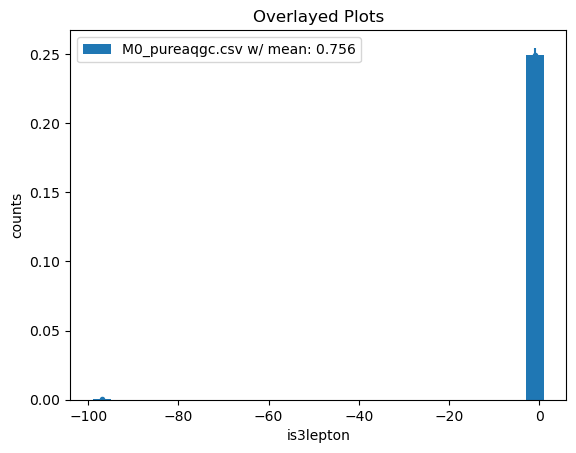

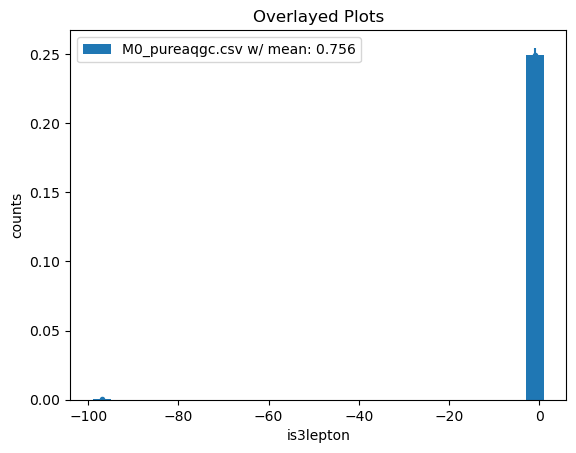

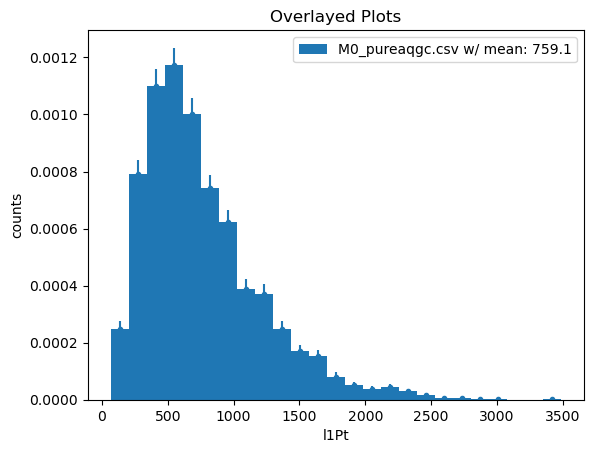

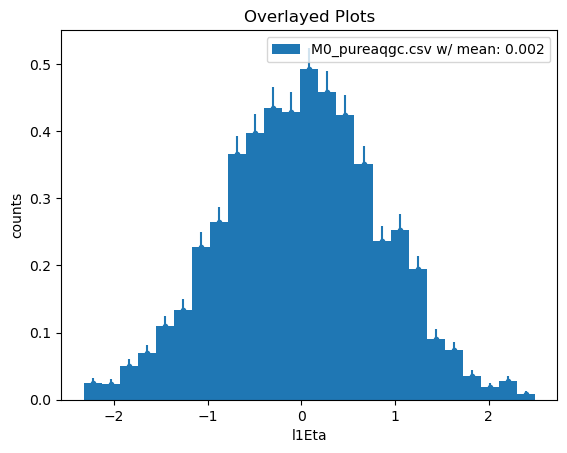

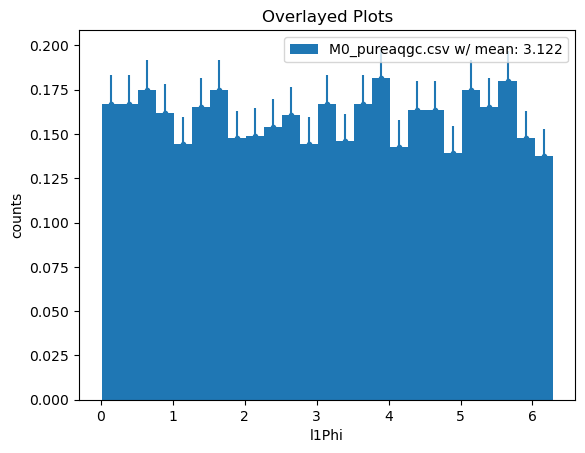

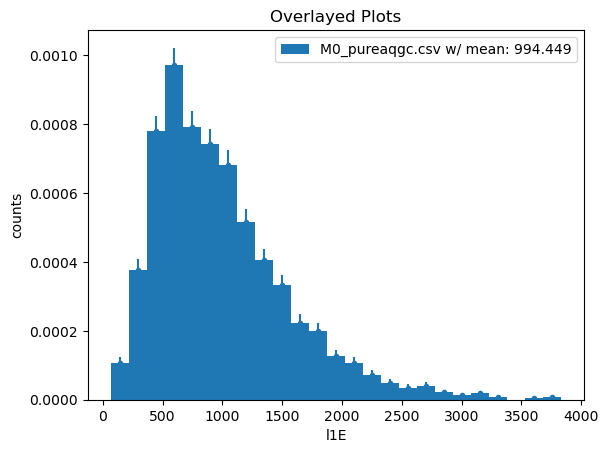

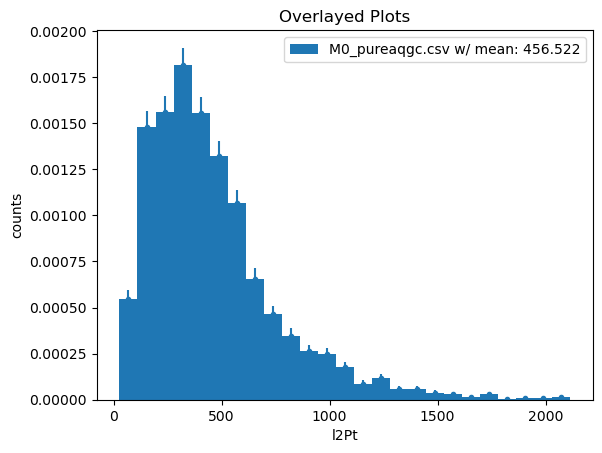

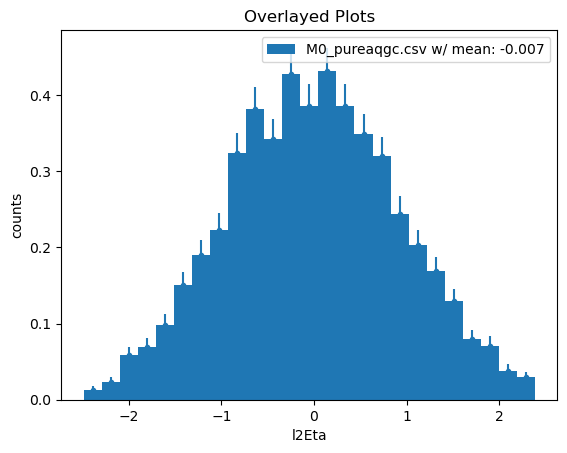

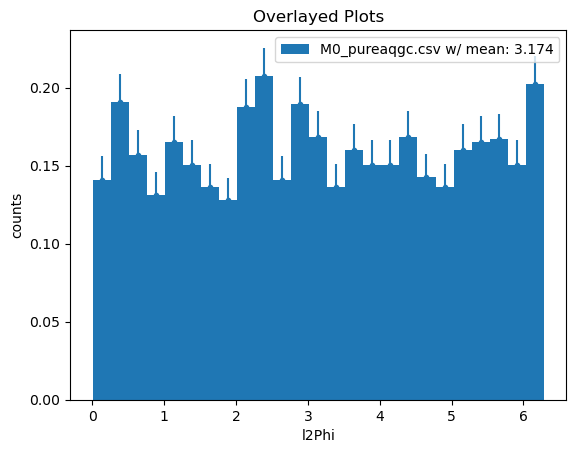

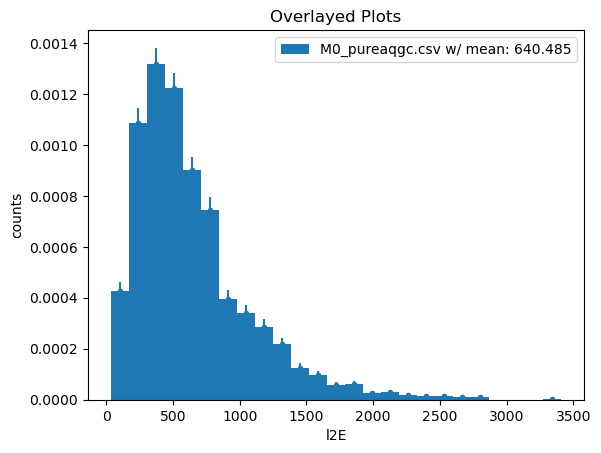

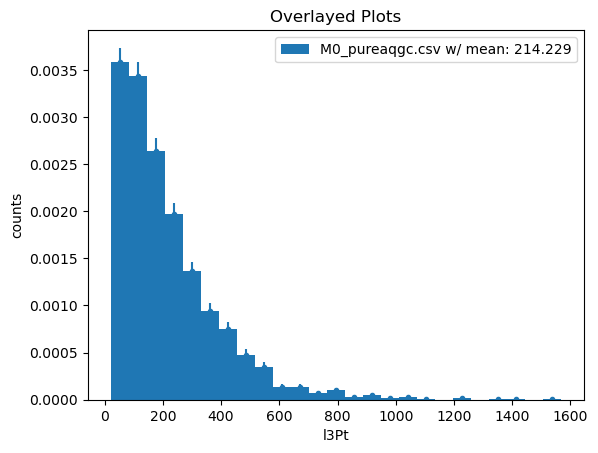

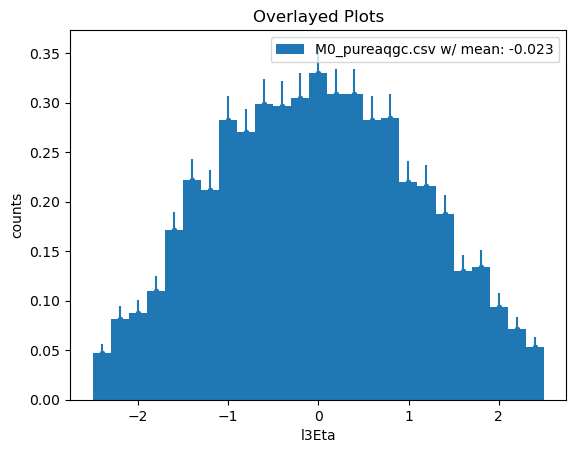

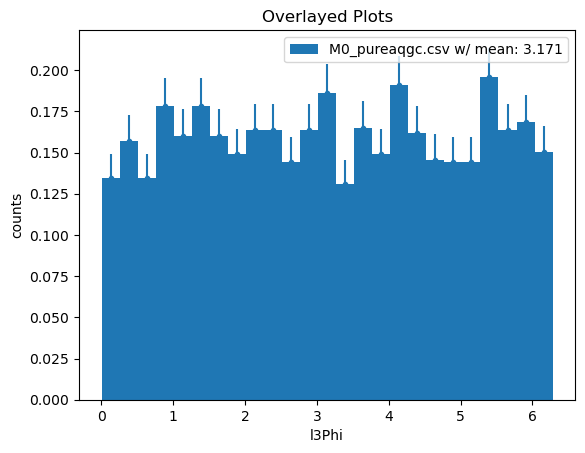

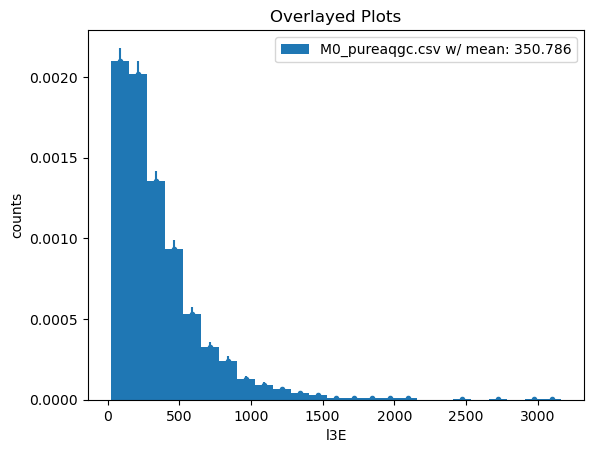

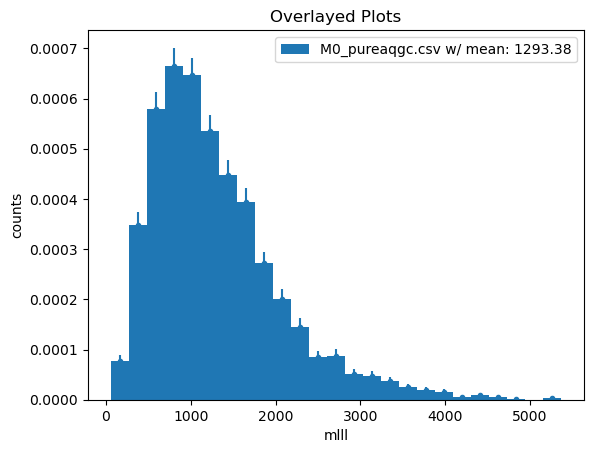

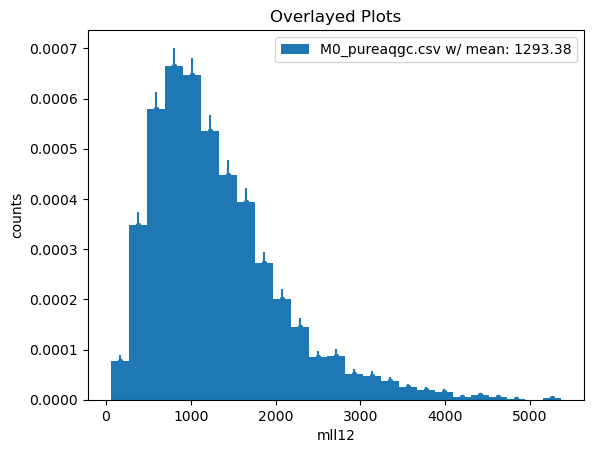

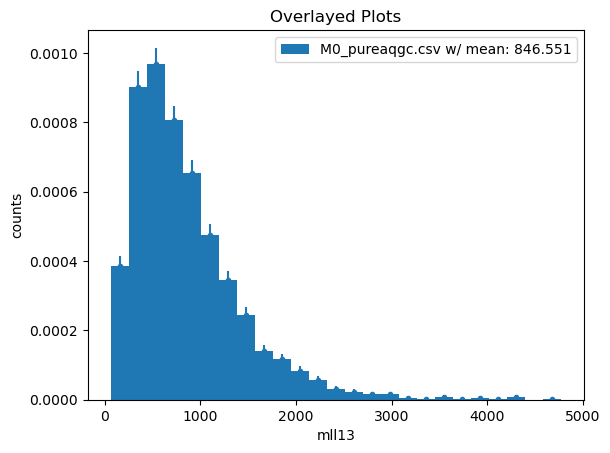

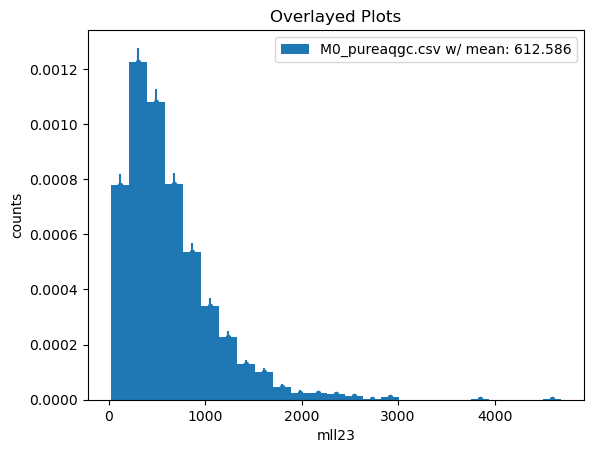

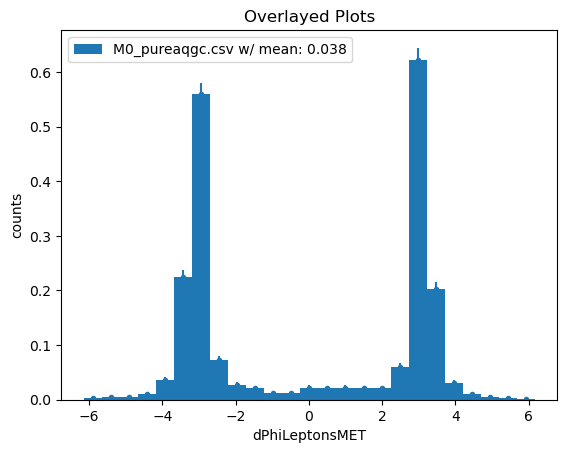

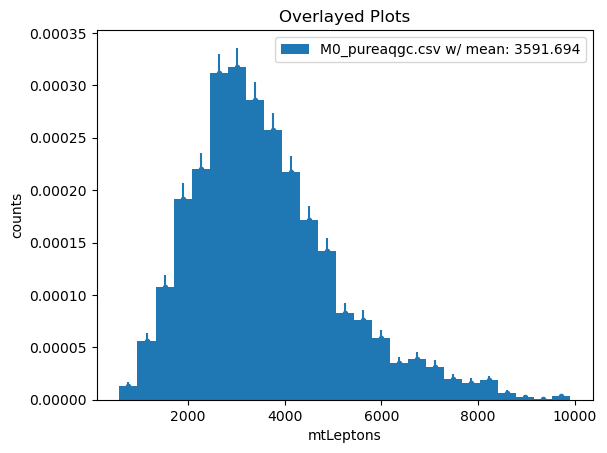

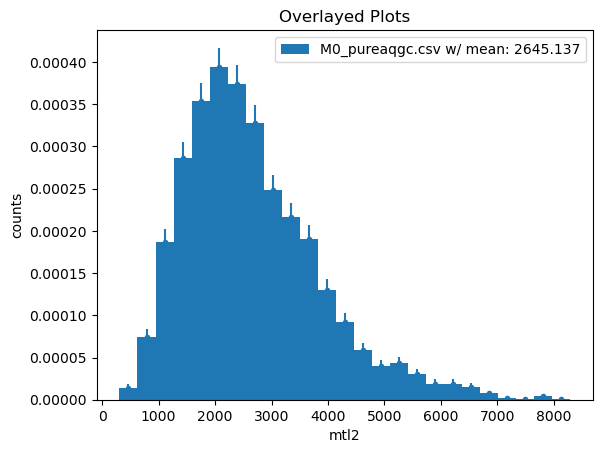

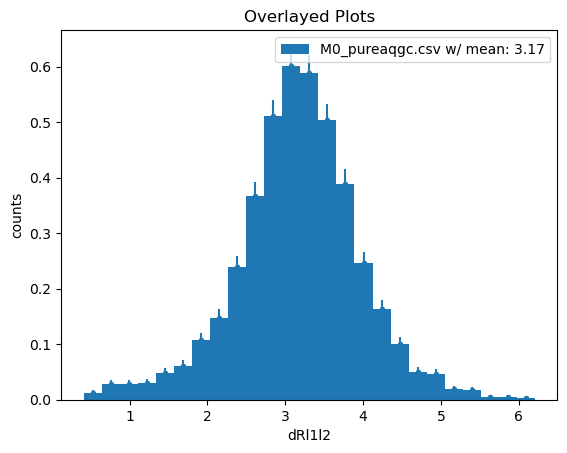

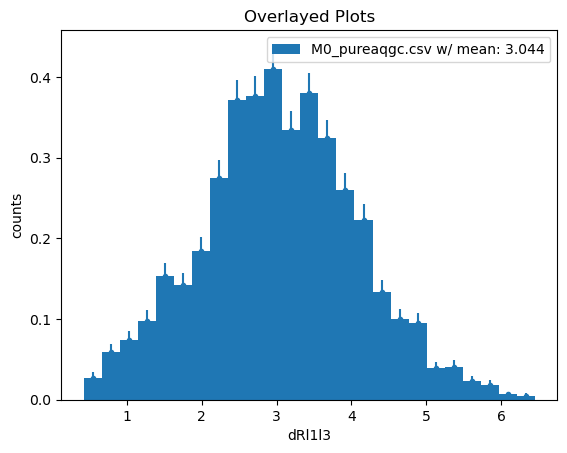

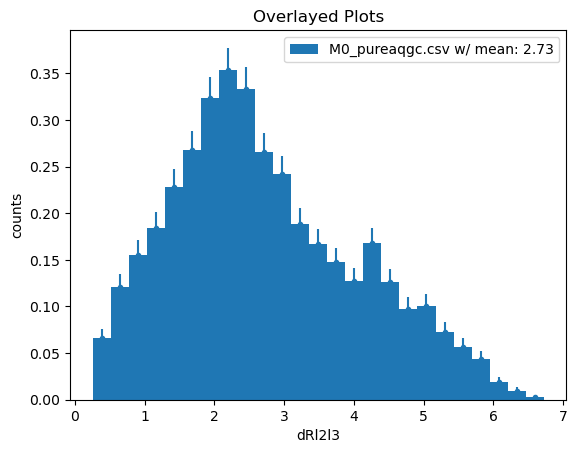

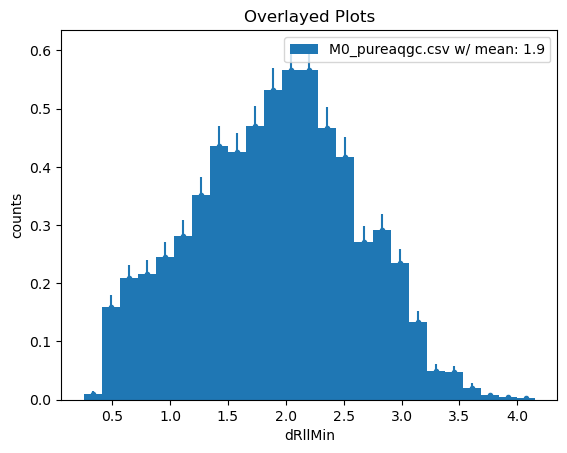

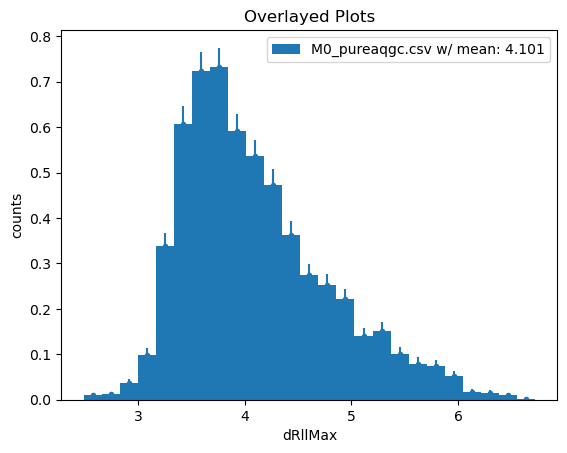

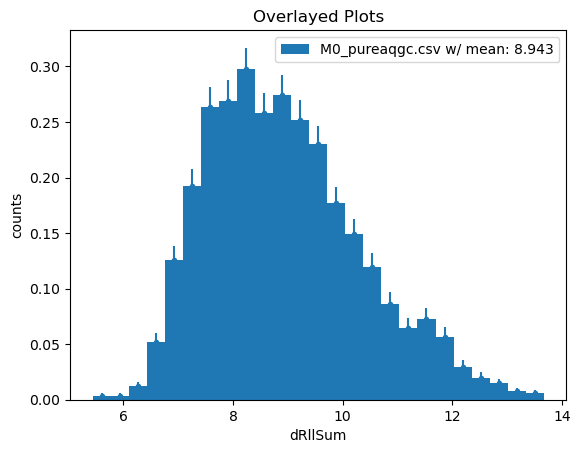

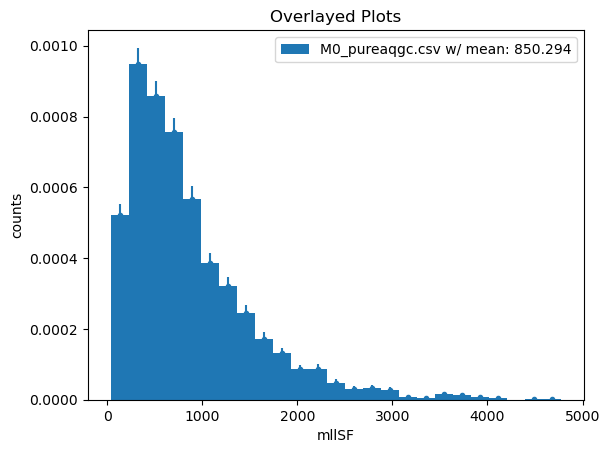

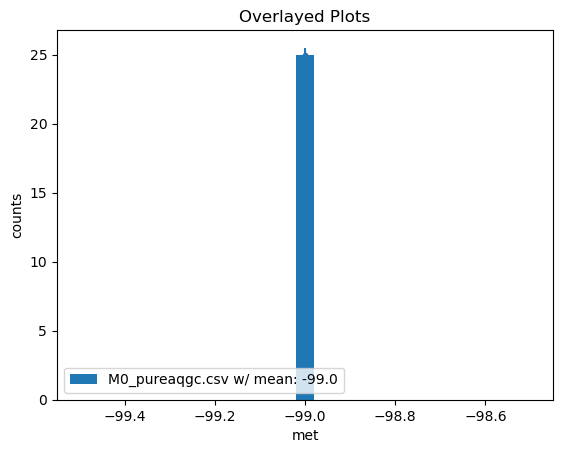

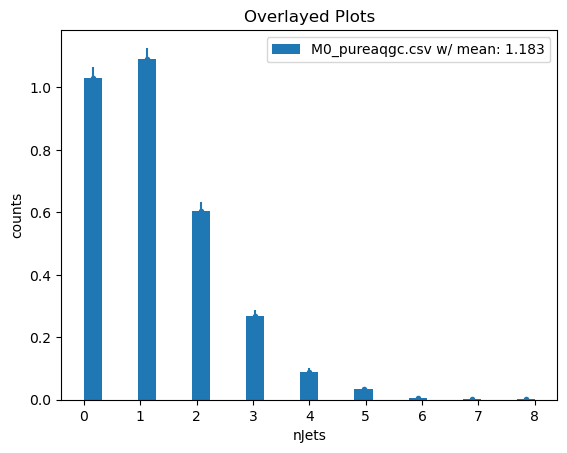

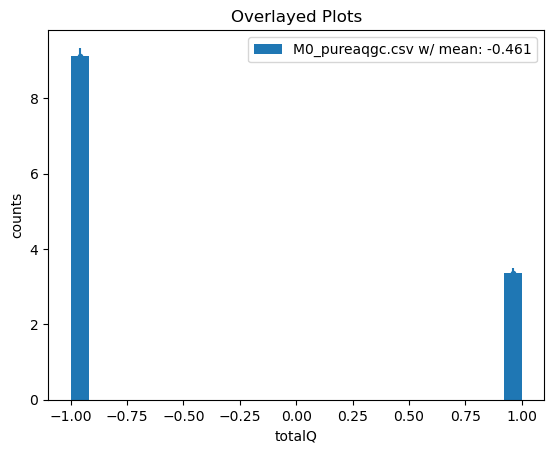

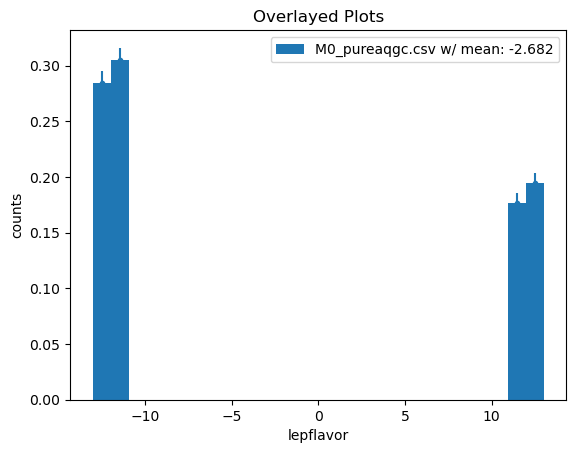

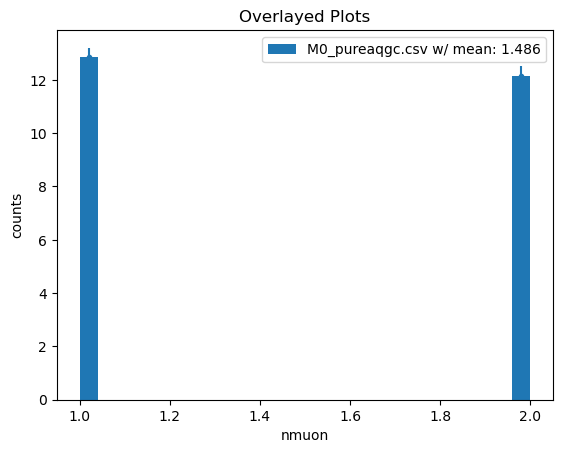

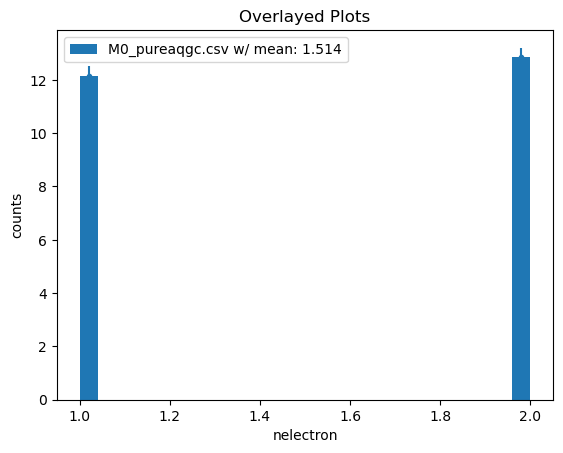

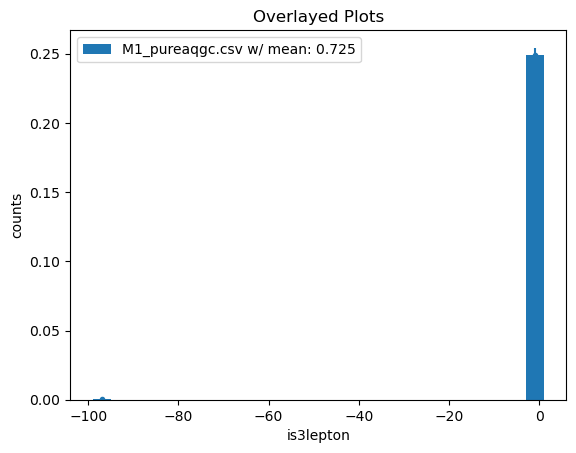

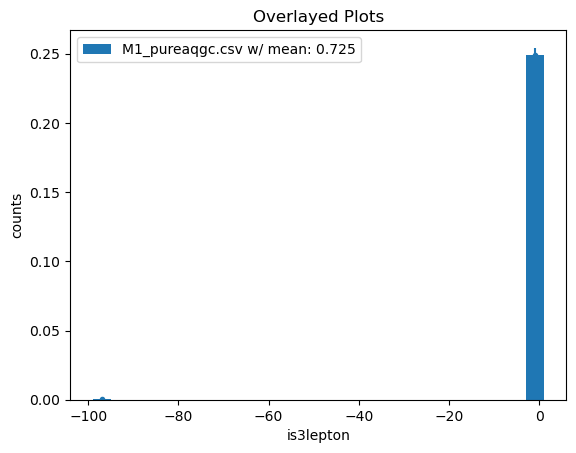

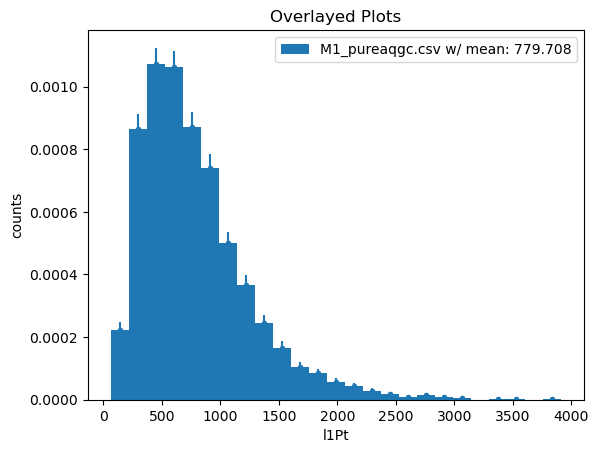

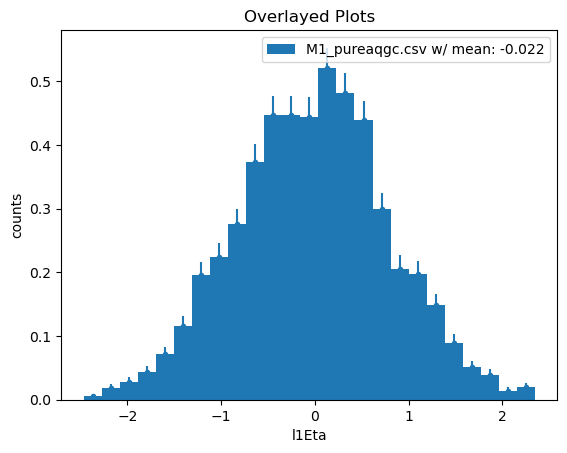

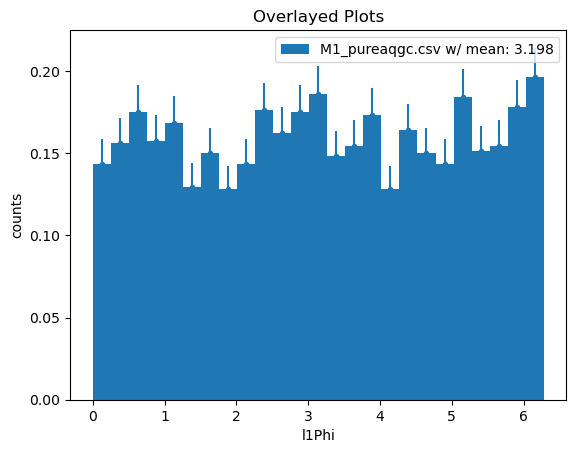

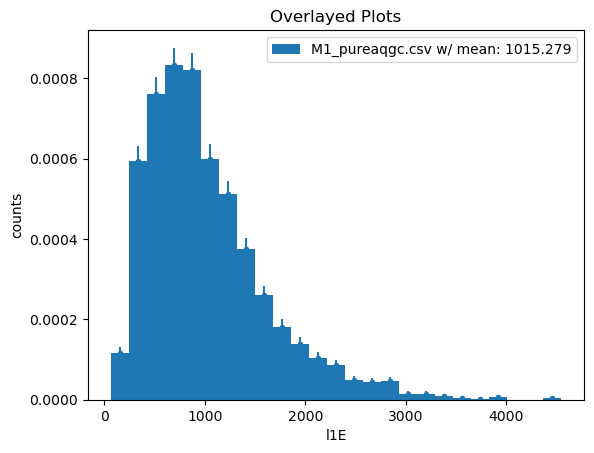

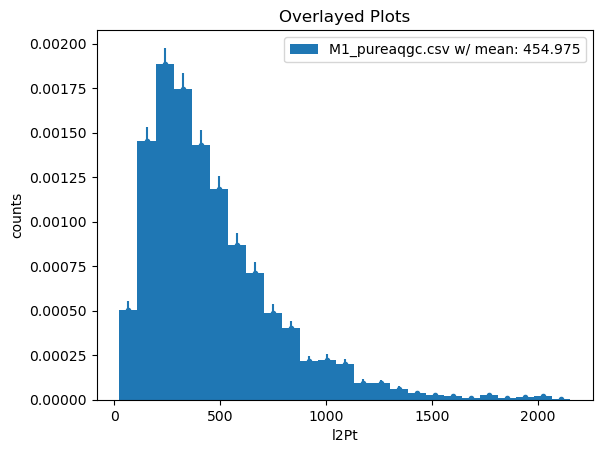

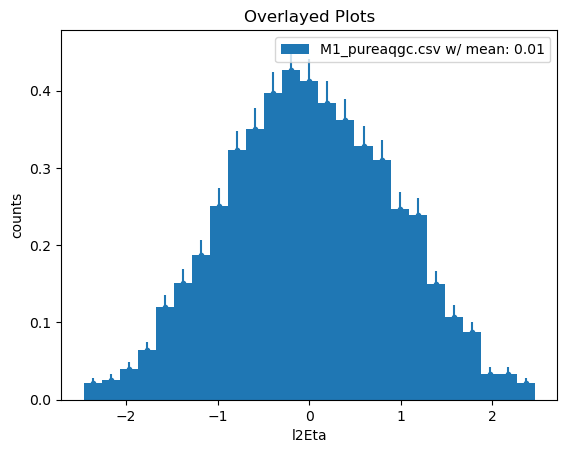

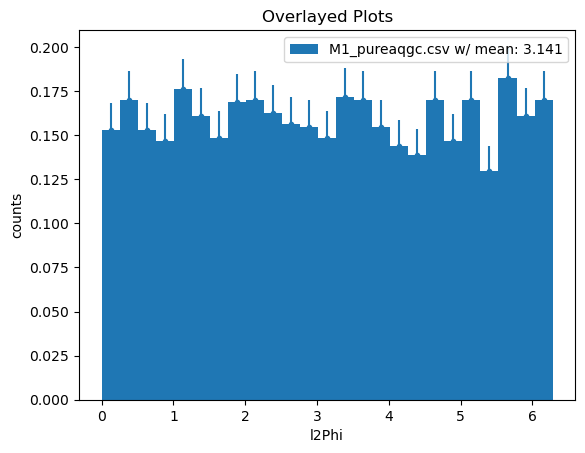

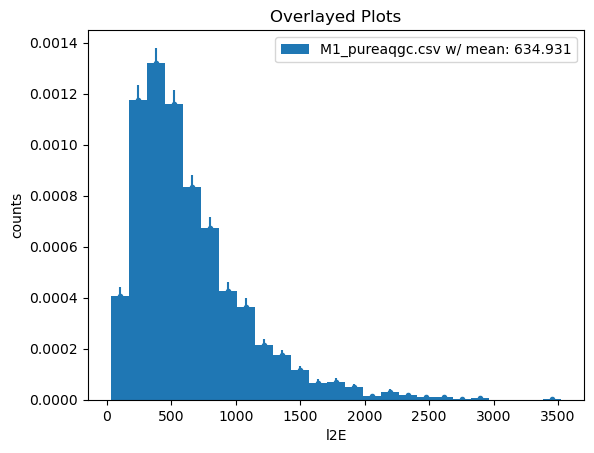

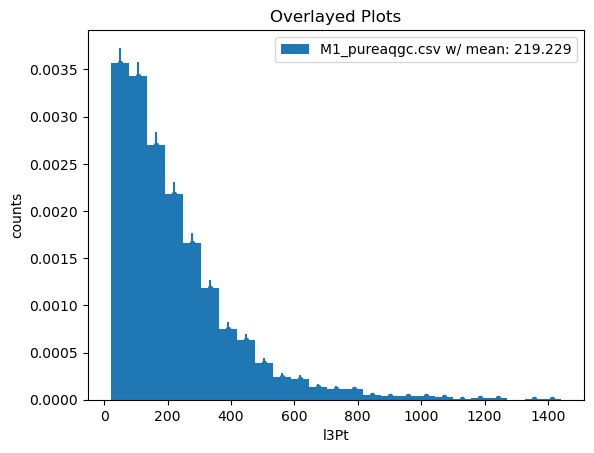

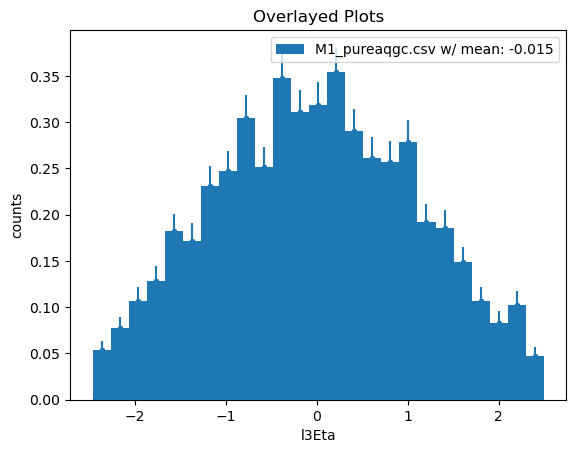

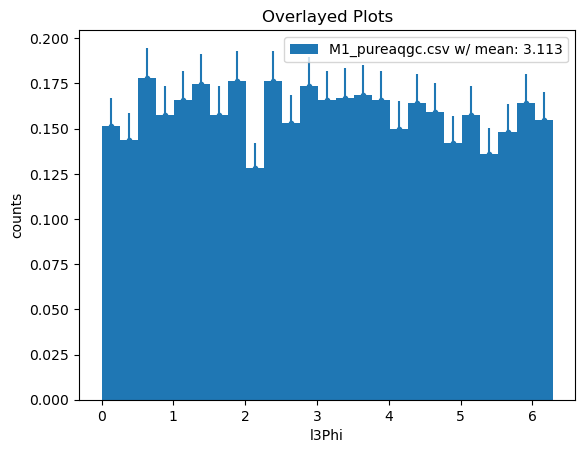

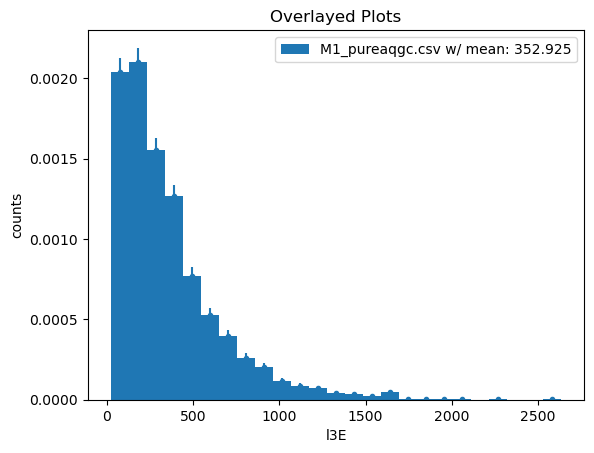

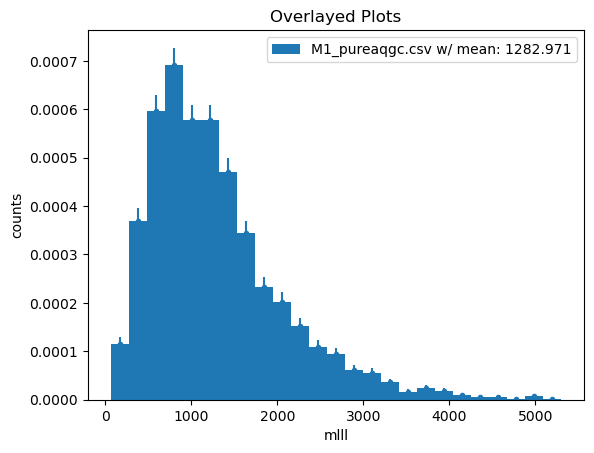

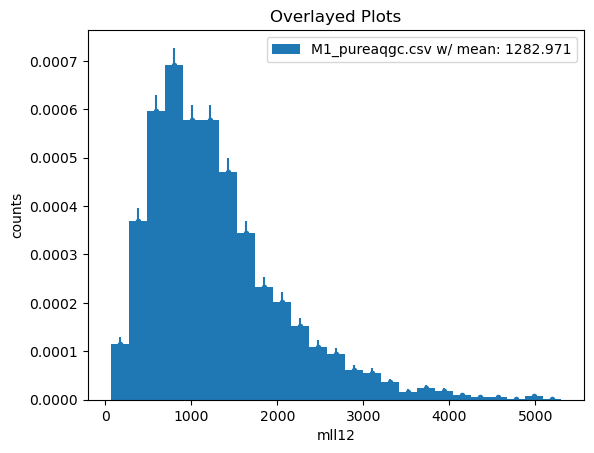

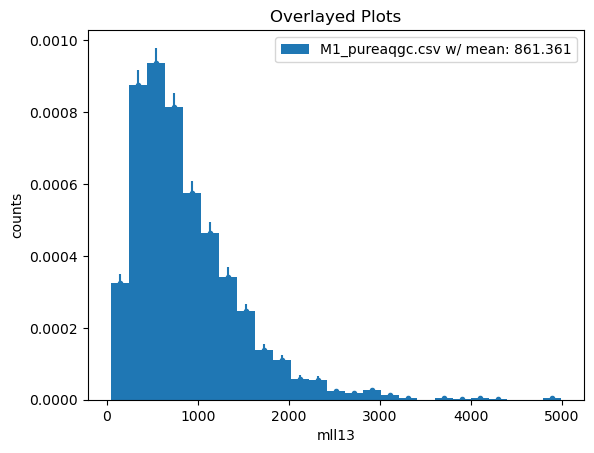

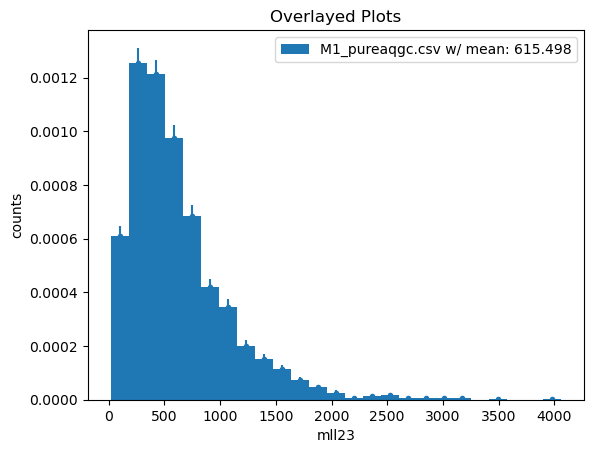

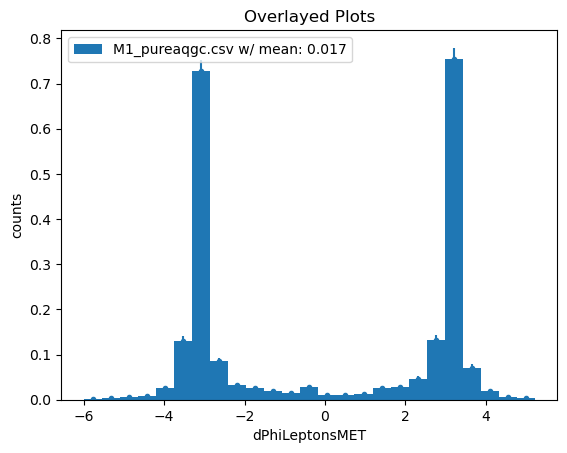

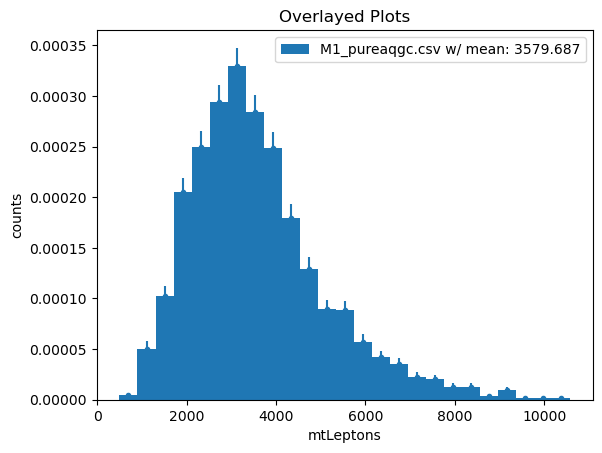

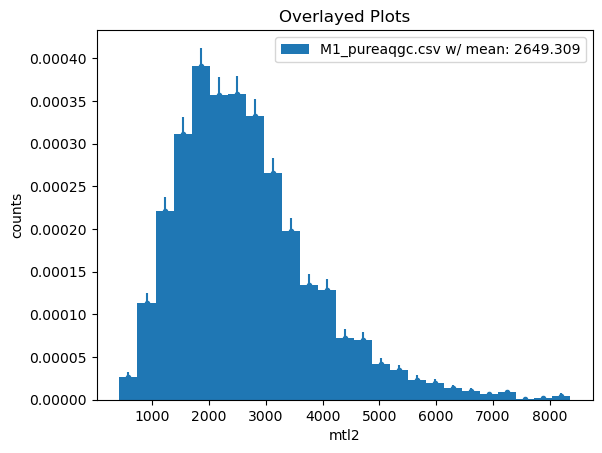

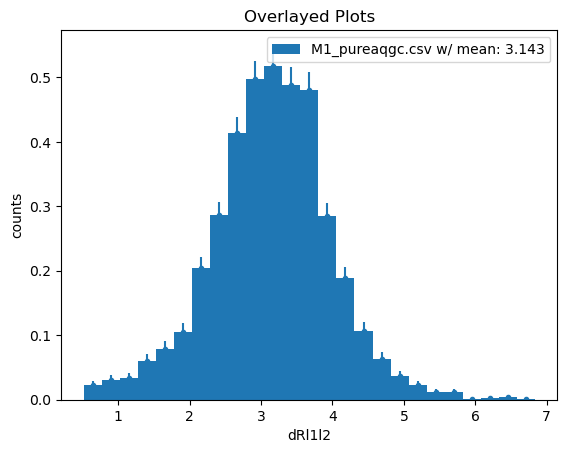

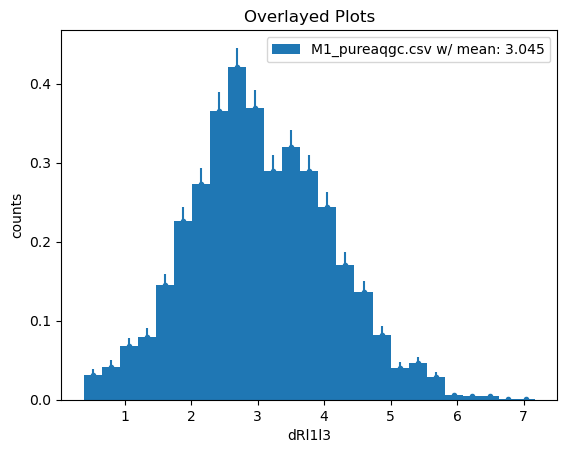

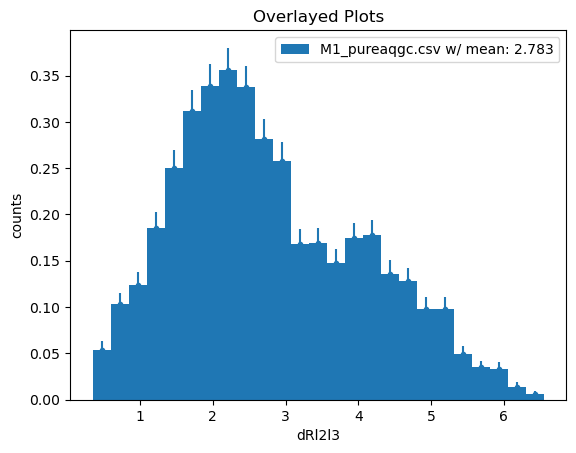

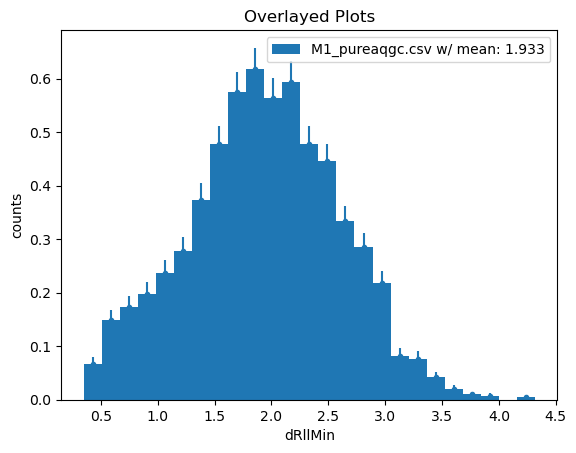

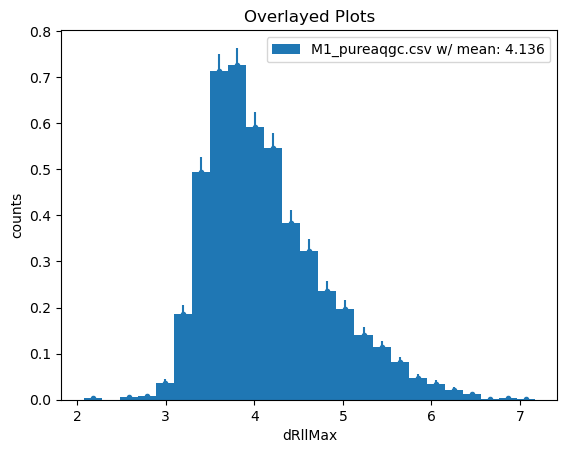

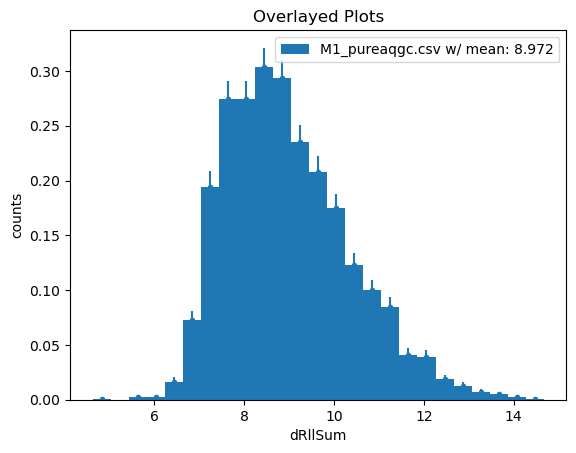

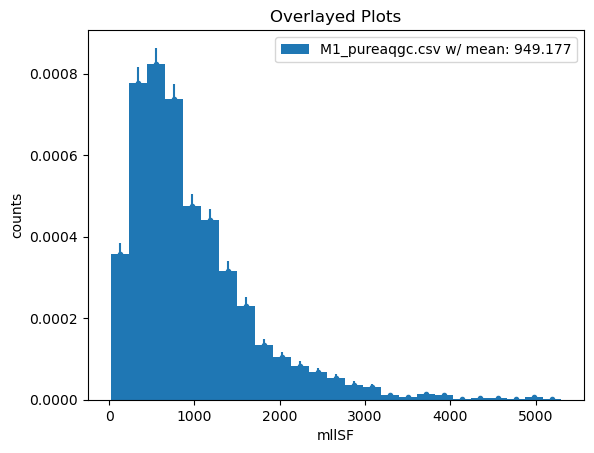

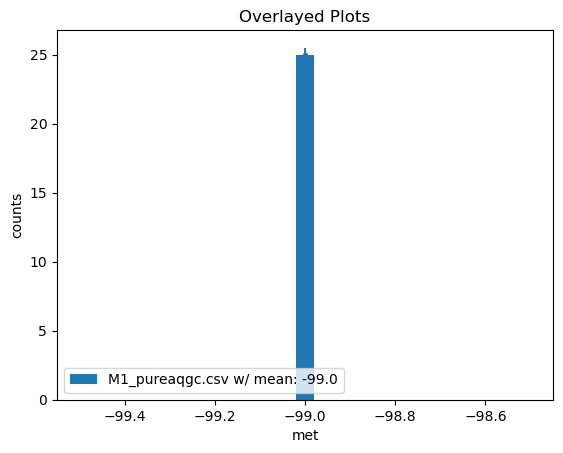

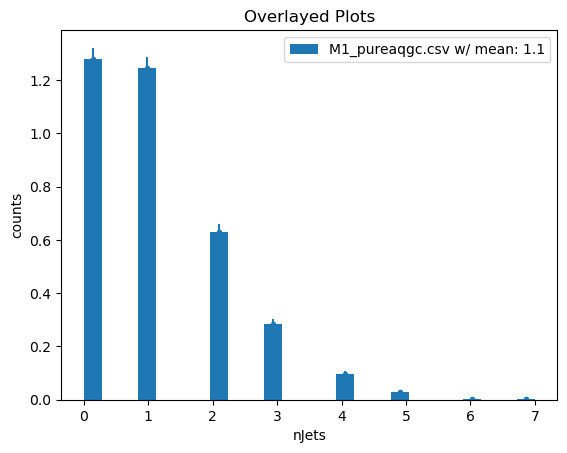

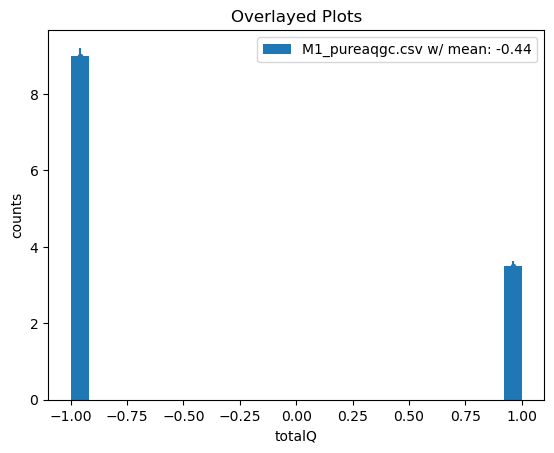

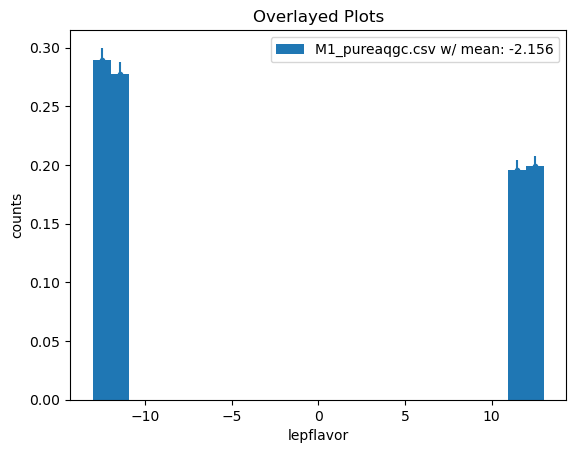

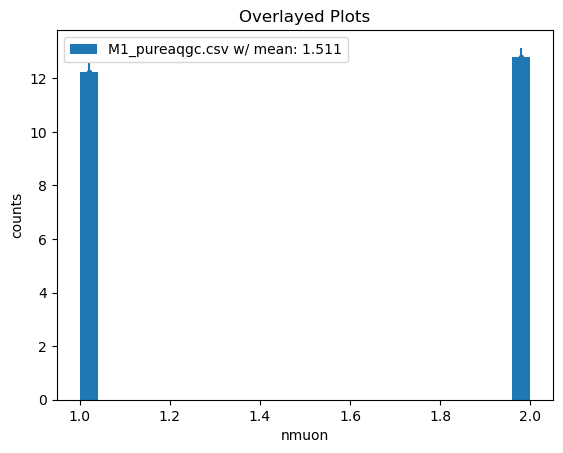

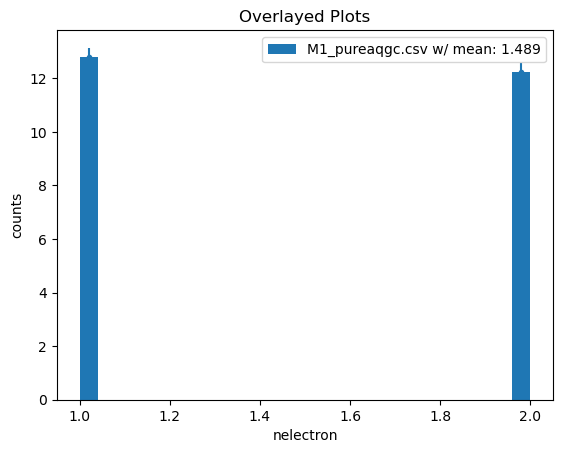

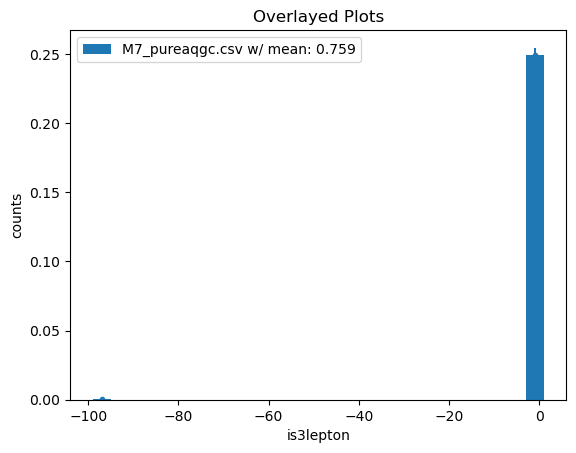

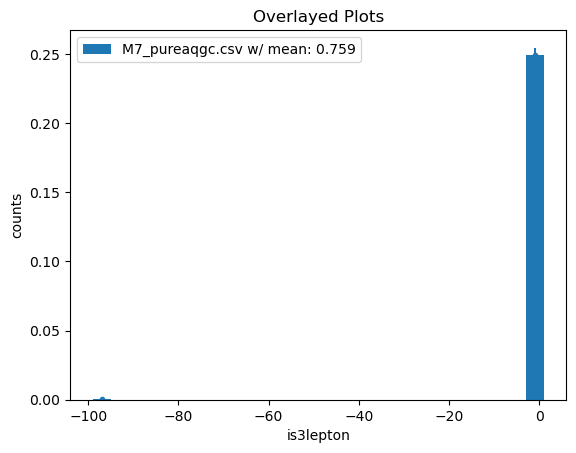

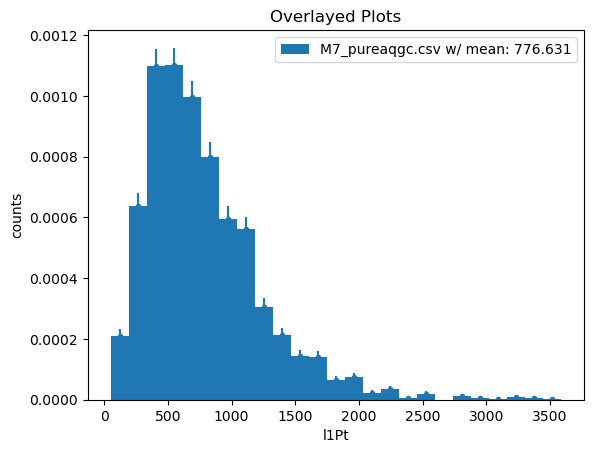

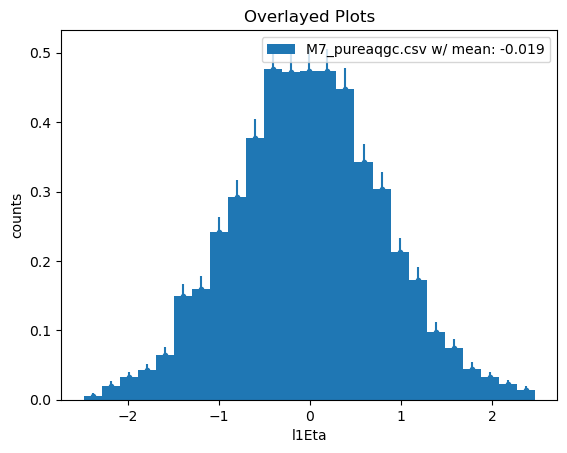

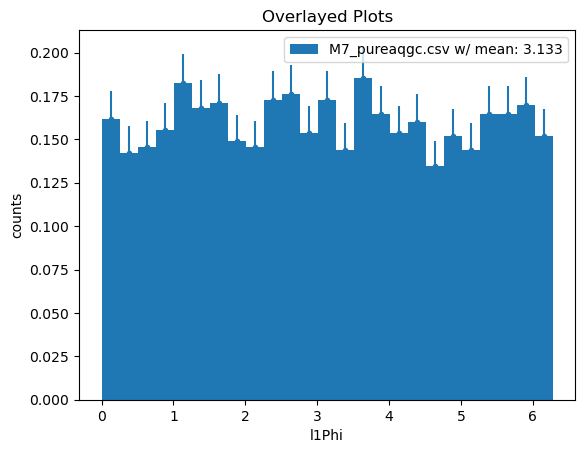

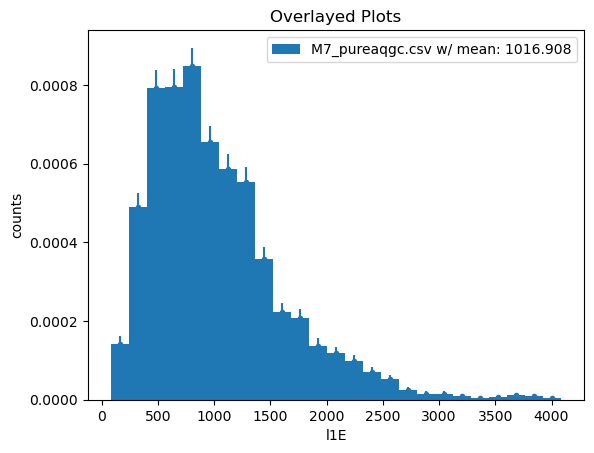

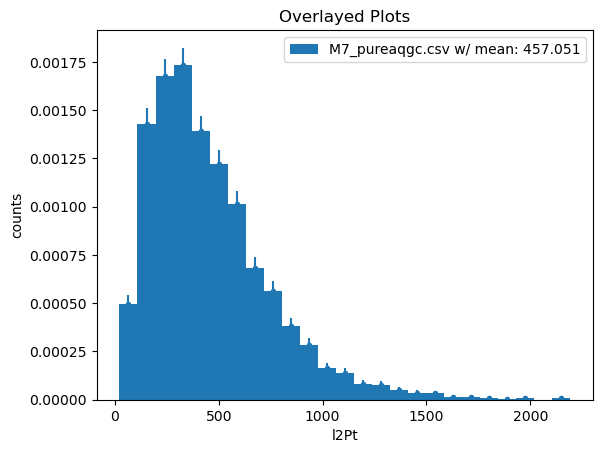

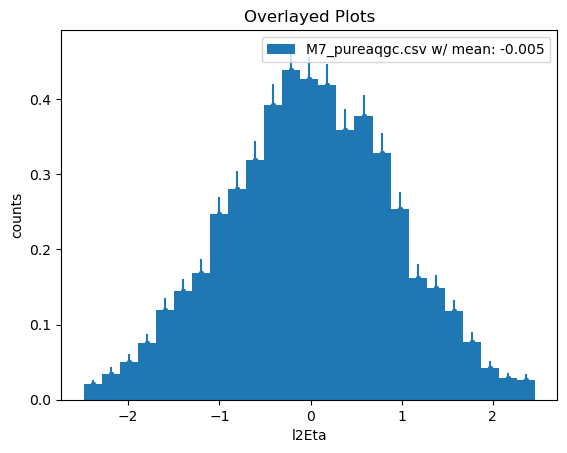

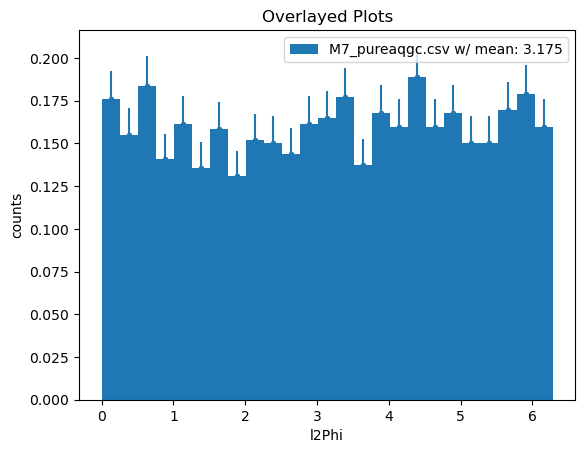

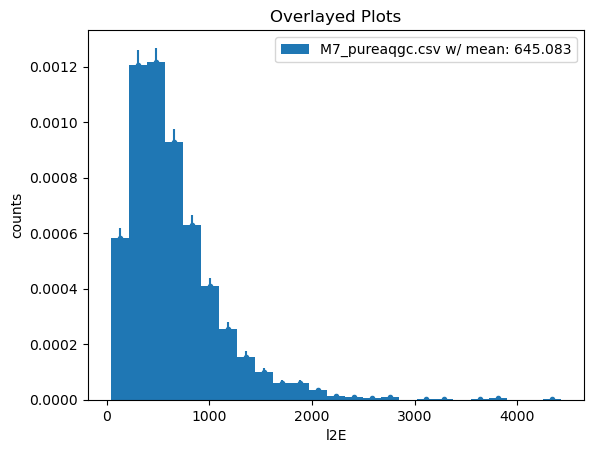

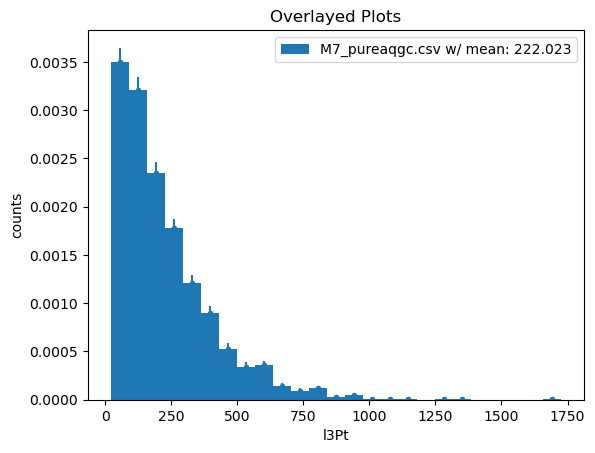

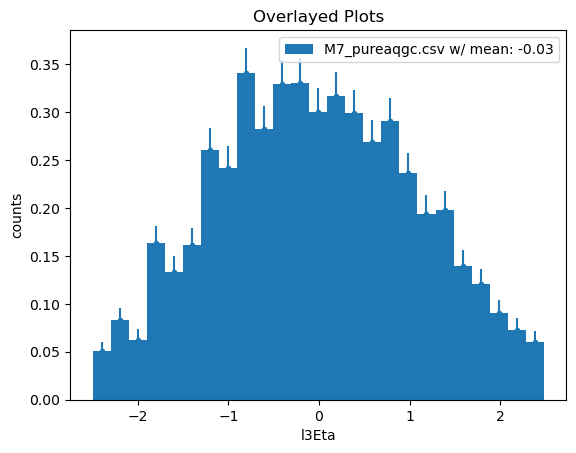

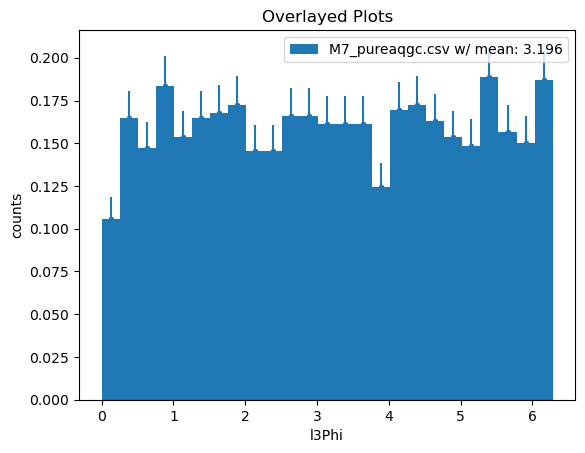

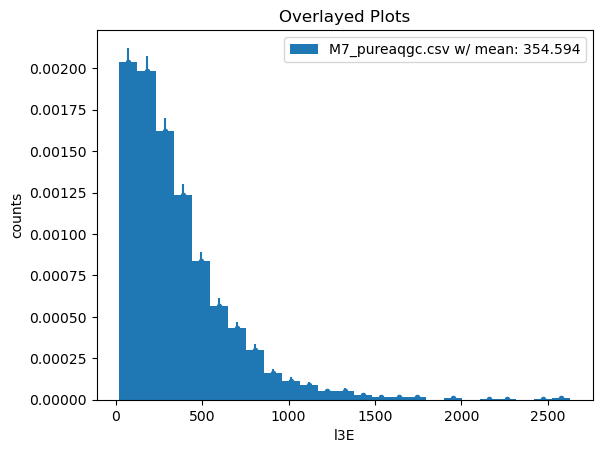

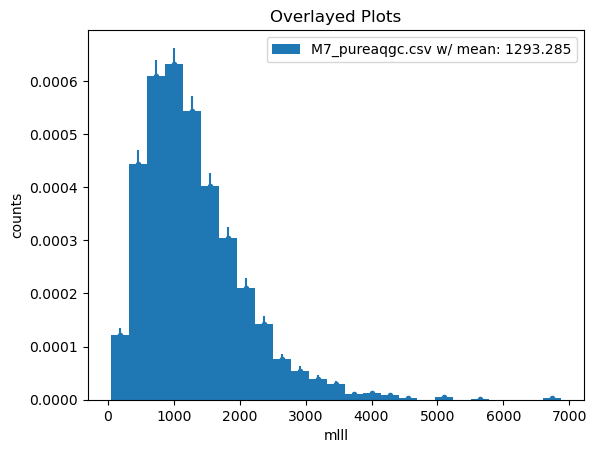

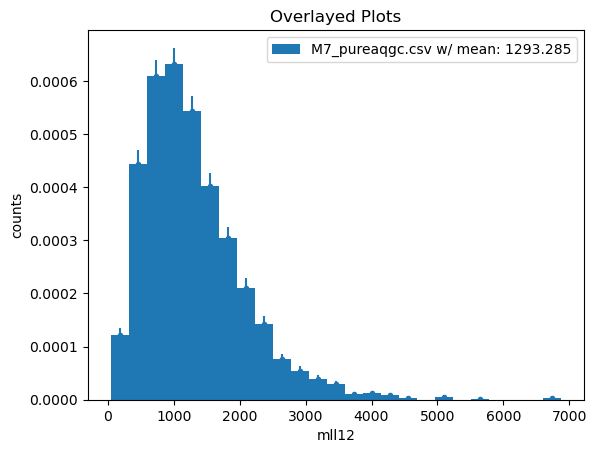

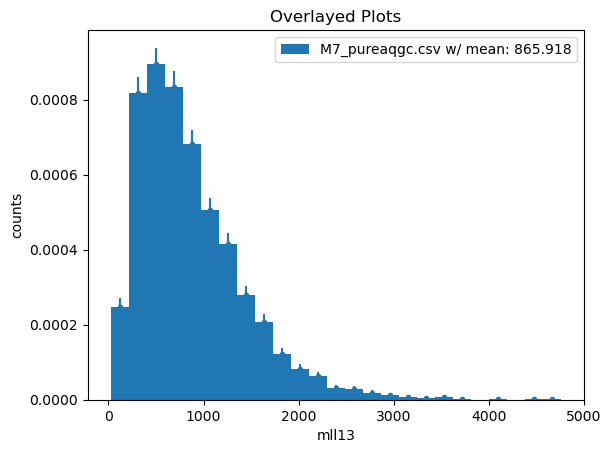

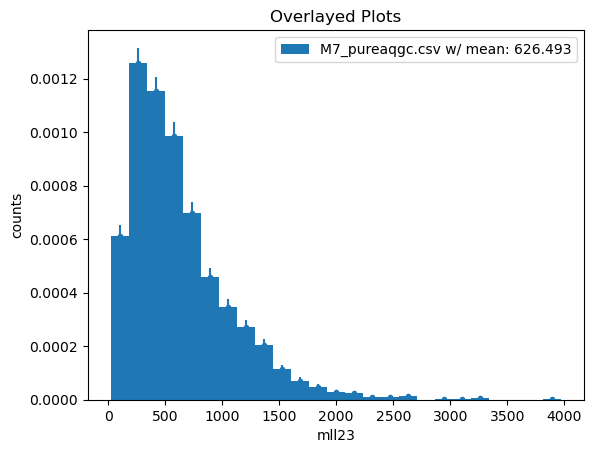

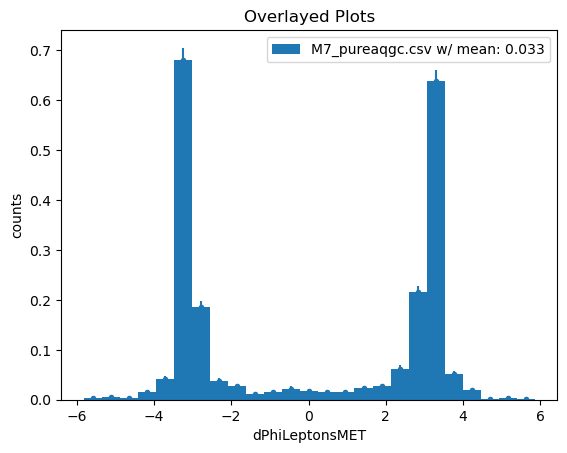

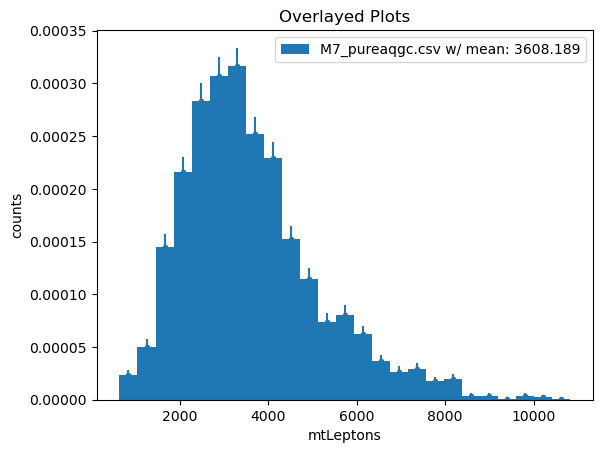

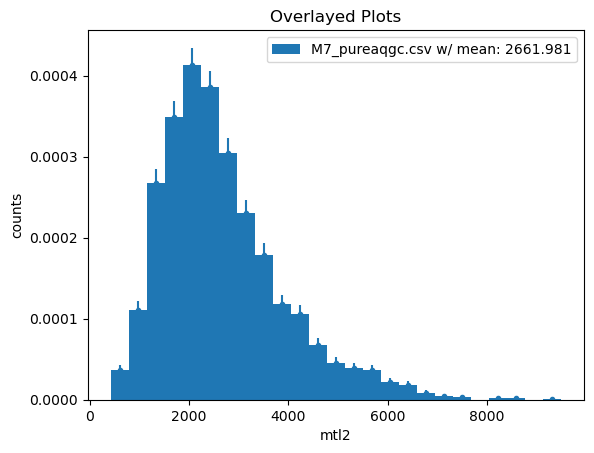

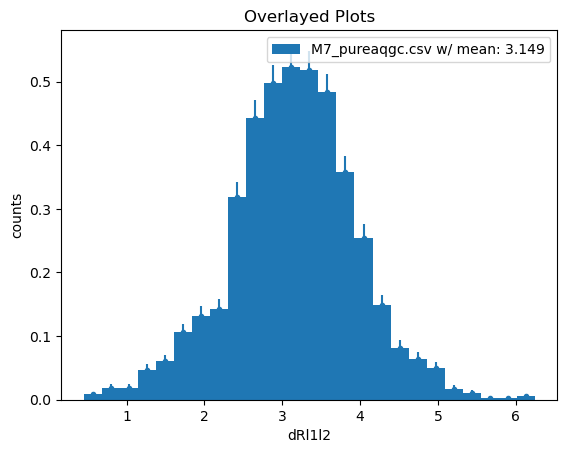

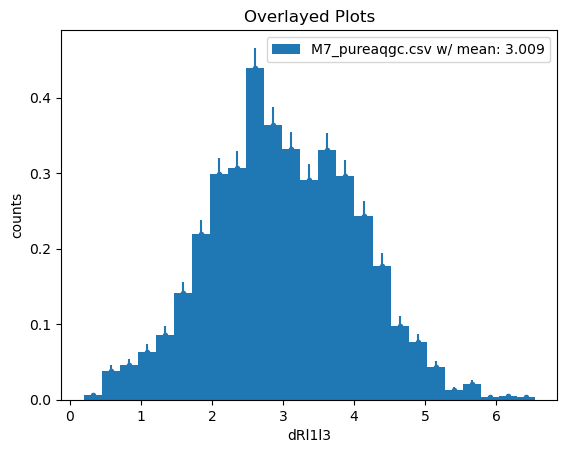

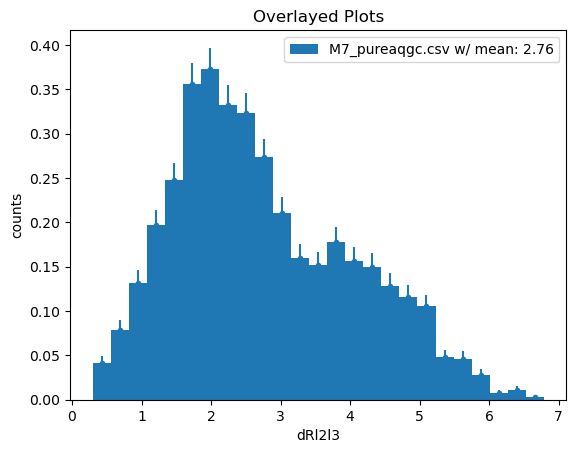

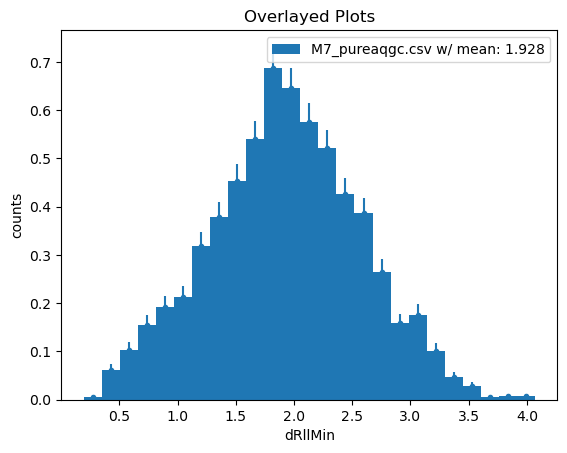

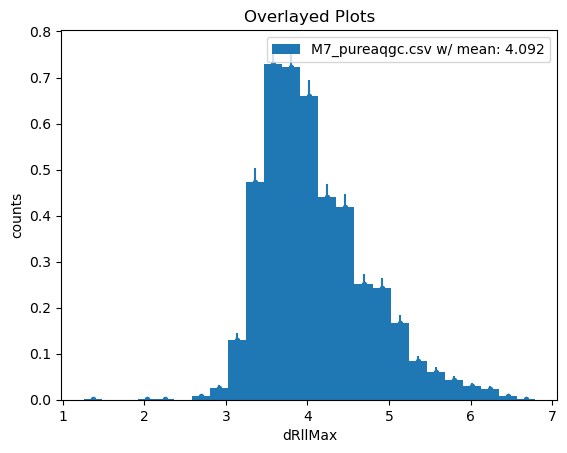

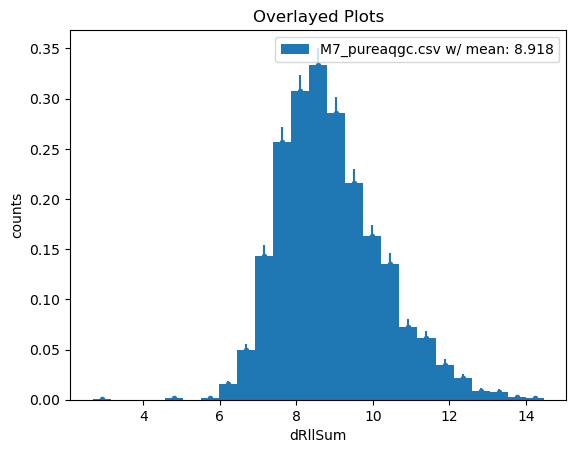

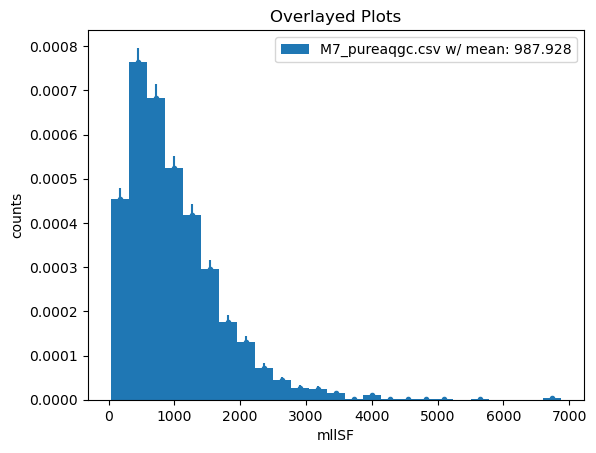

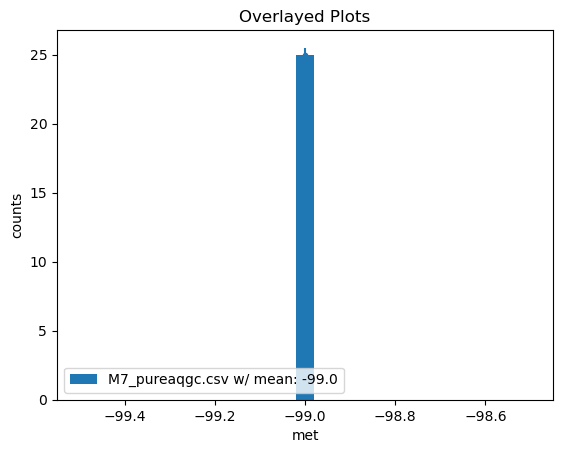

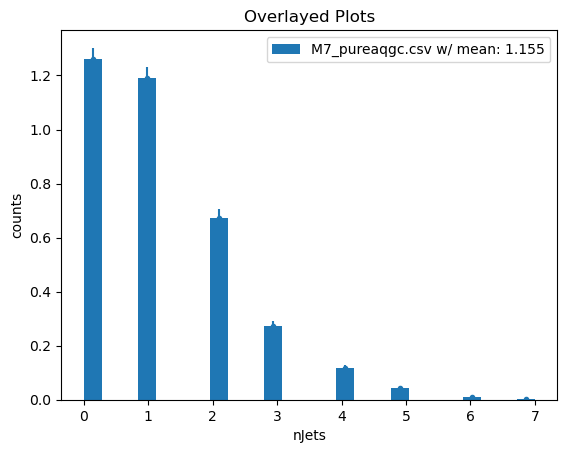

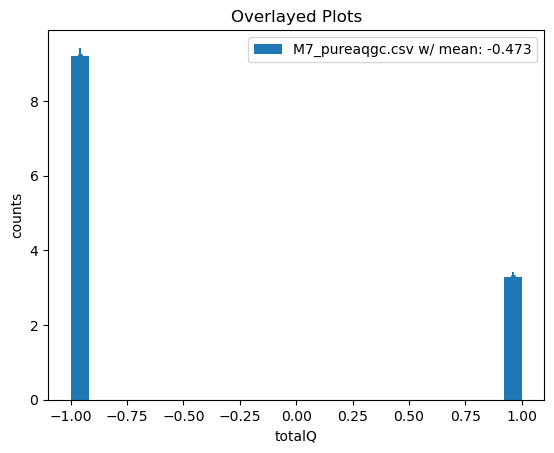

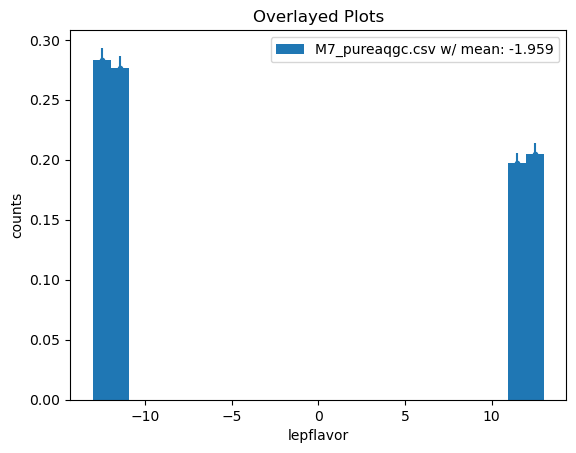

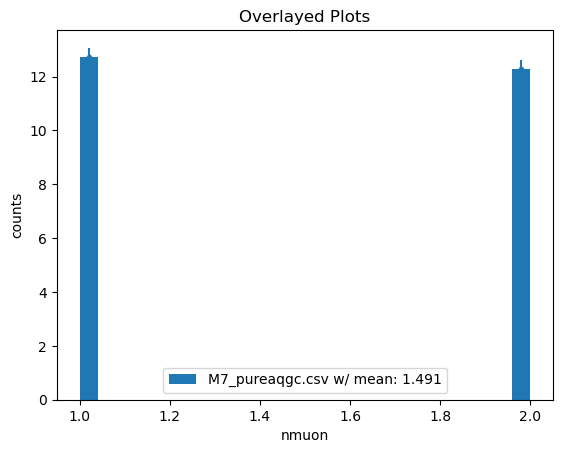

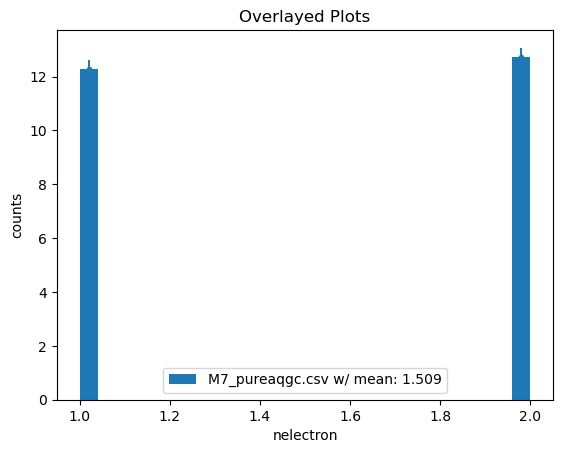

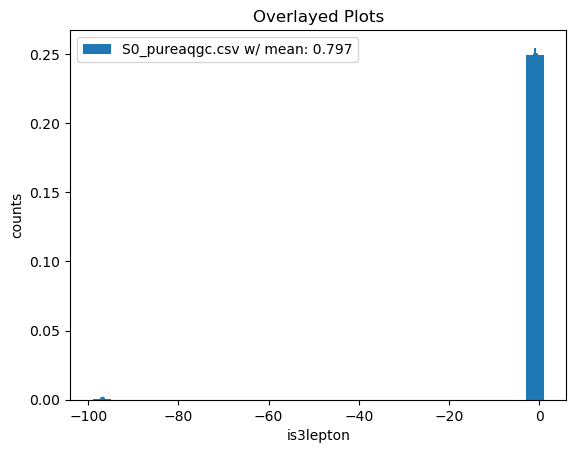

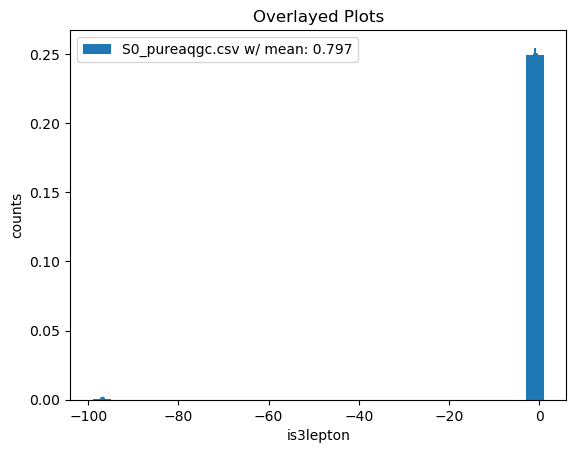

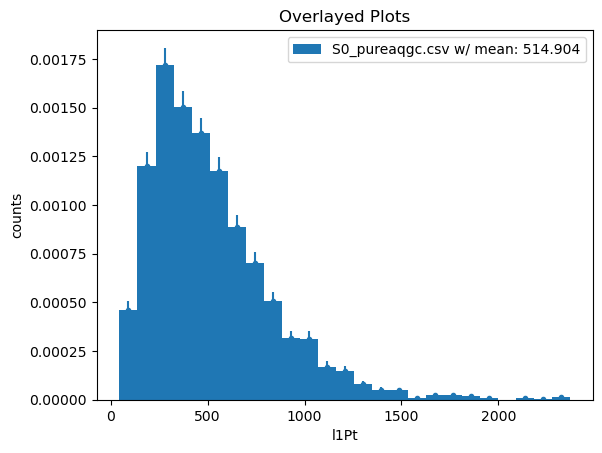

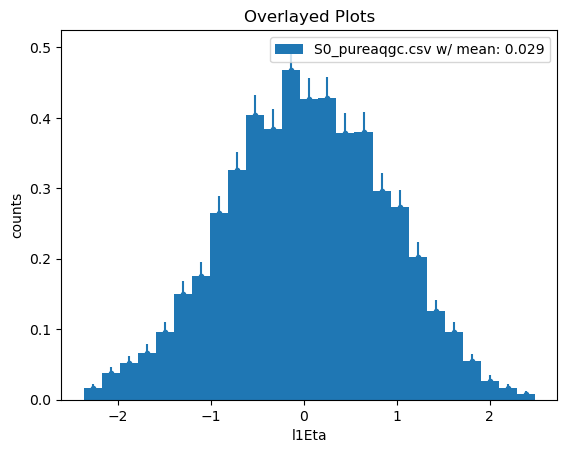

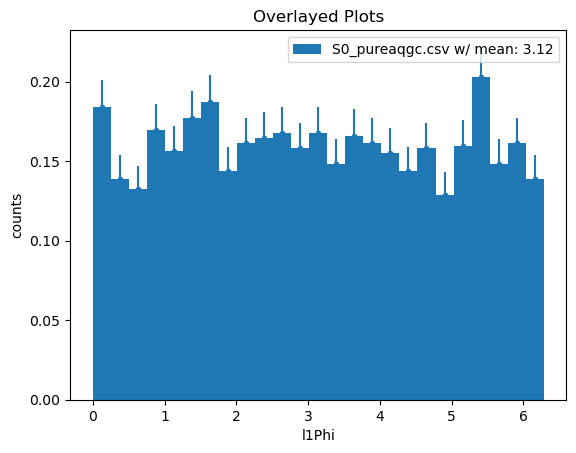

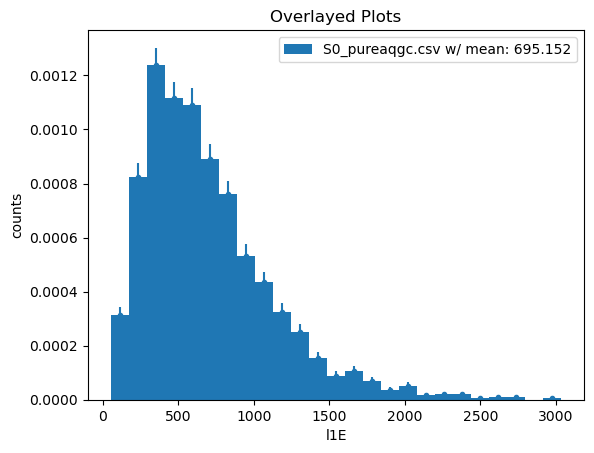

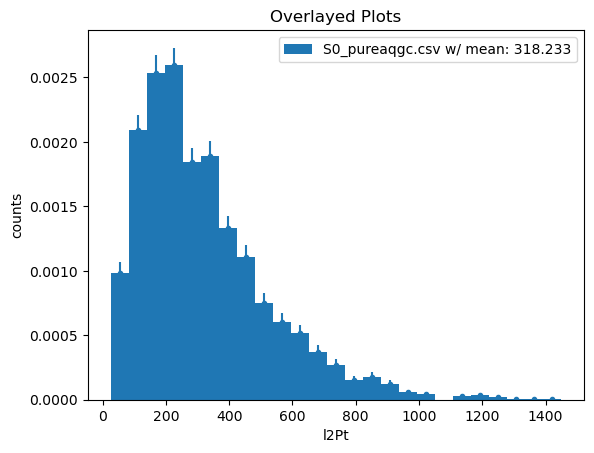

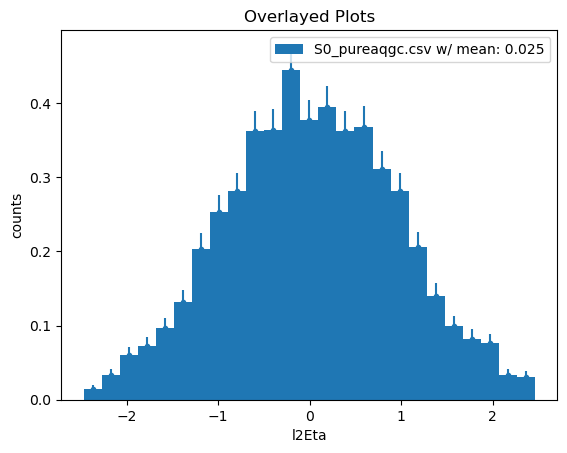

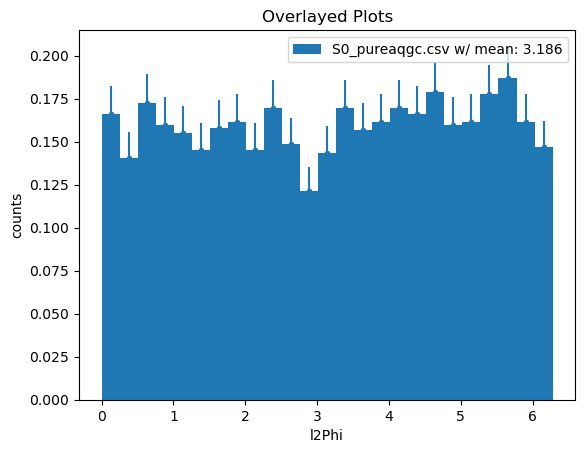

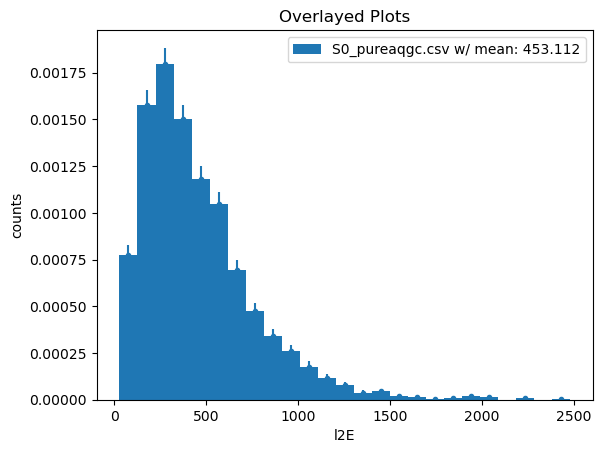

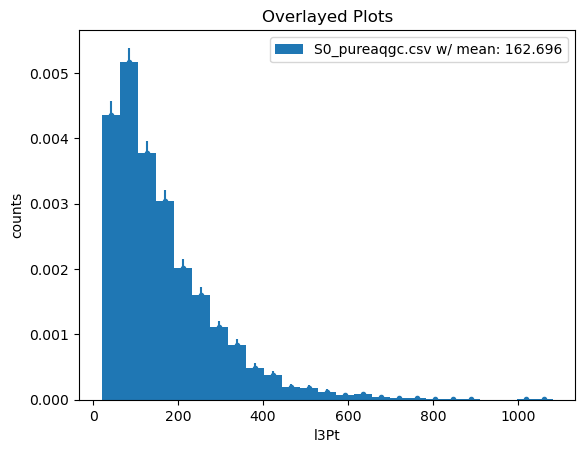

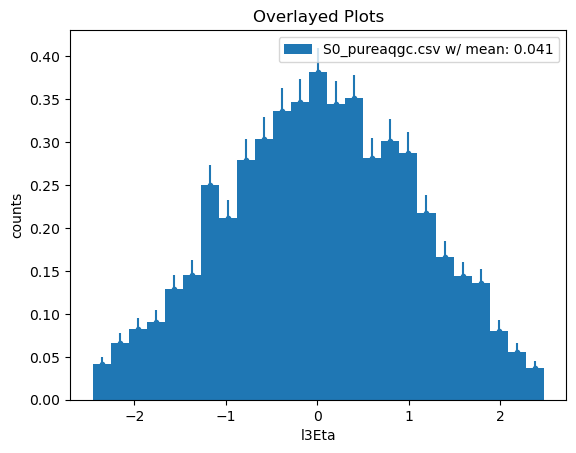

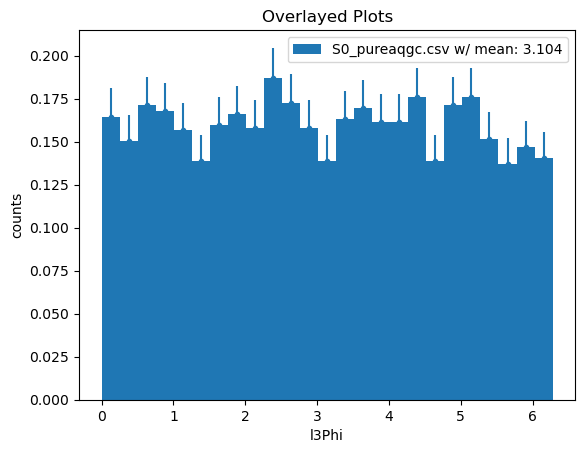

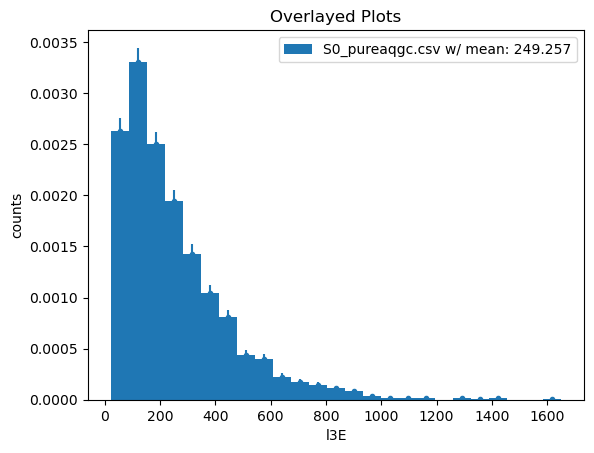

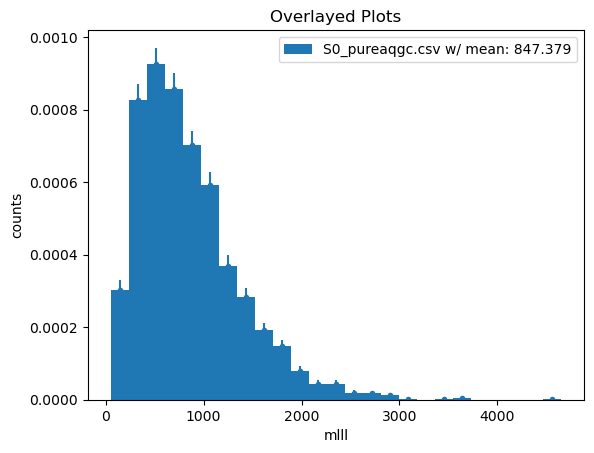

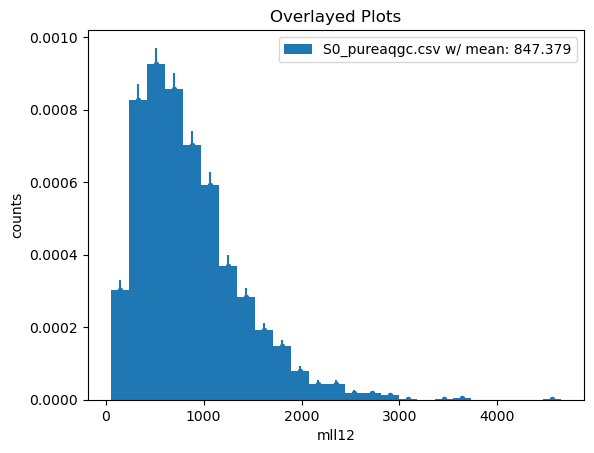

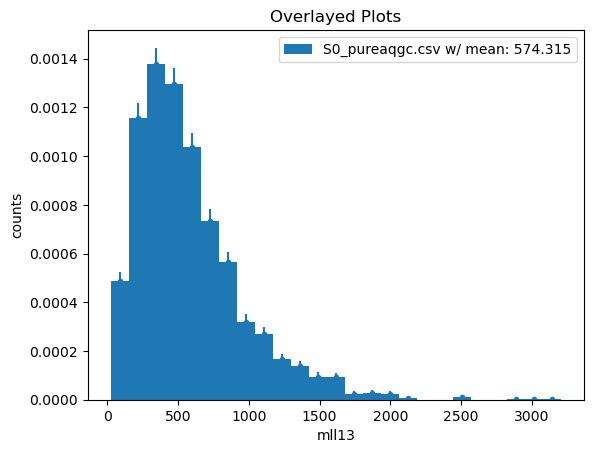

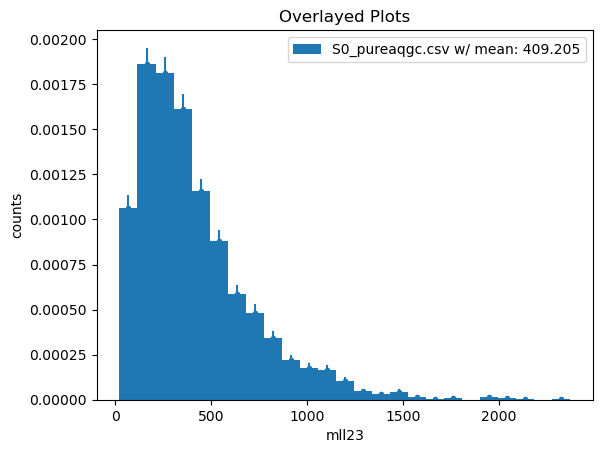

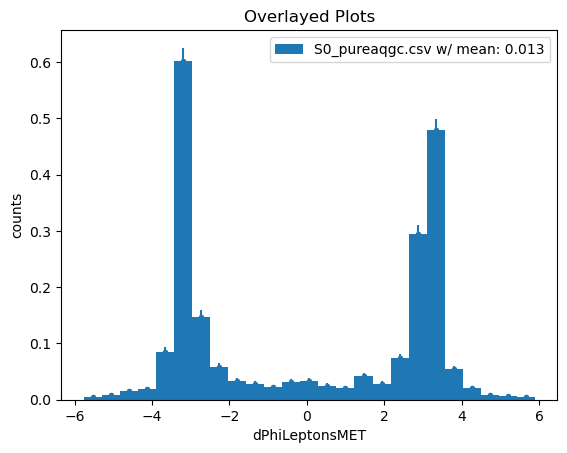

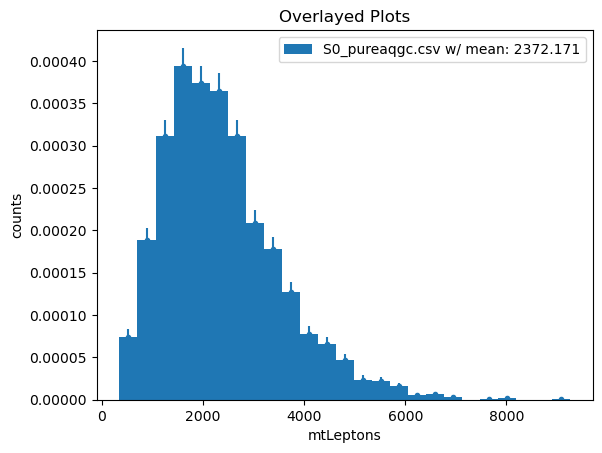

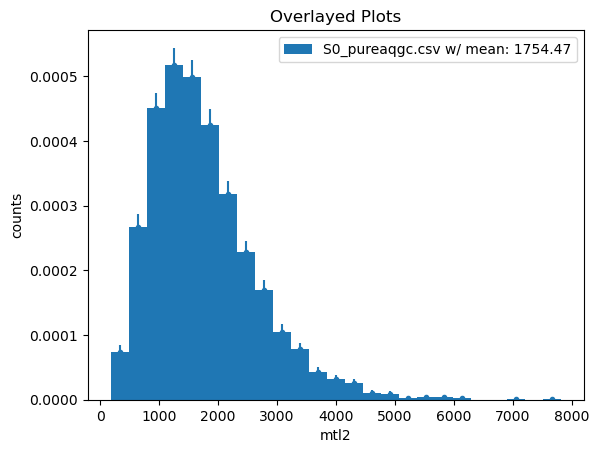

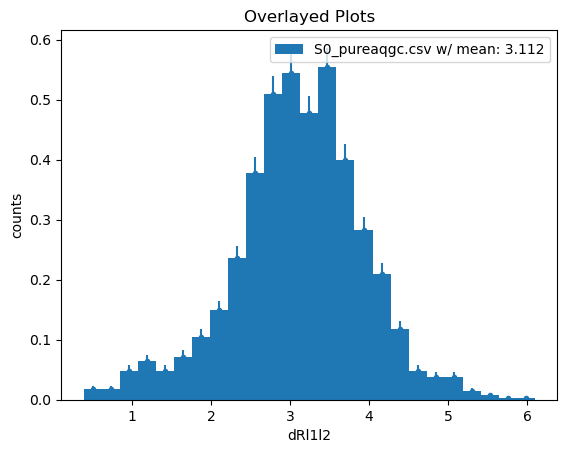

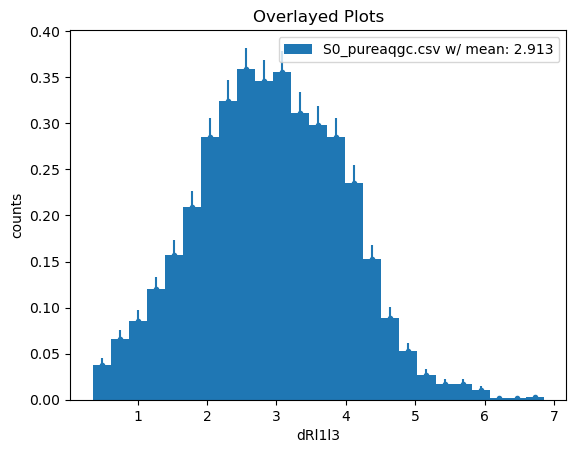

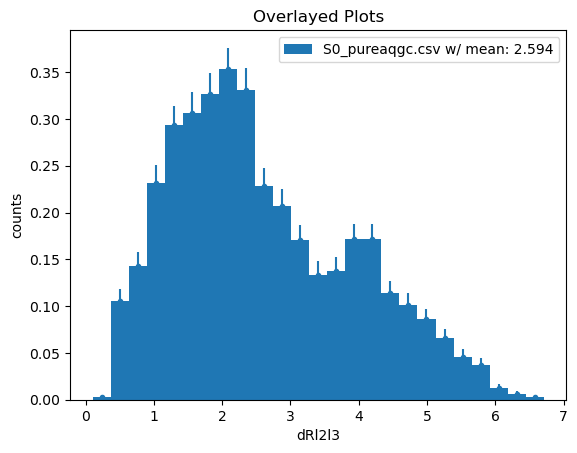

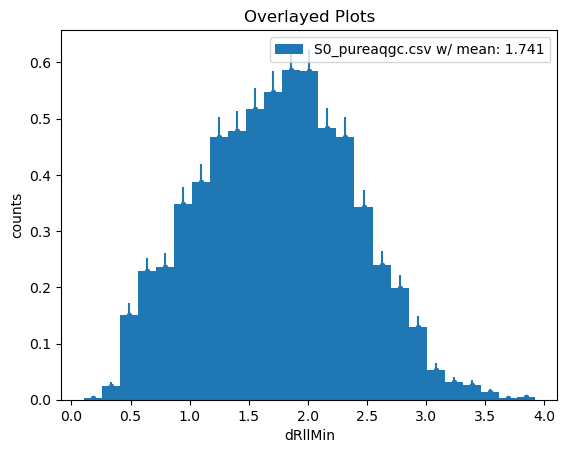

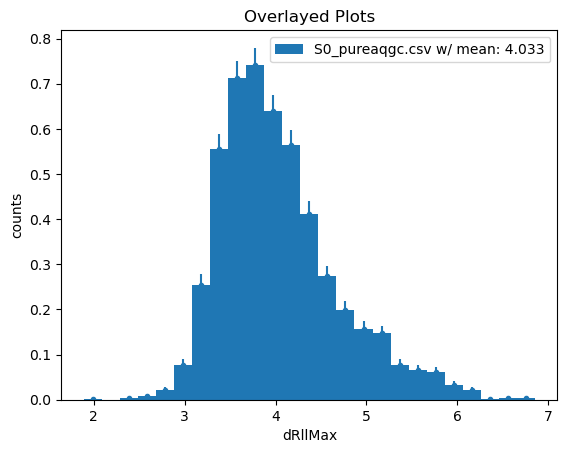

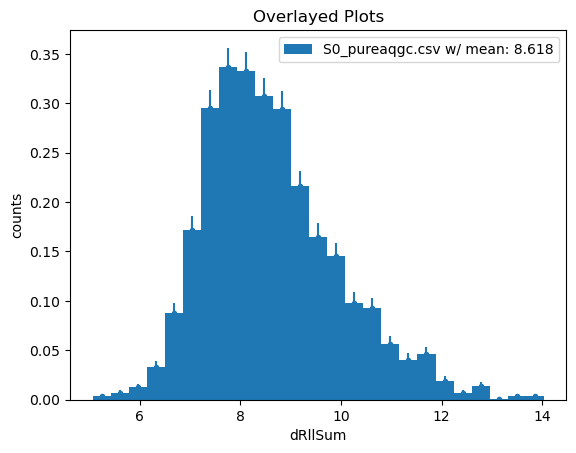

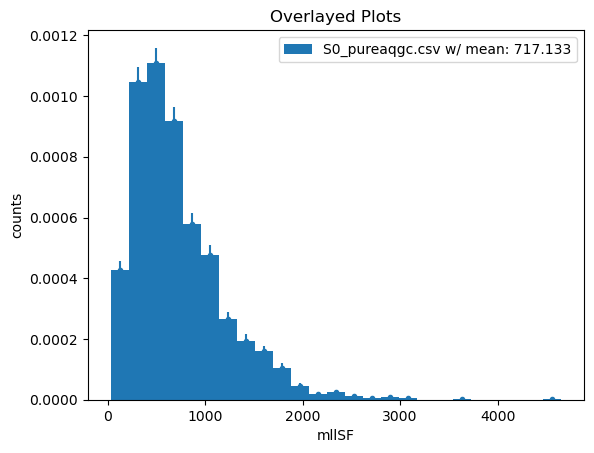

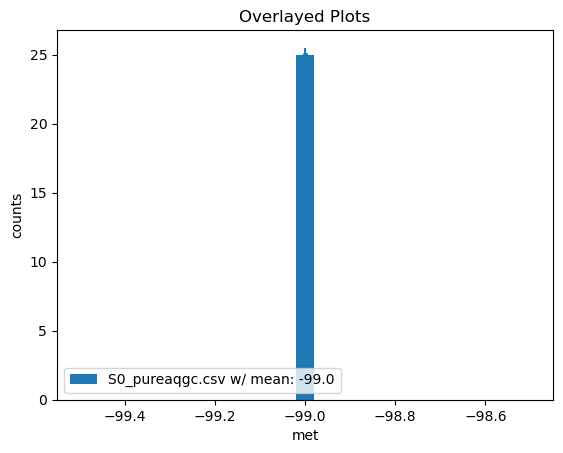

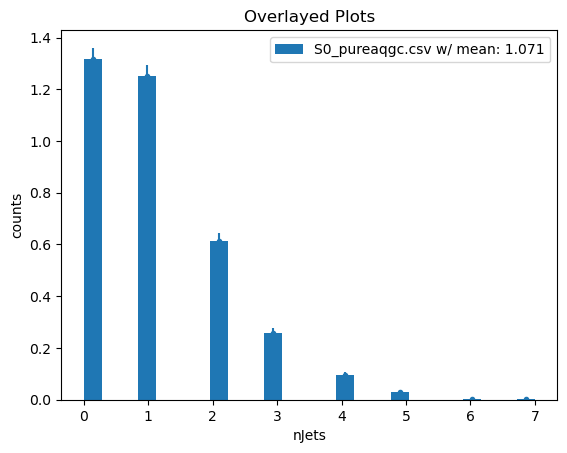

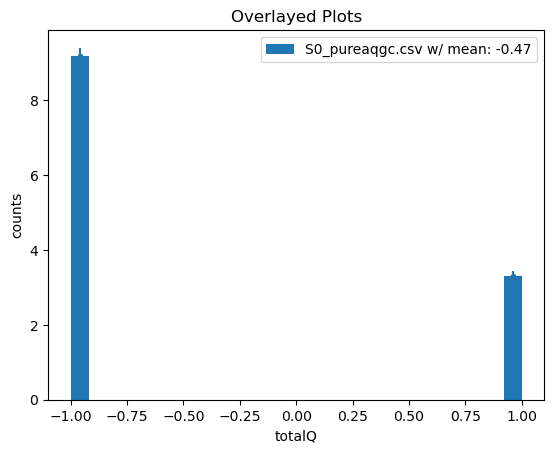

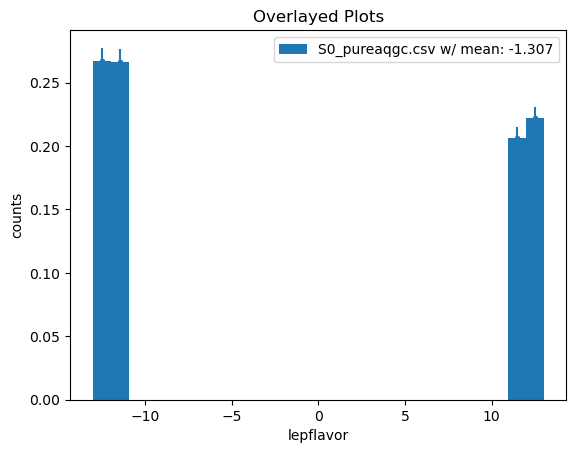

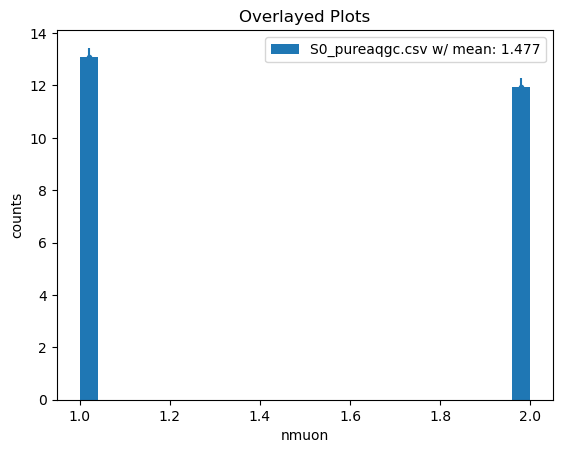

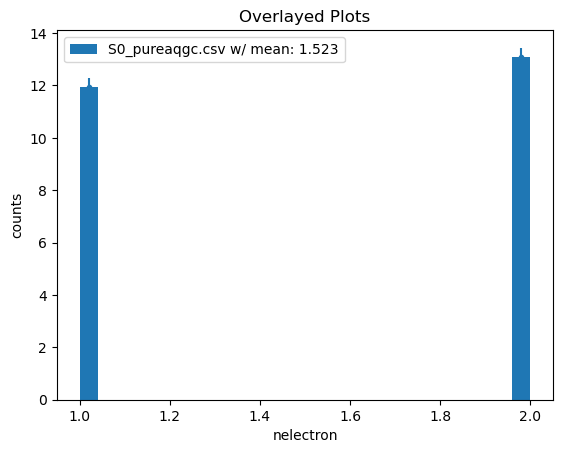

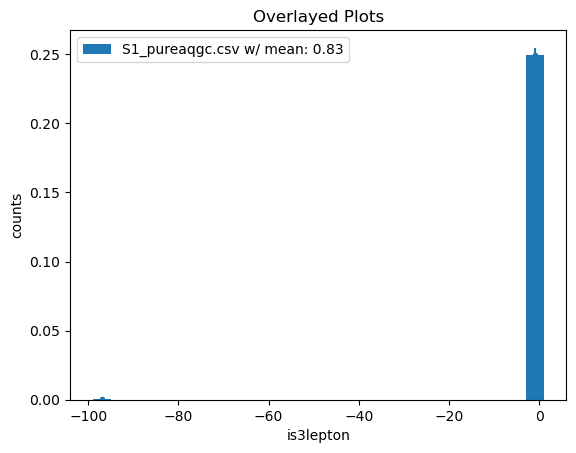

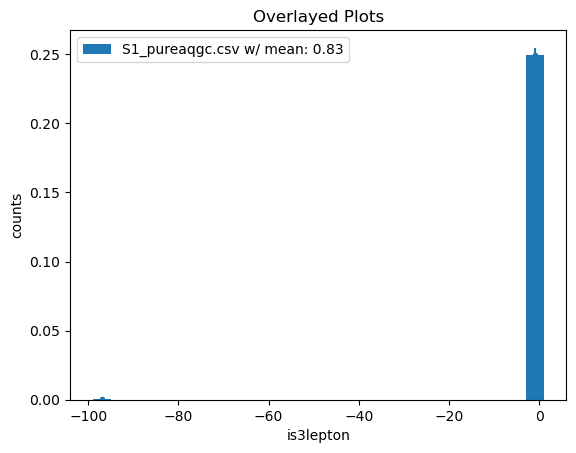

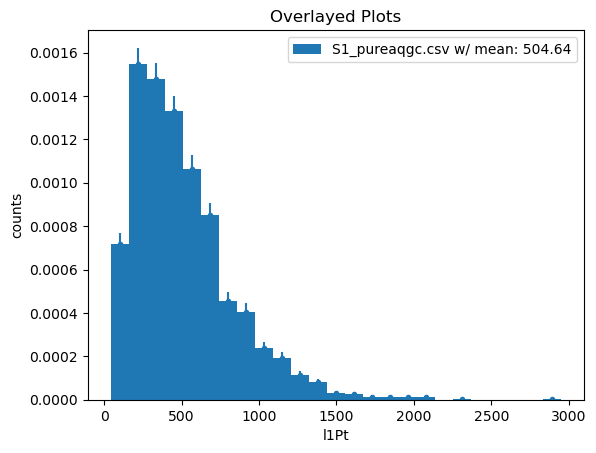

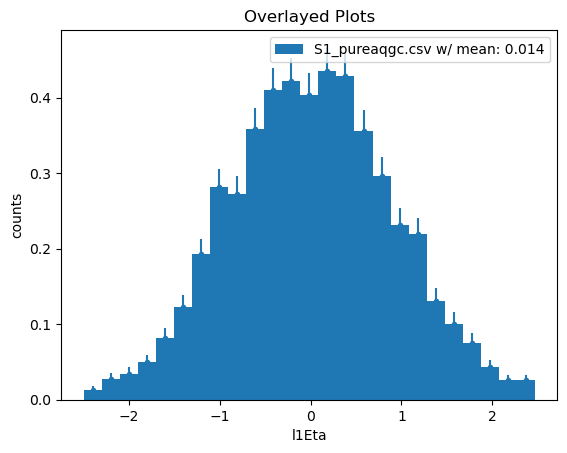

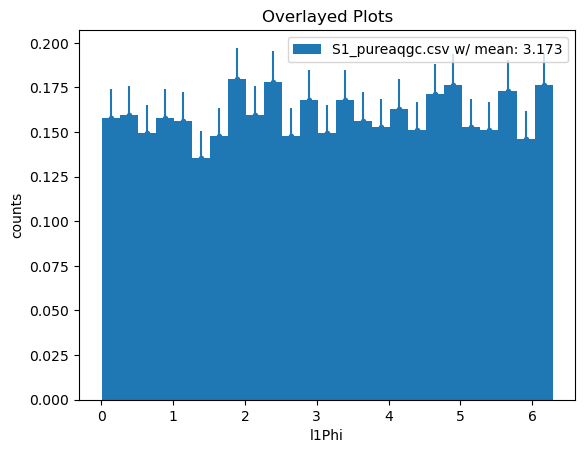

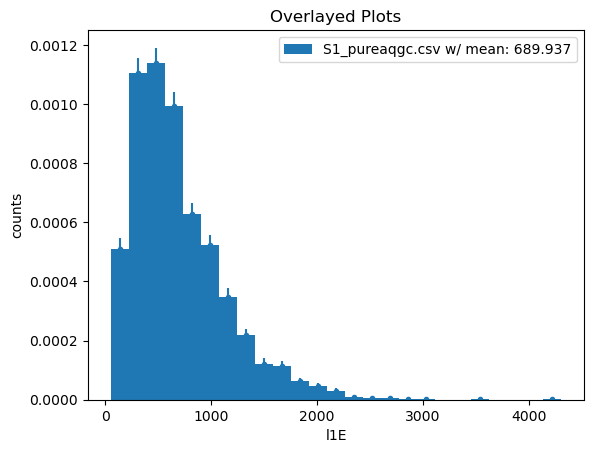

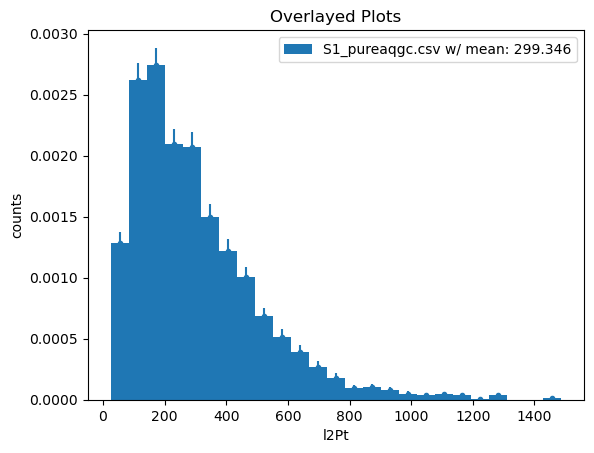

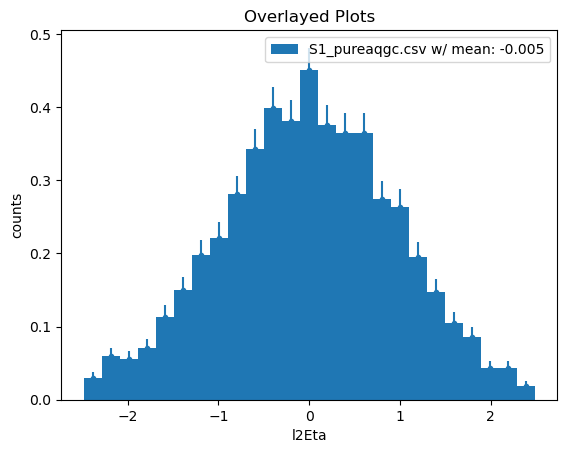

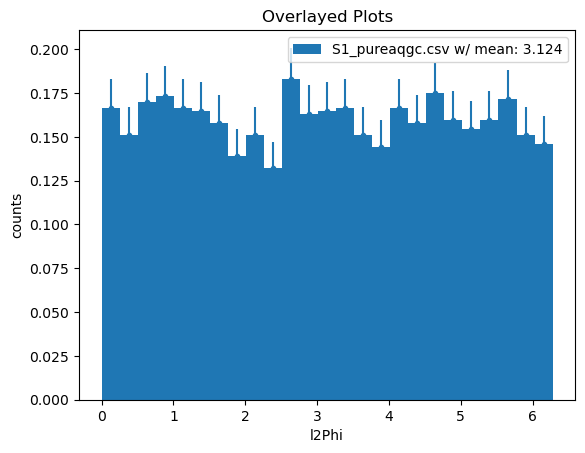

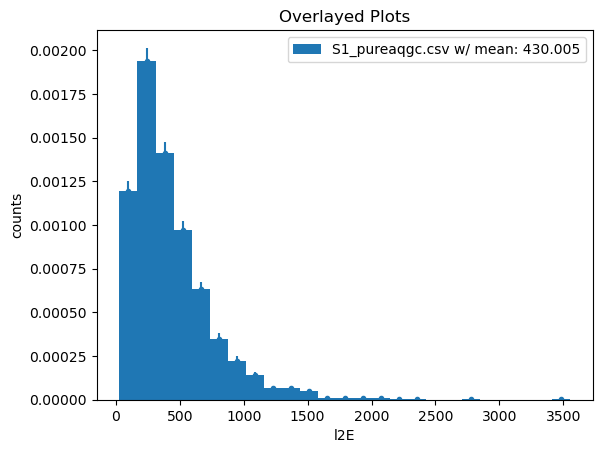

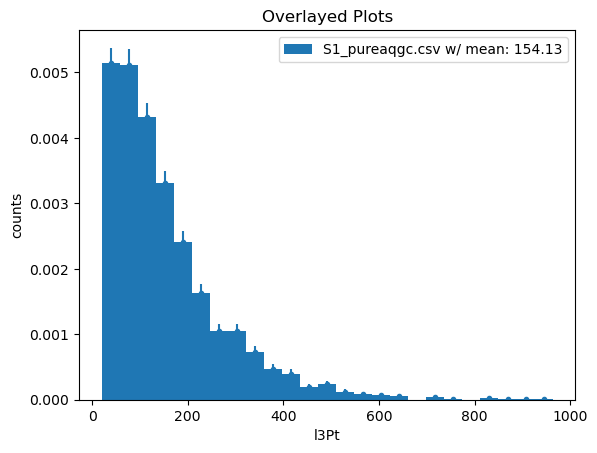

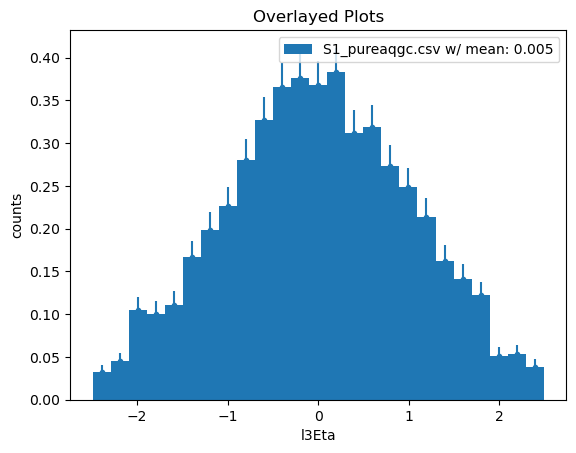

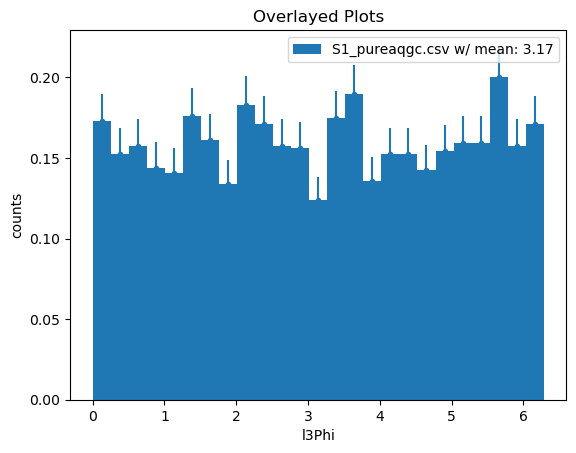

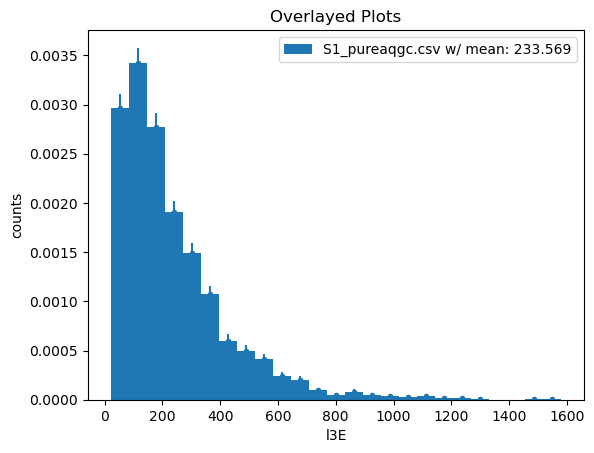

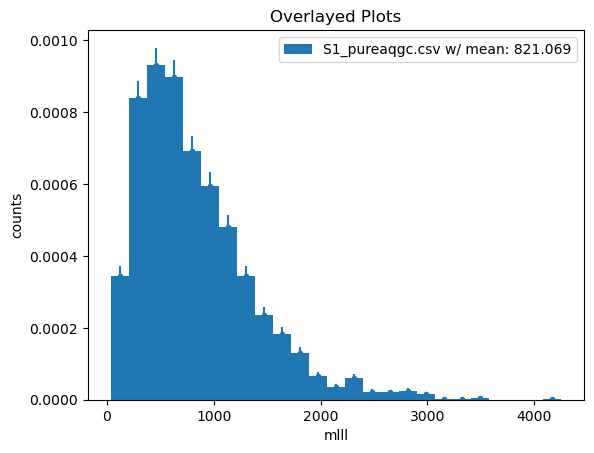

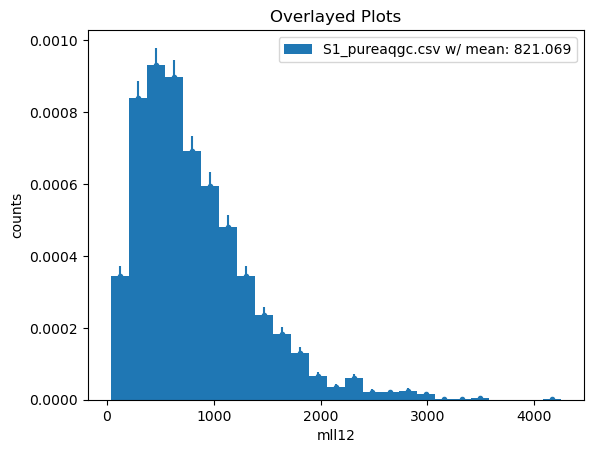

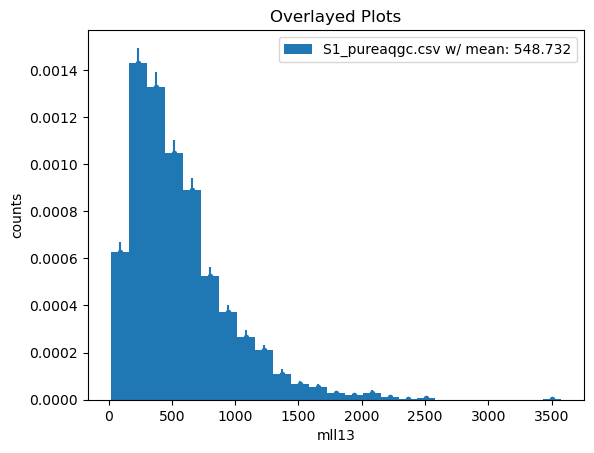

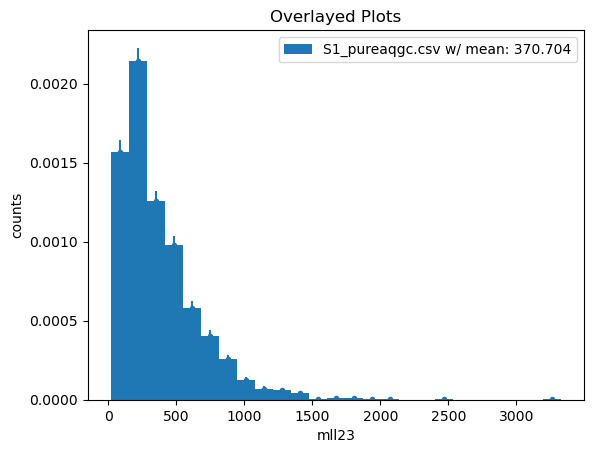

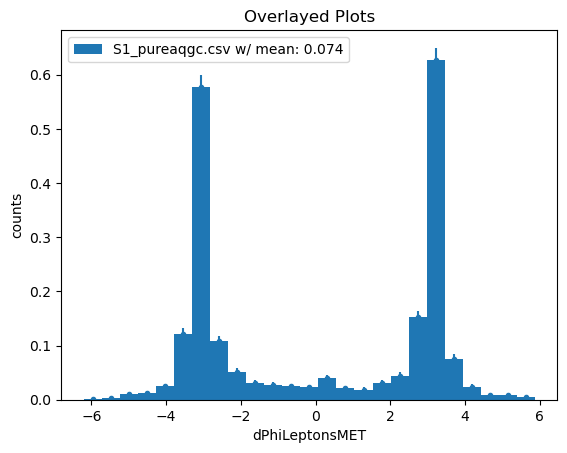

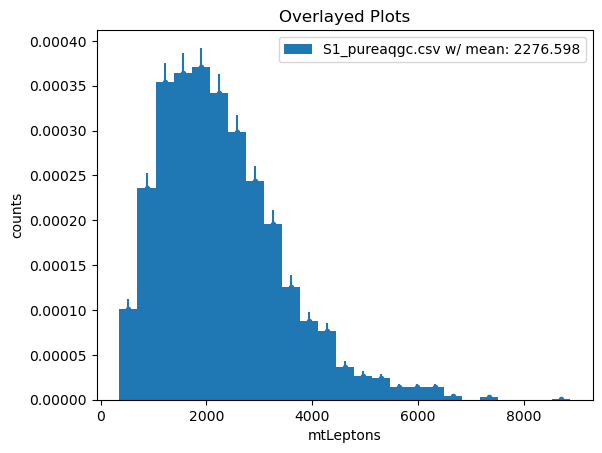

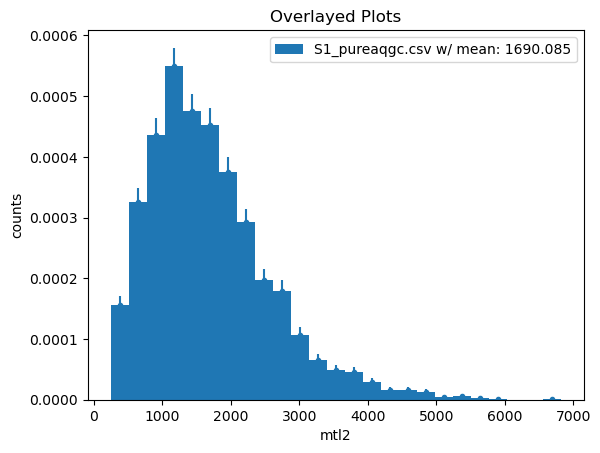

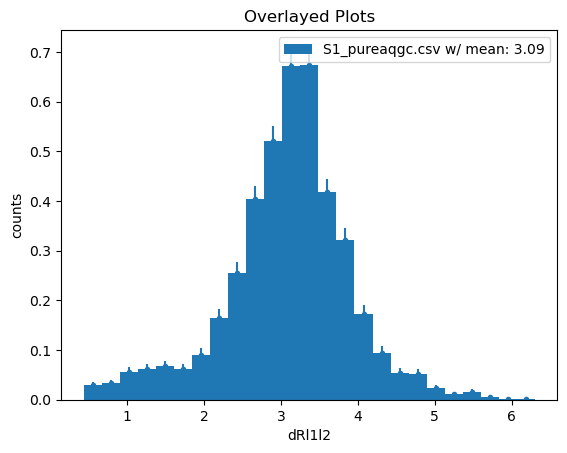

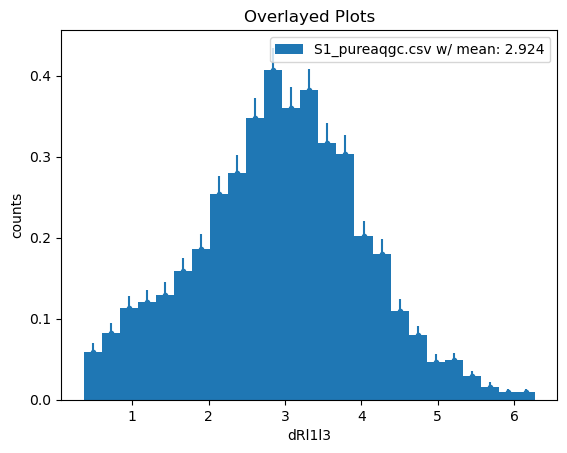

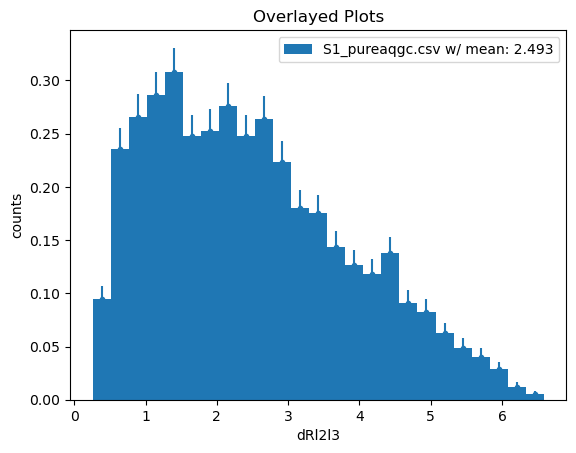

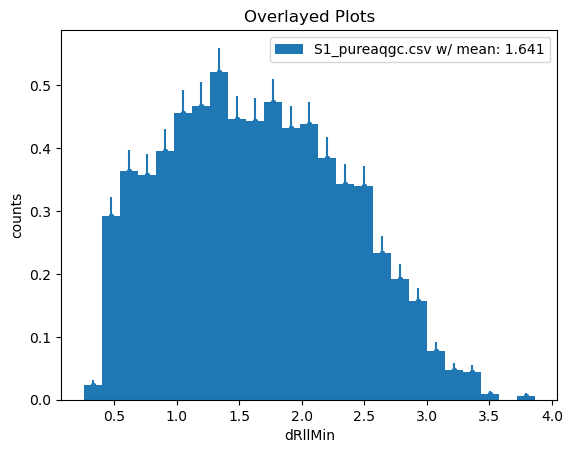

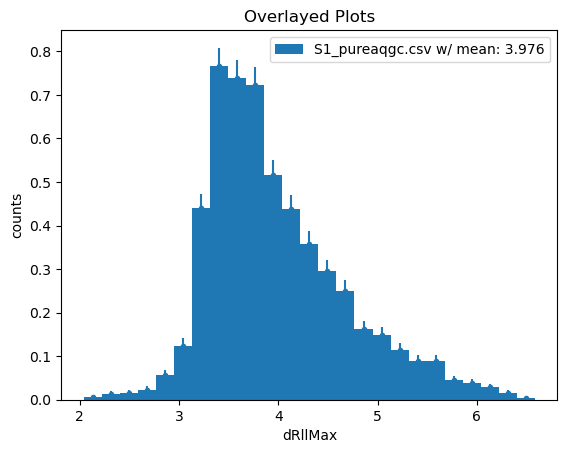

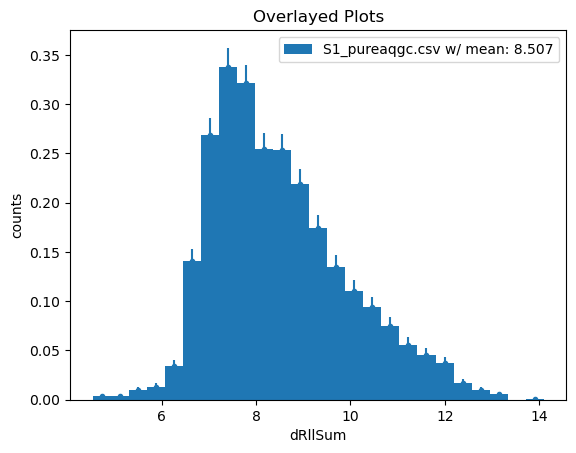

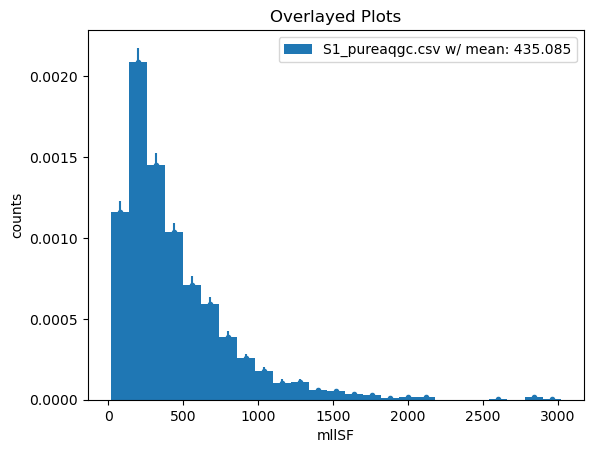

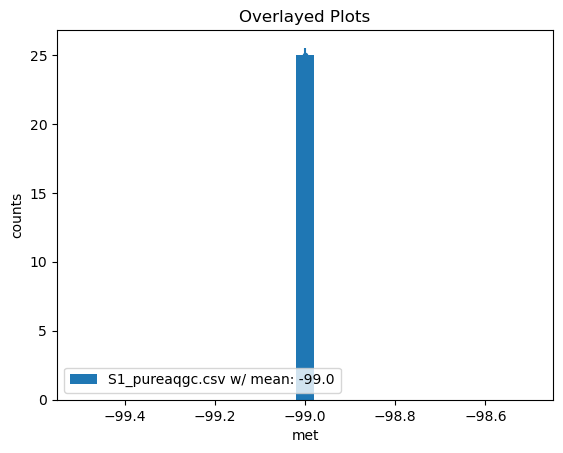

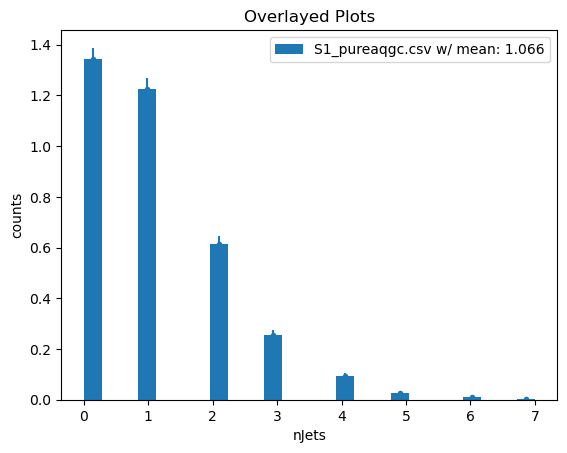

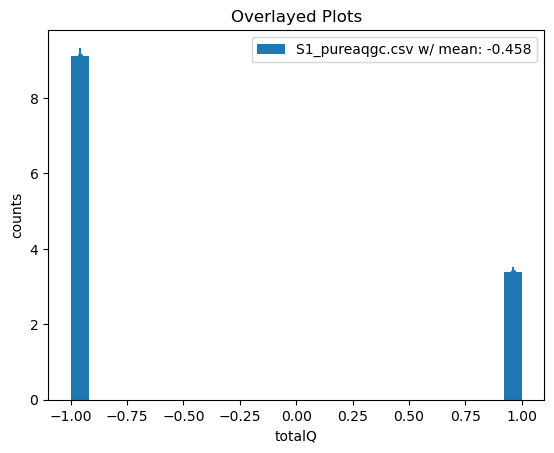

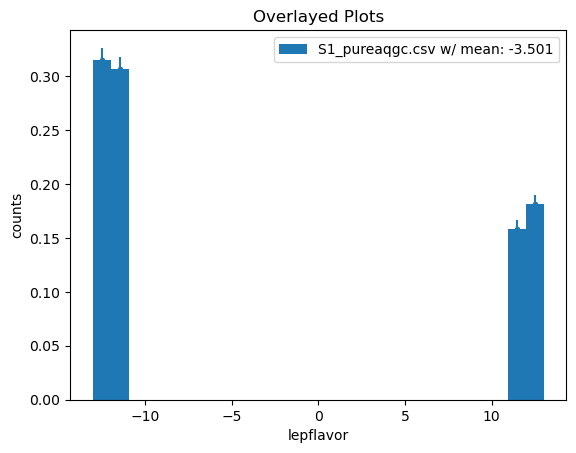

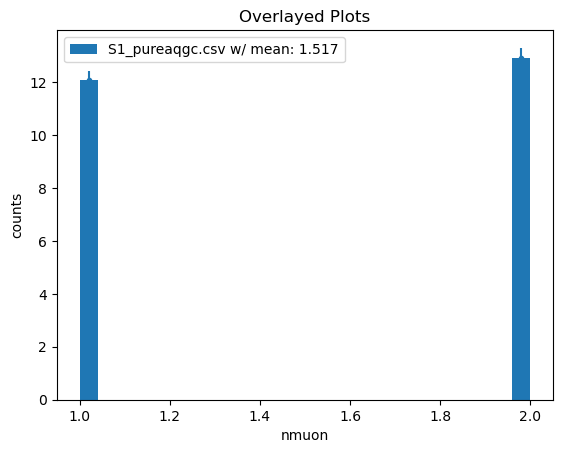

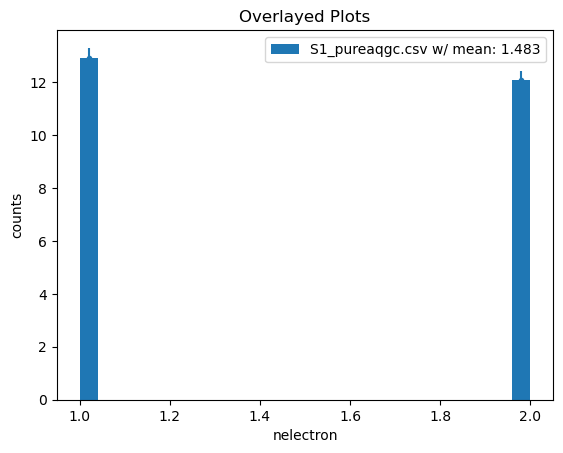

In [4]:
#graphing each variable for all operators
for file in files:
    info = pd.read_csv(file, delimiter=" ")
    for col in cols:
        data = {file:info[col]}
        graph_data(data, col)

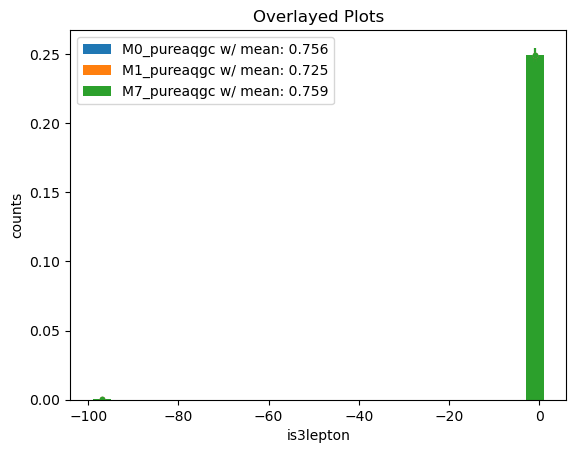

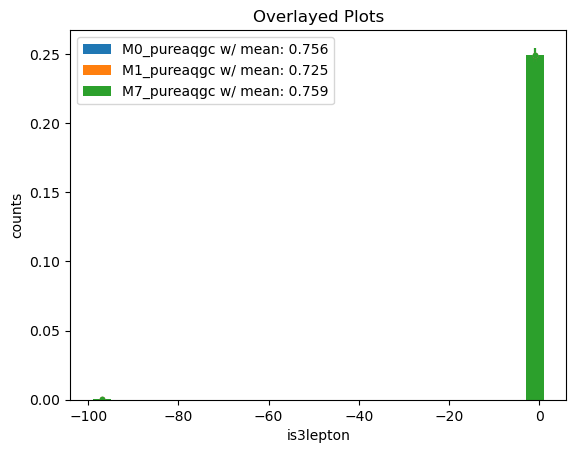

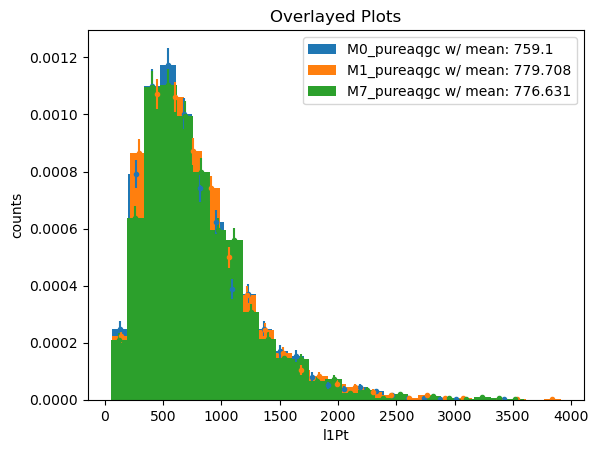

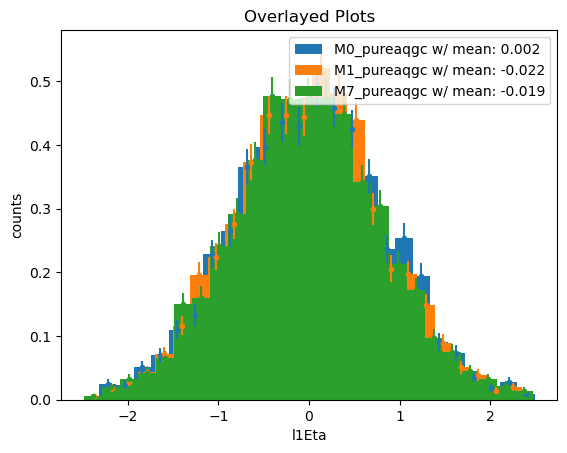

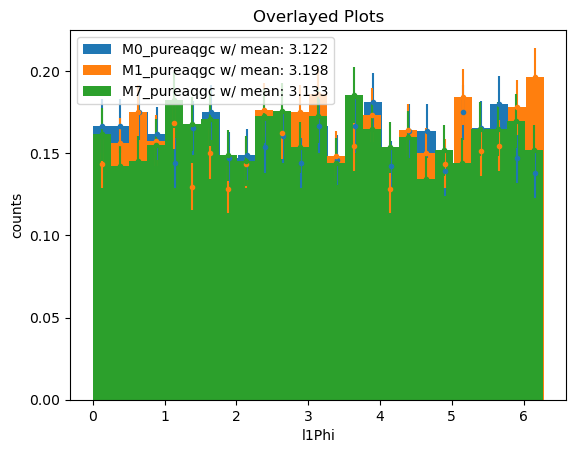

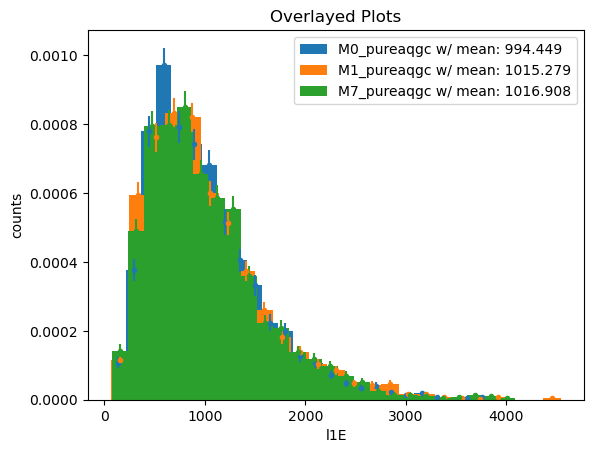

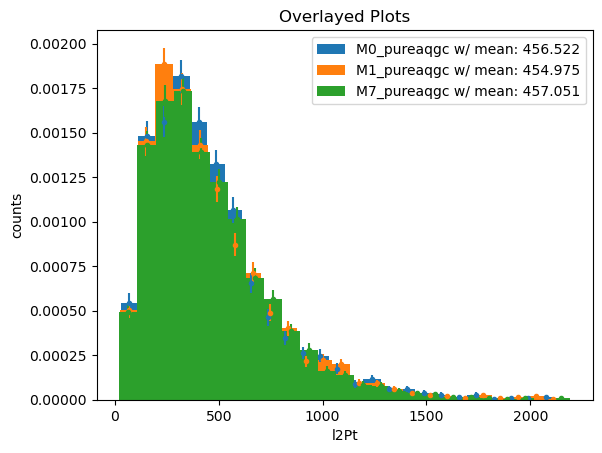

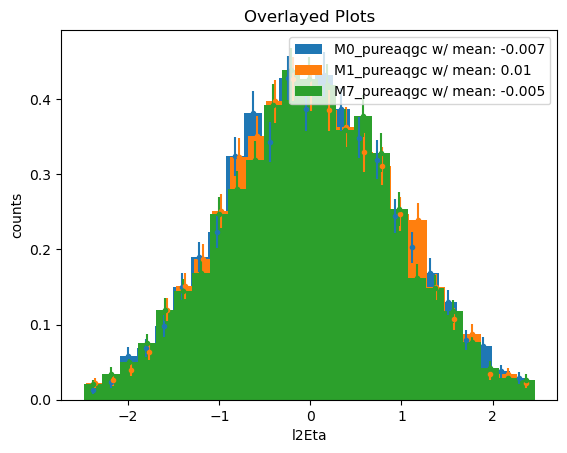

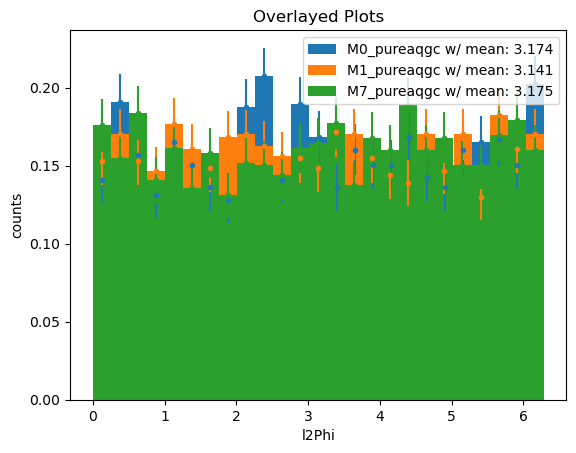

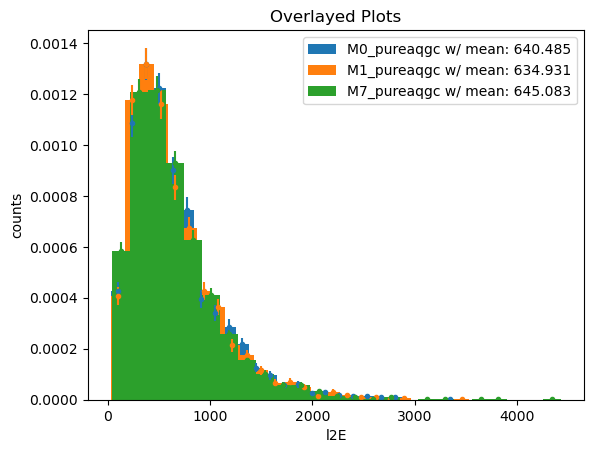

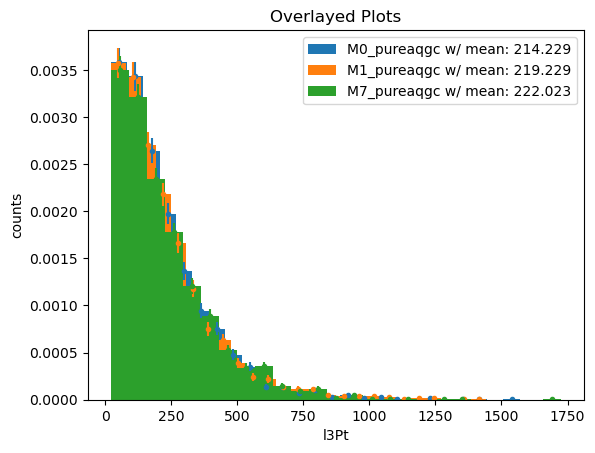

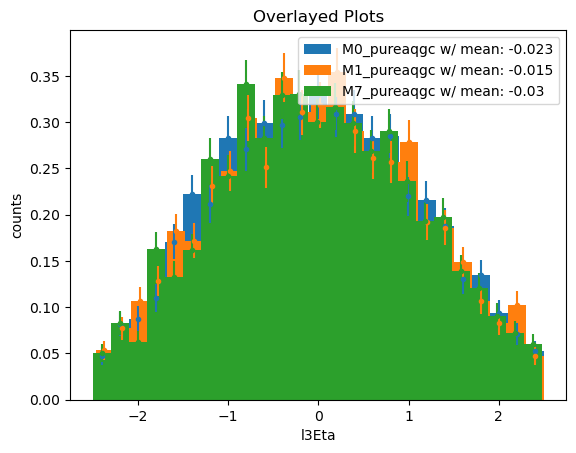

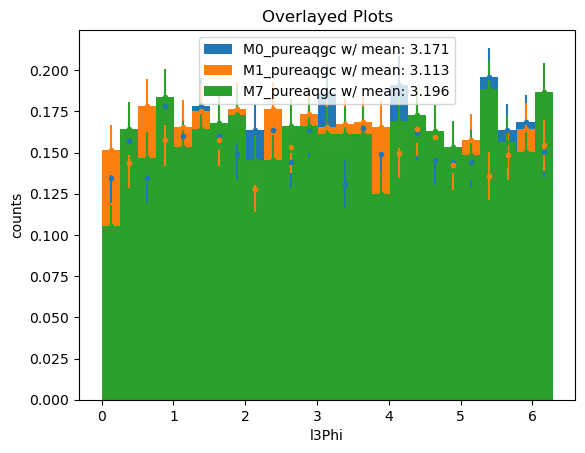

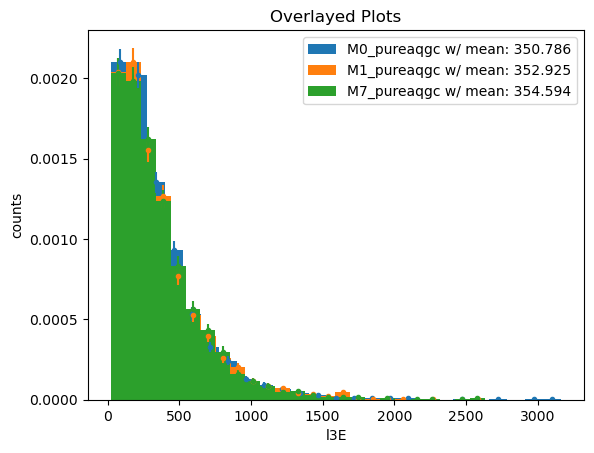

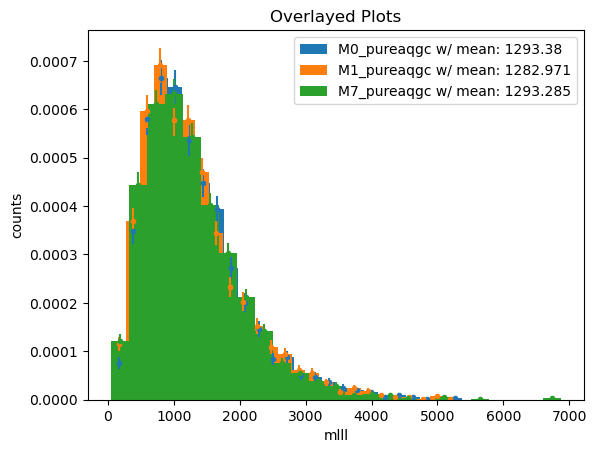

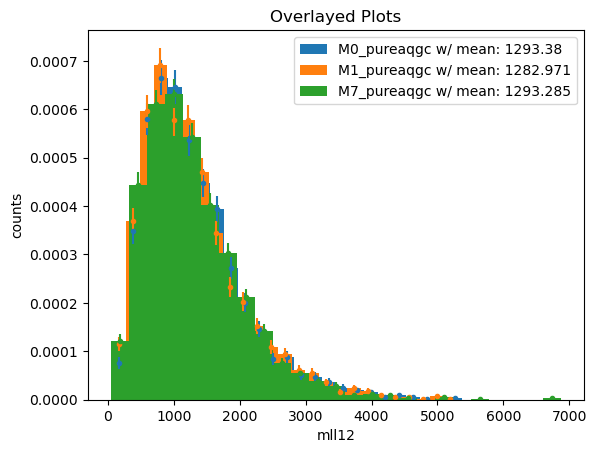

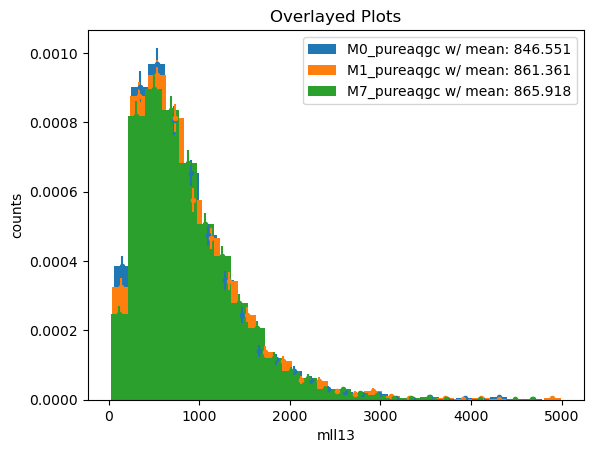

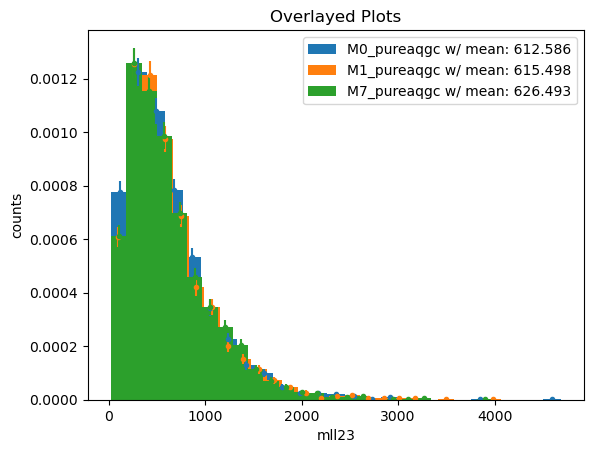

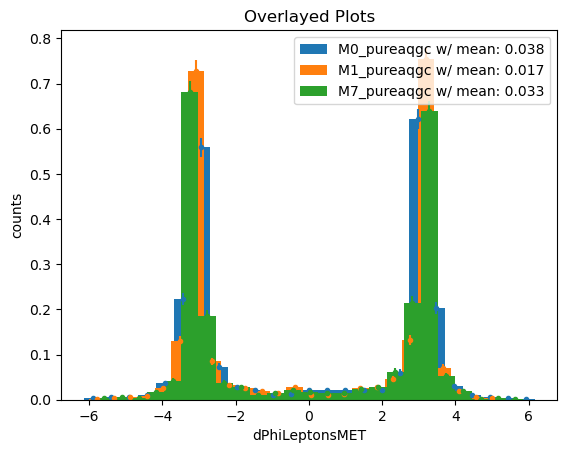

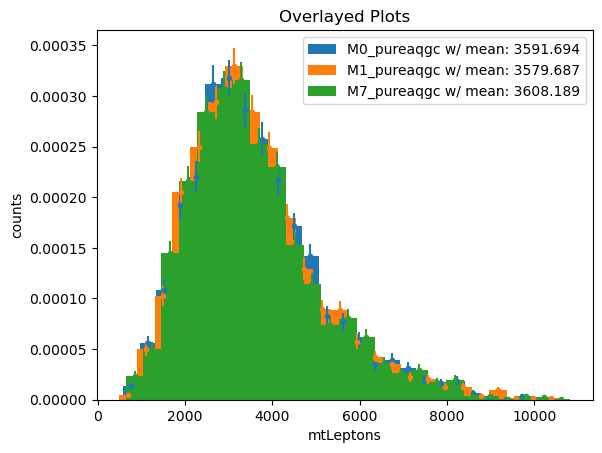

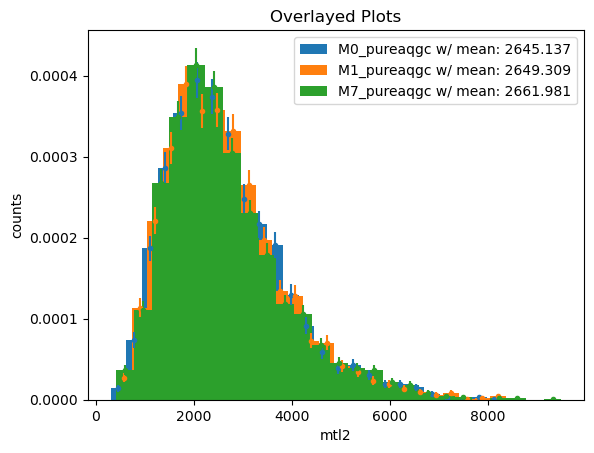

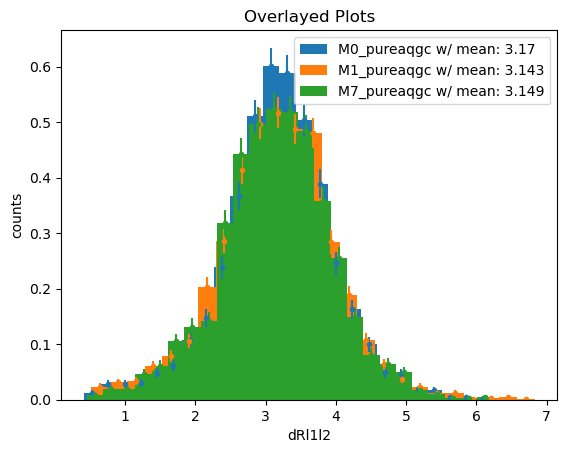

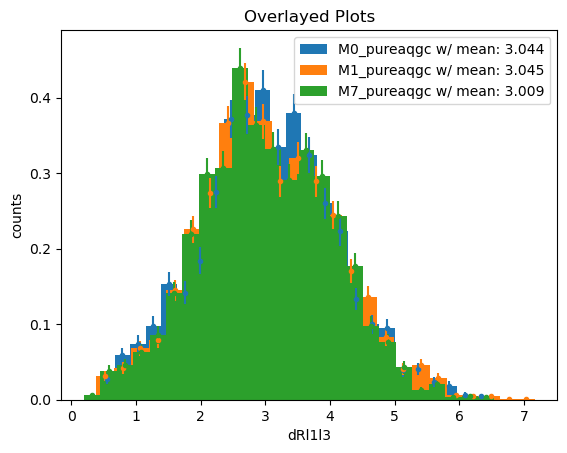

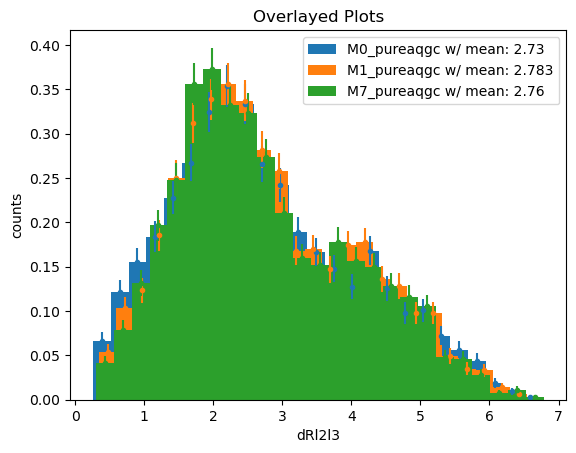

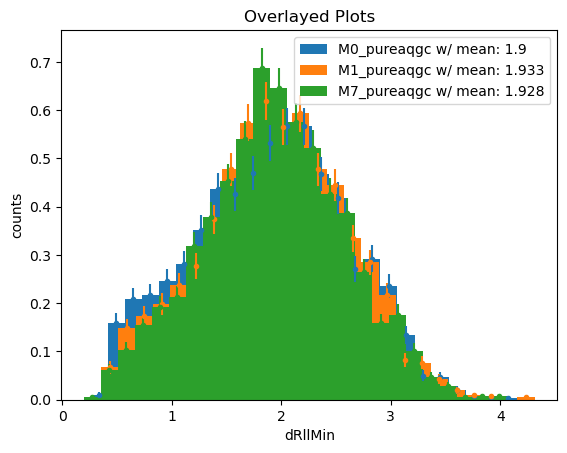

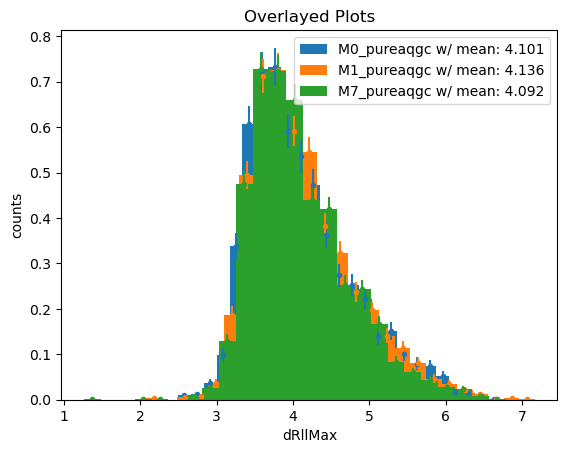

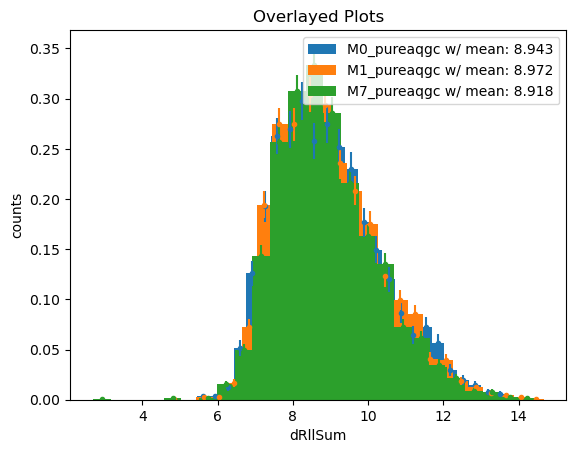

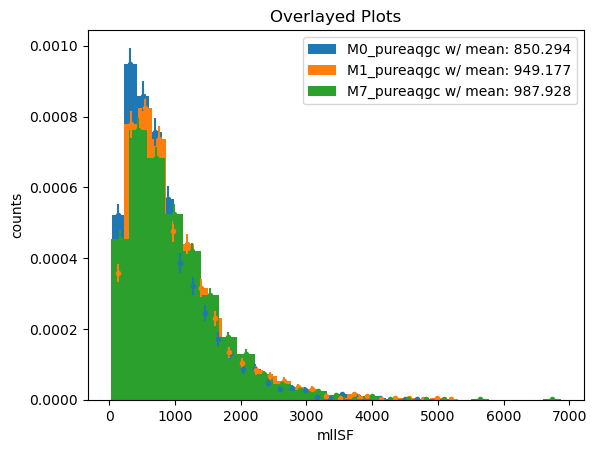

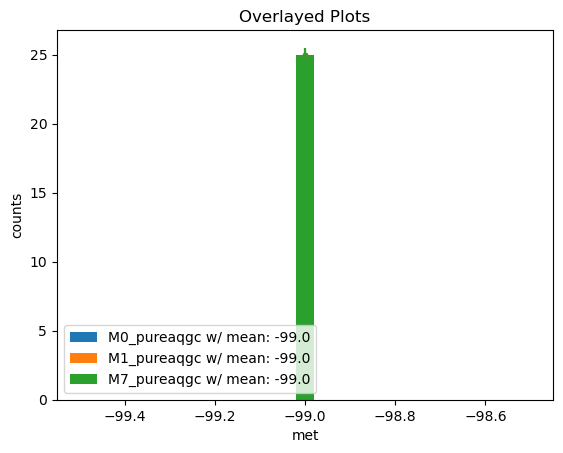

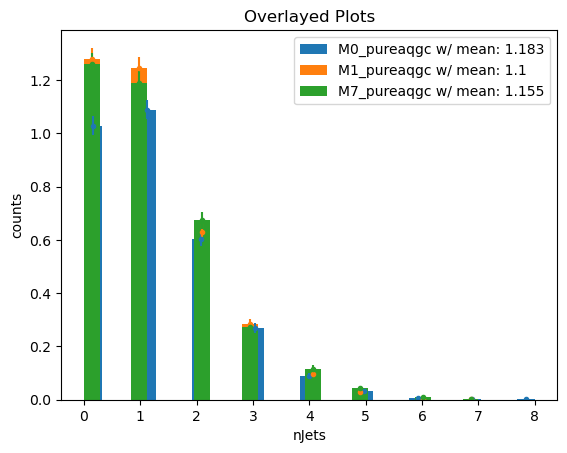

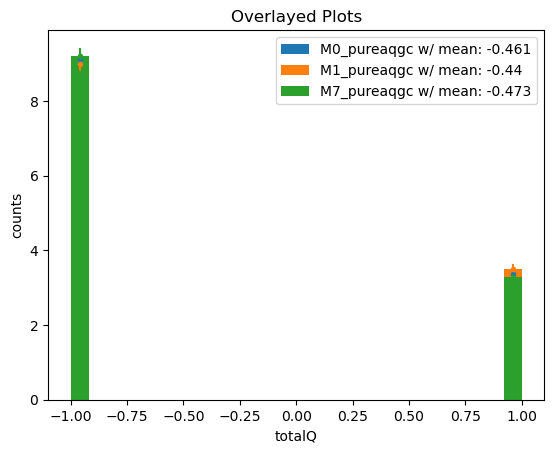

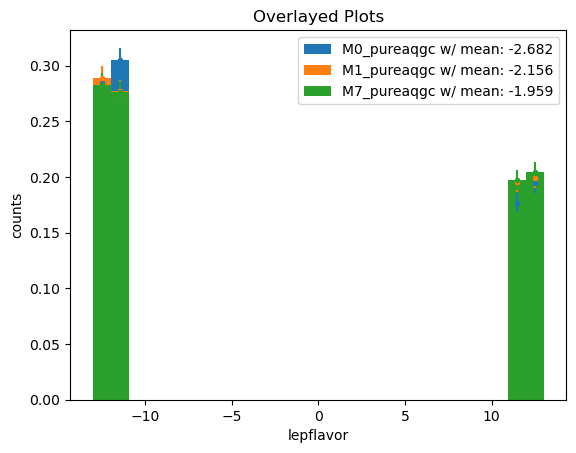

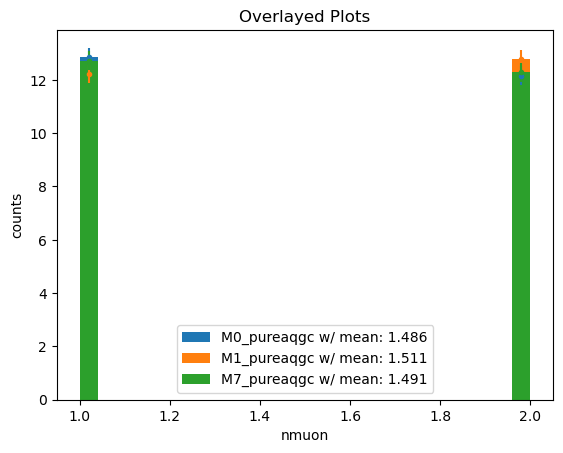

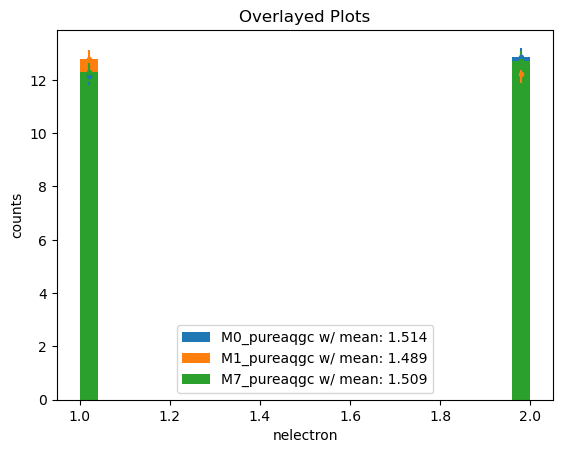

In [5]:
#graphing mixed terms operators for each variable
for col in cols:
    graph_files(files[:3], col)

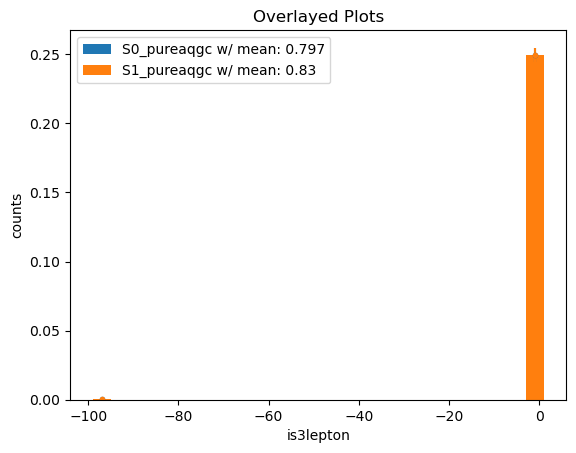

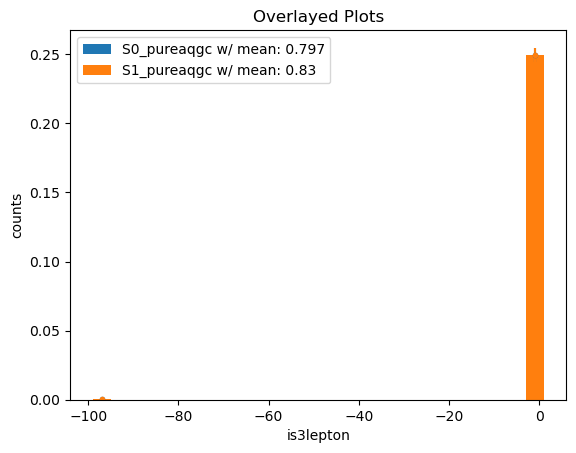

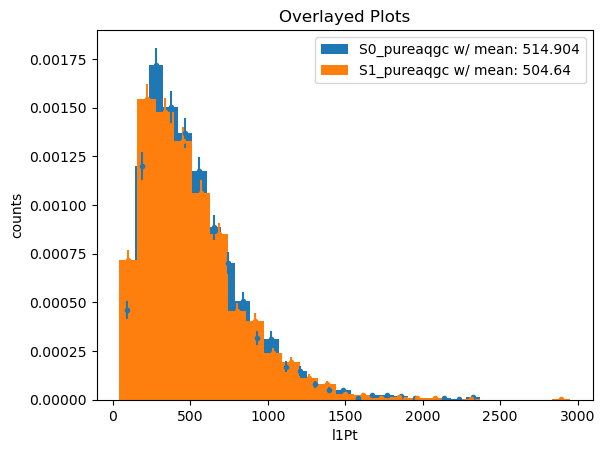

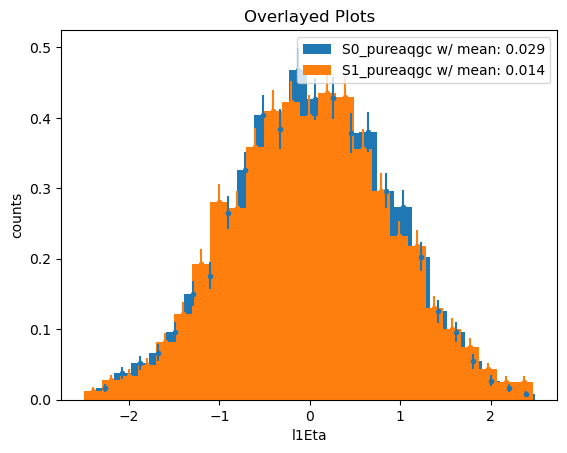

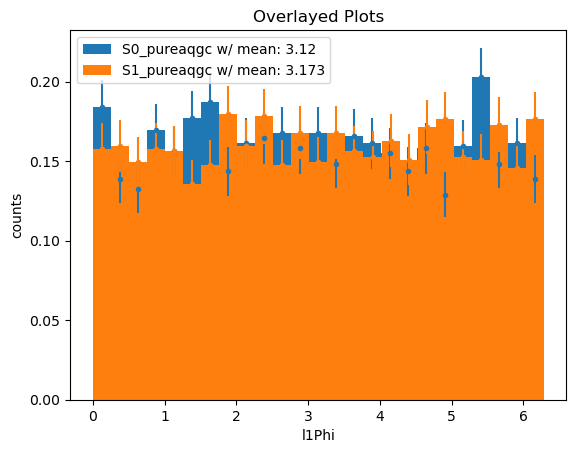

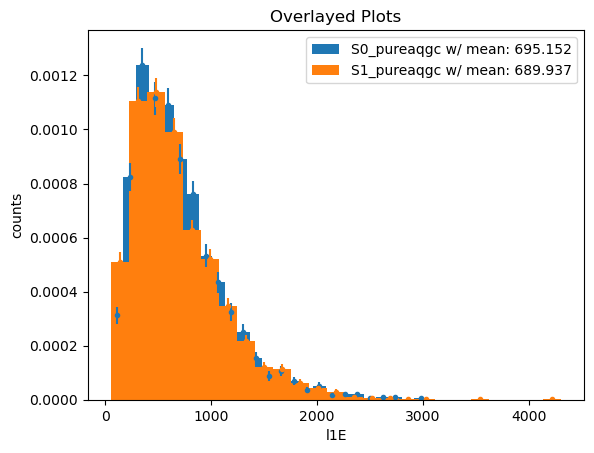

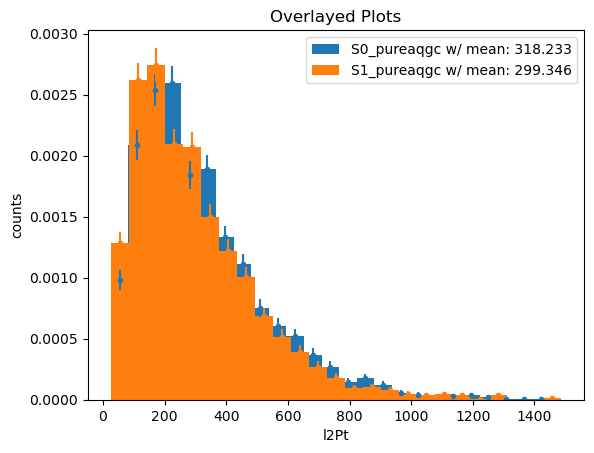

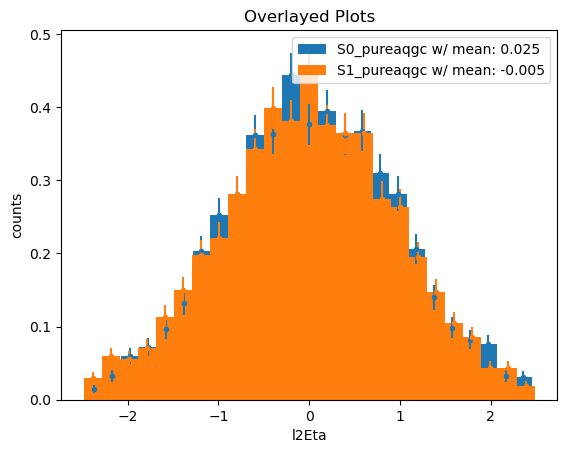

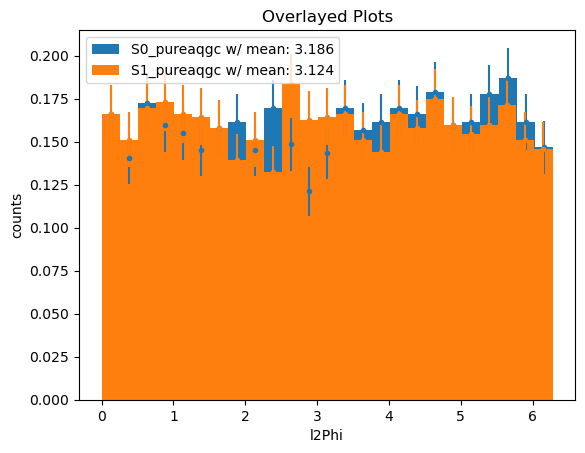

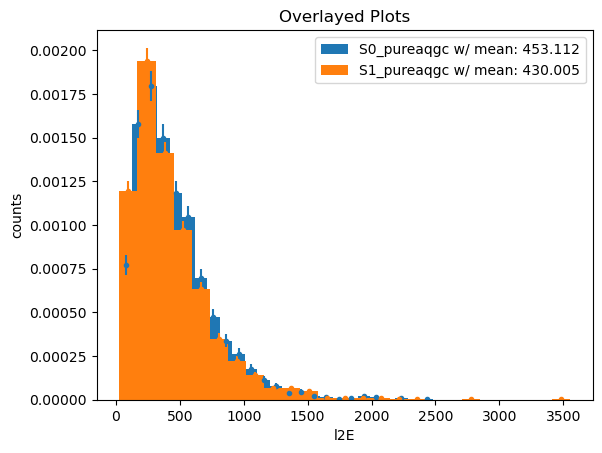

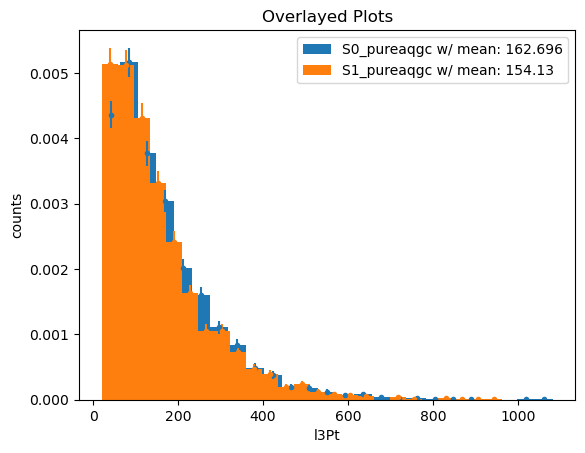

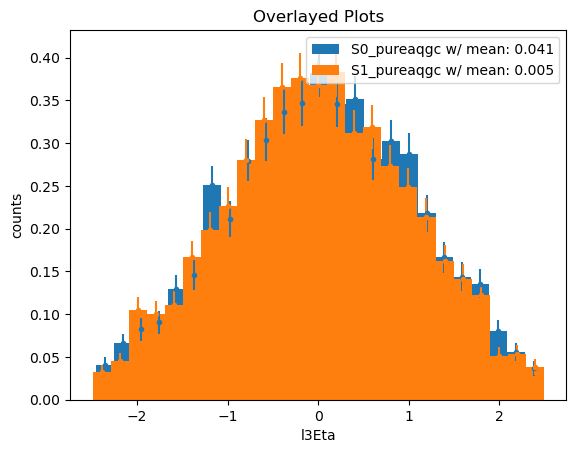

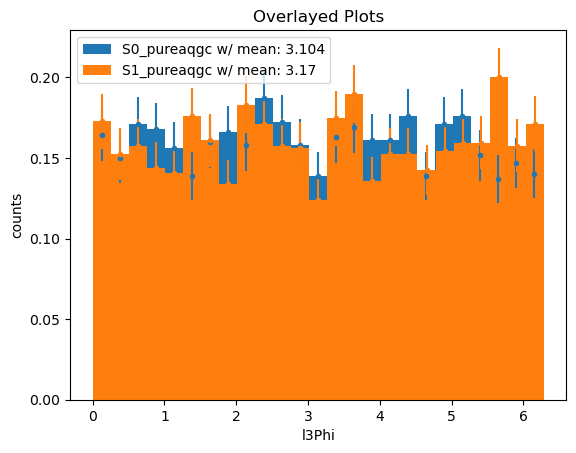

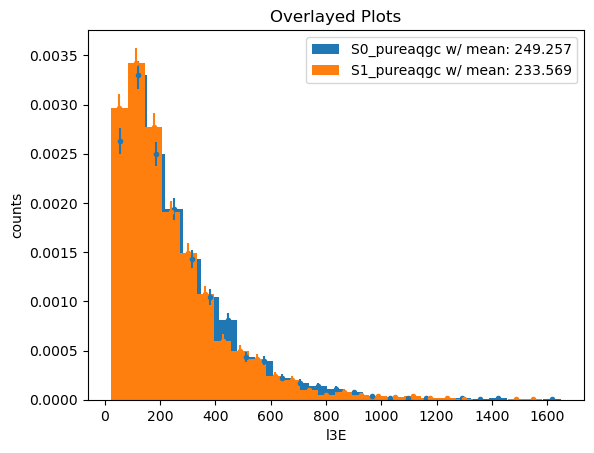

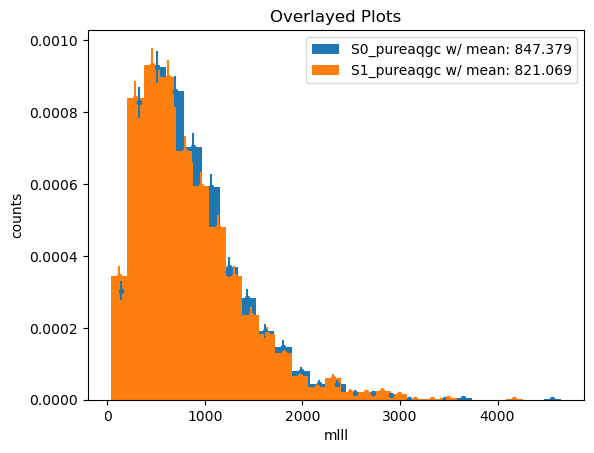

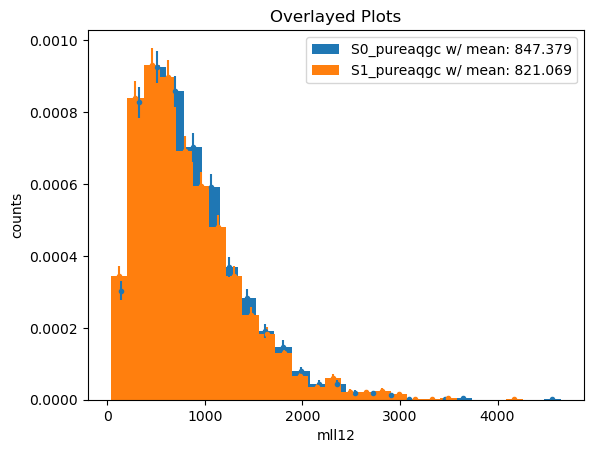

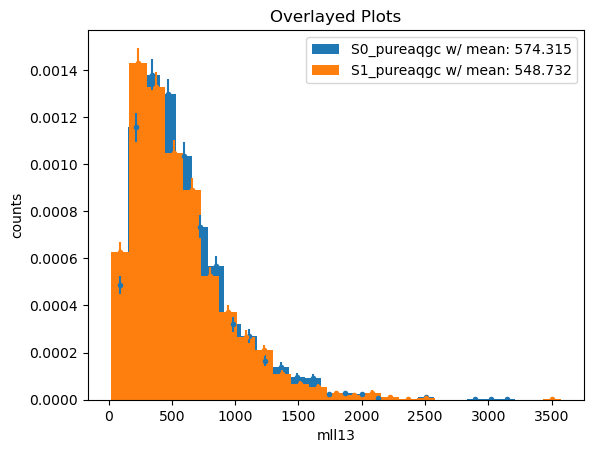

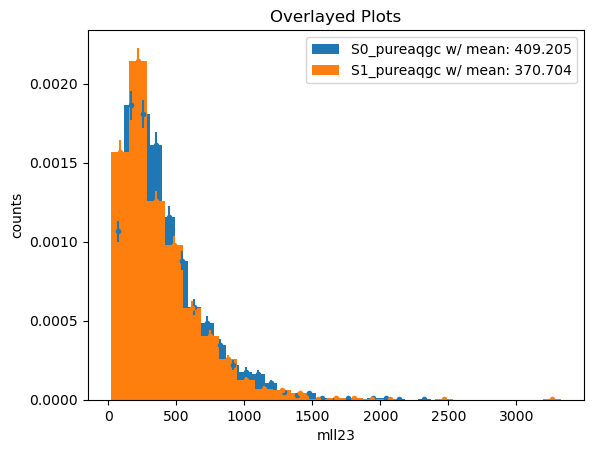

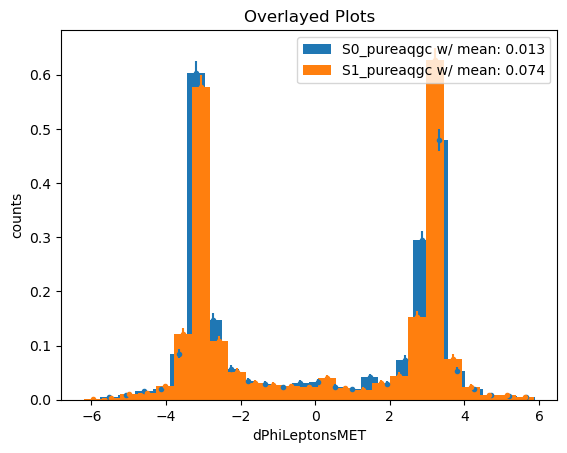

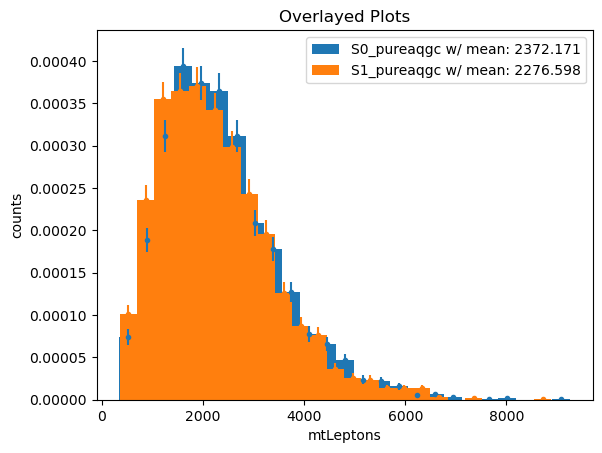

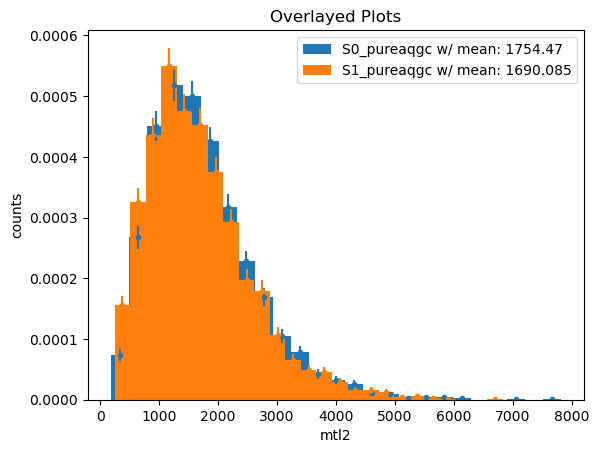

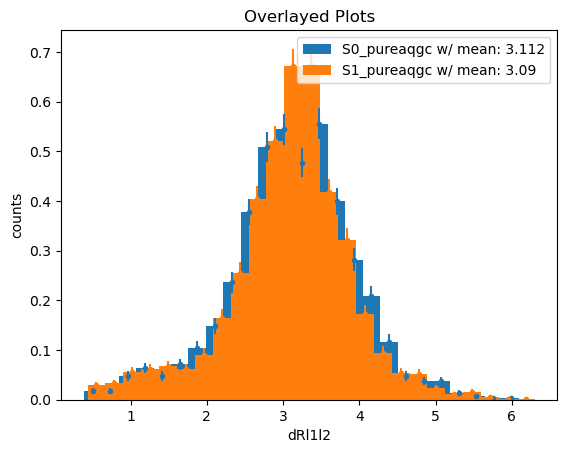

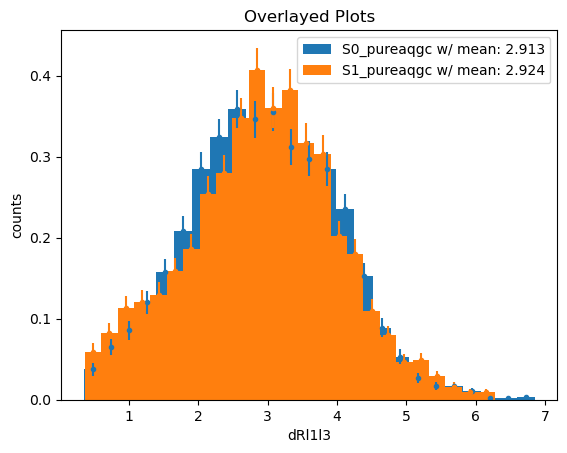

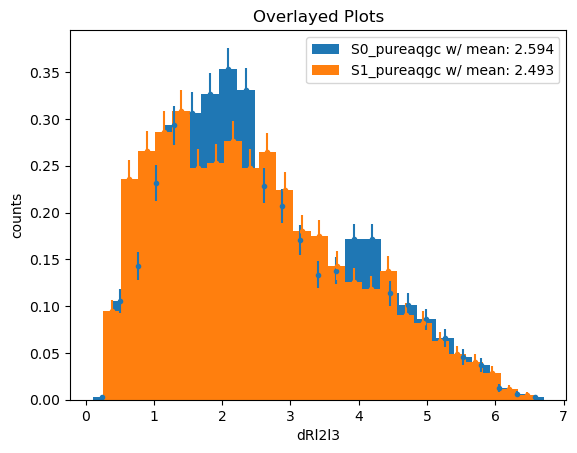

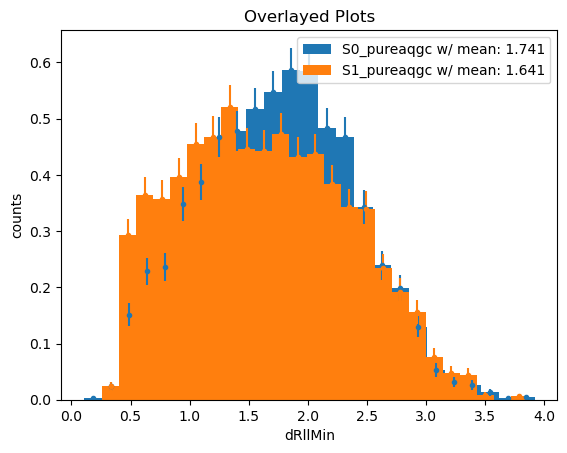

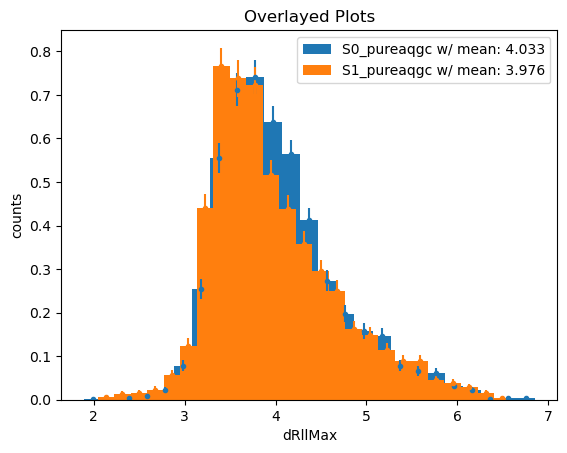

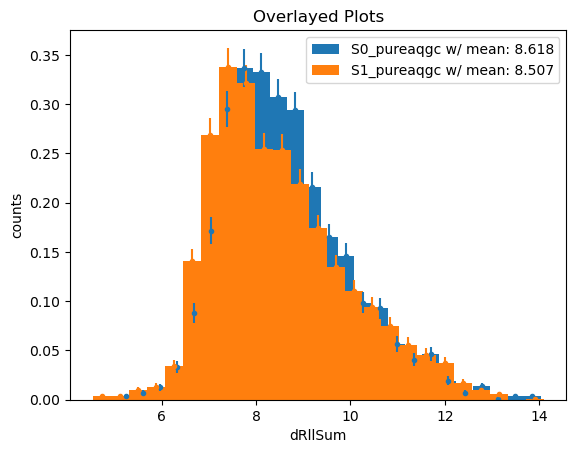

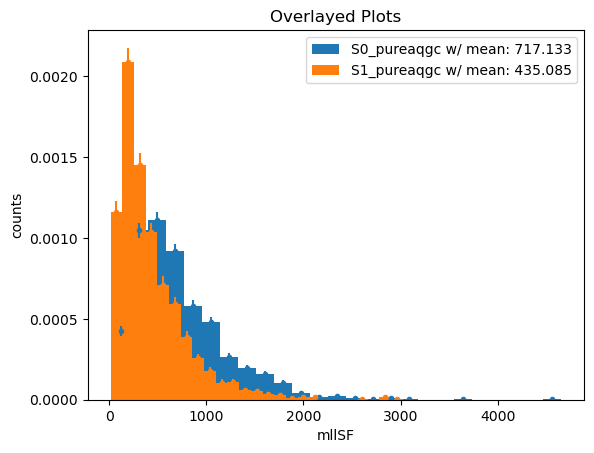

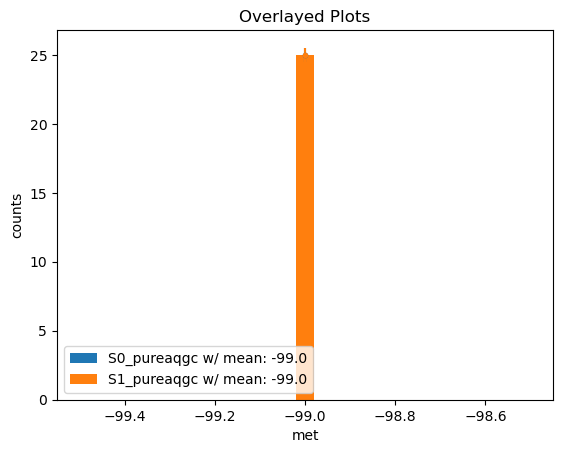

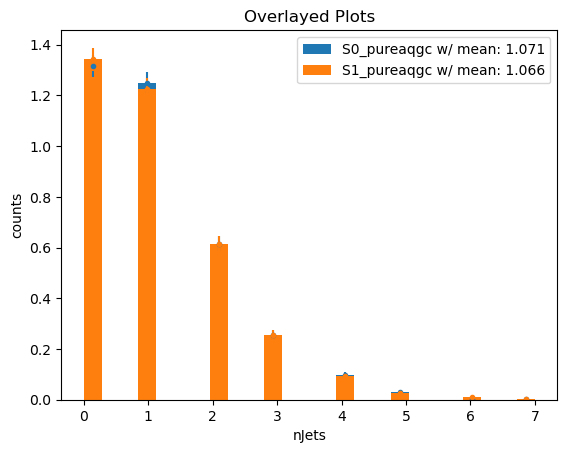

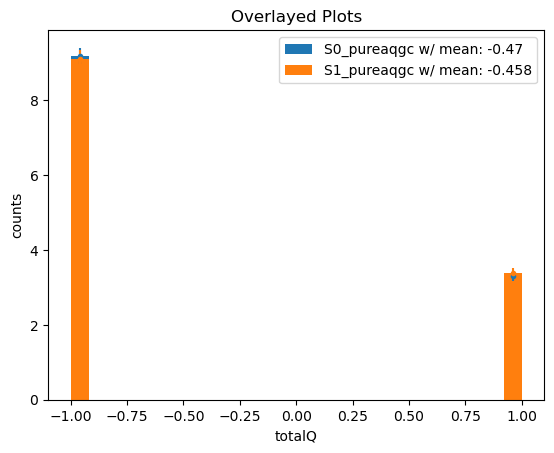

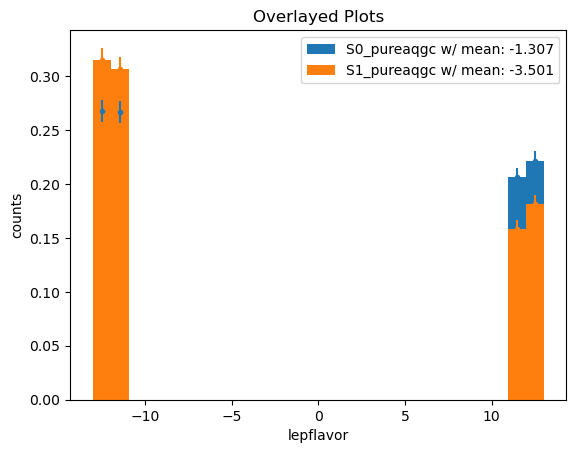

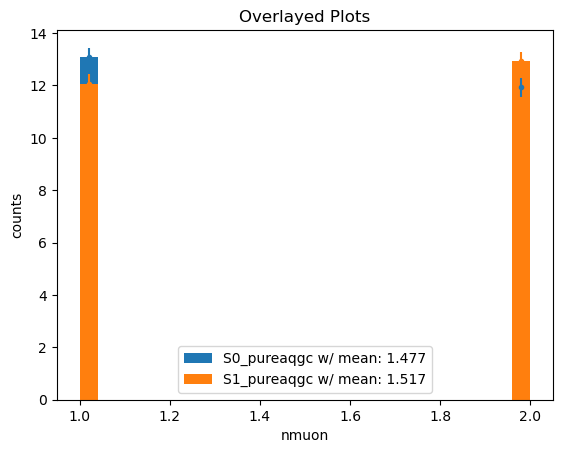

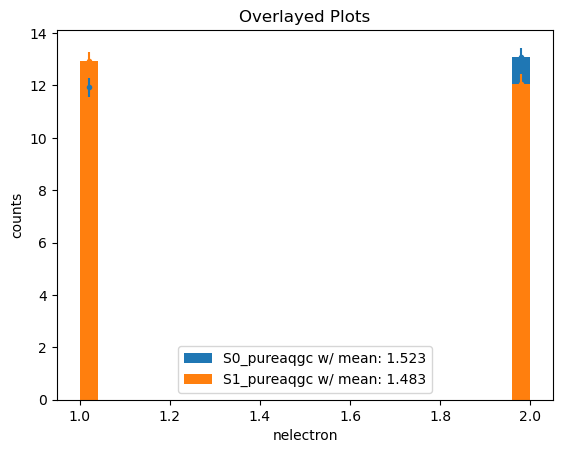

In [6]:
#graphing pure longitudinal operators for each variable
for col in cols:
    graph_files(files[3:], col)

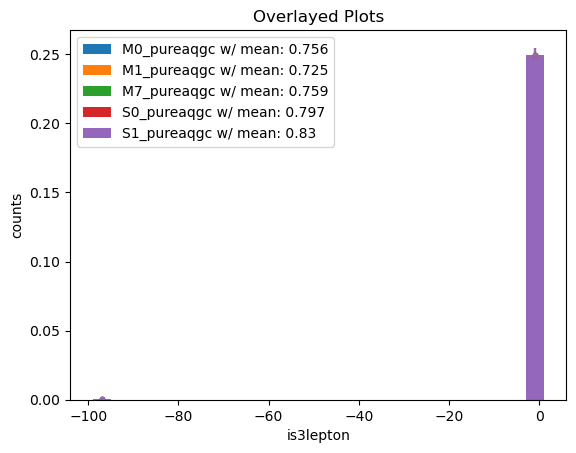

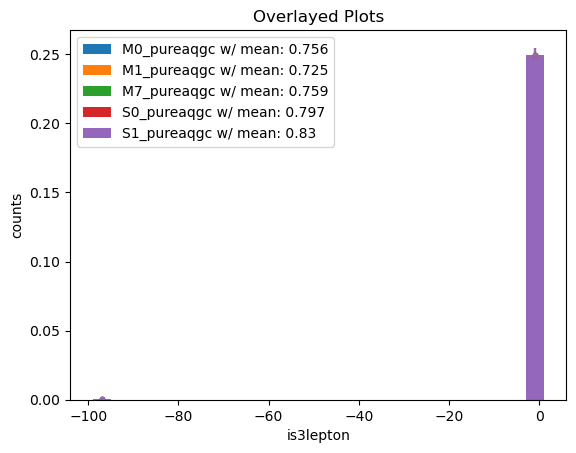

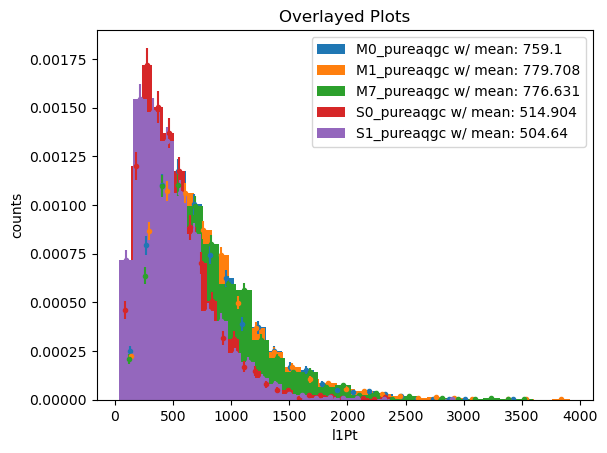

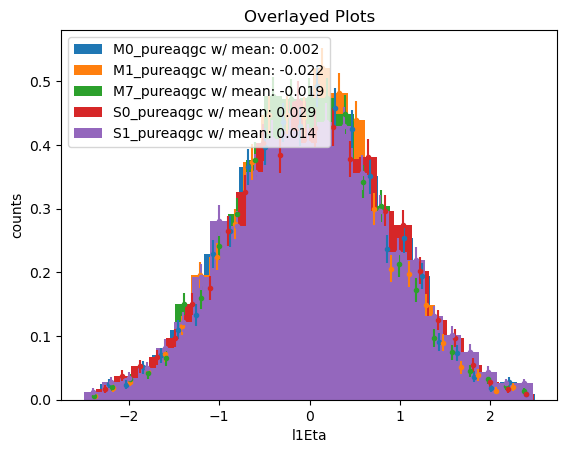

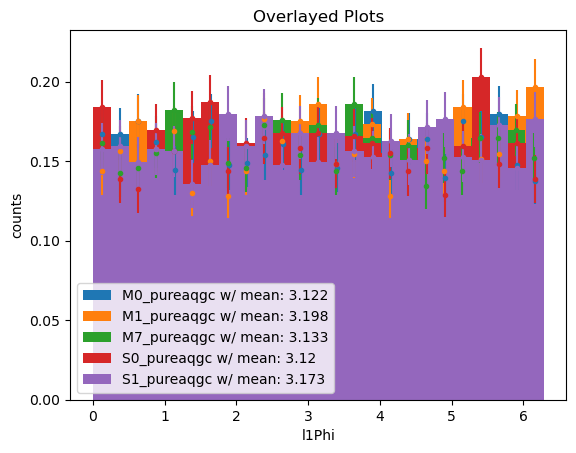

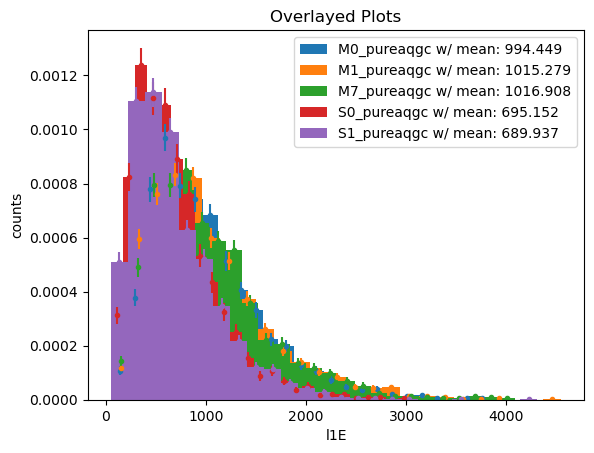

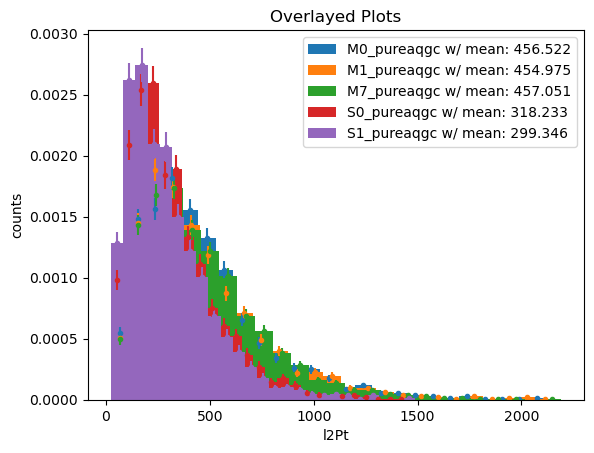

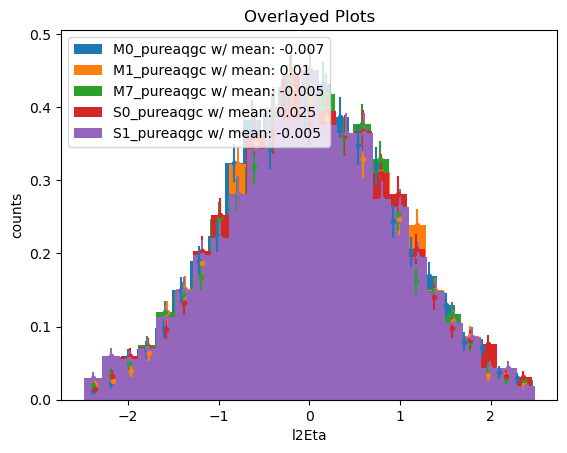

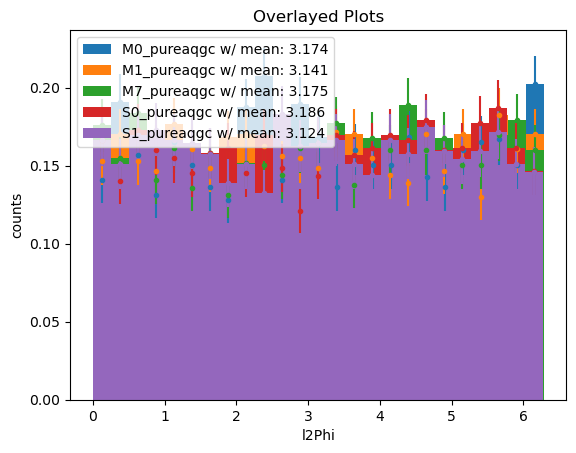

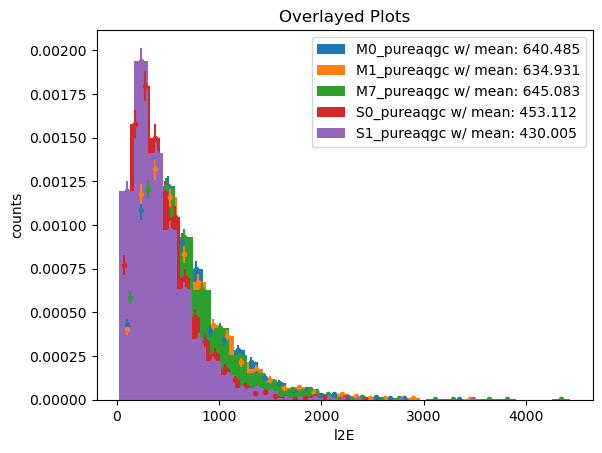

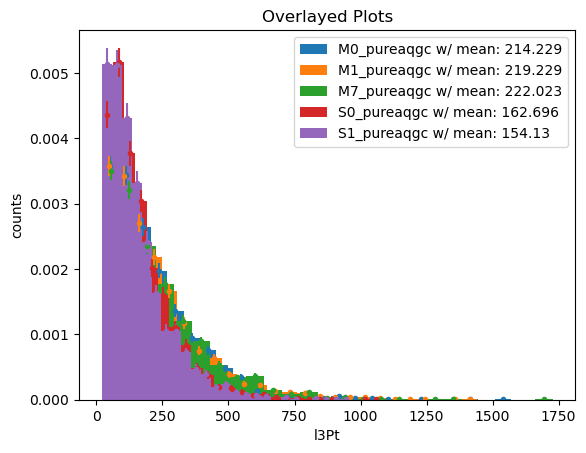

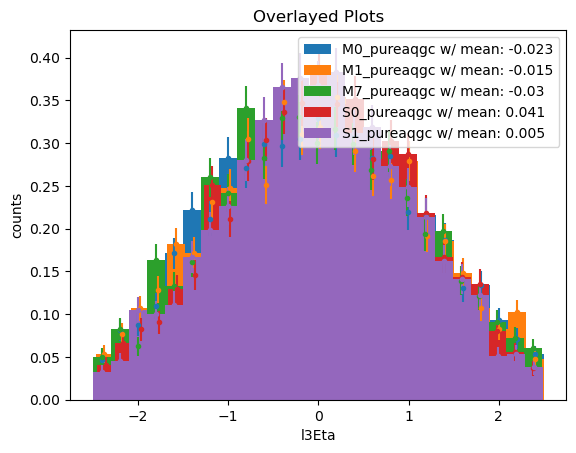

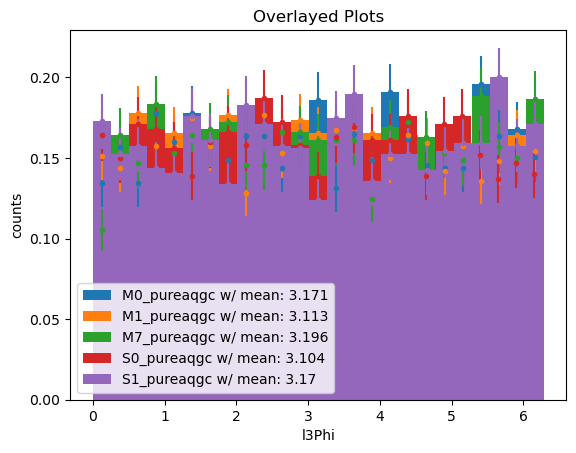

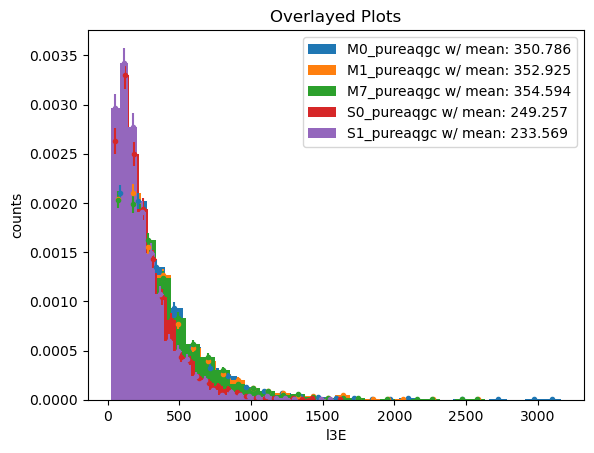

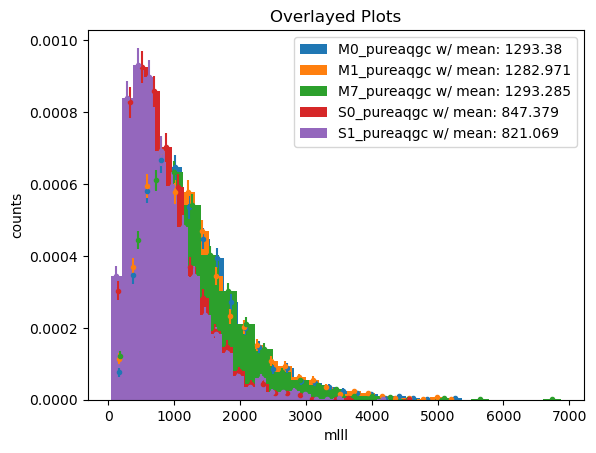

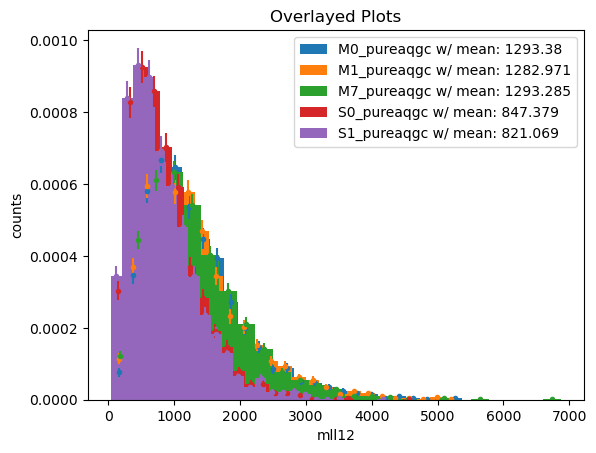

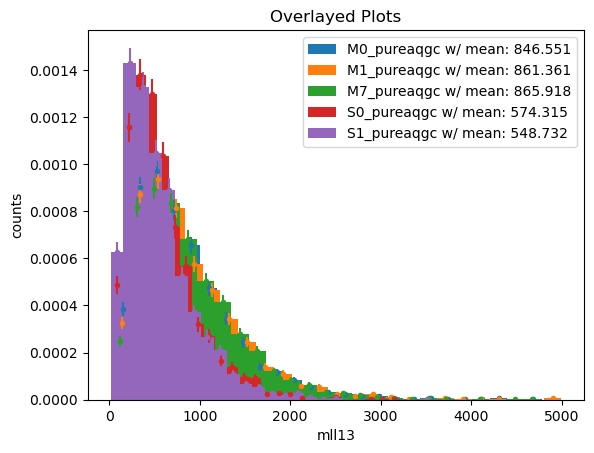

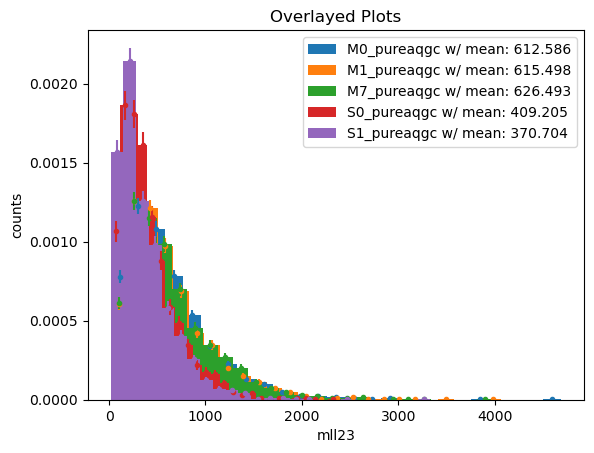

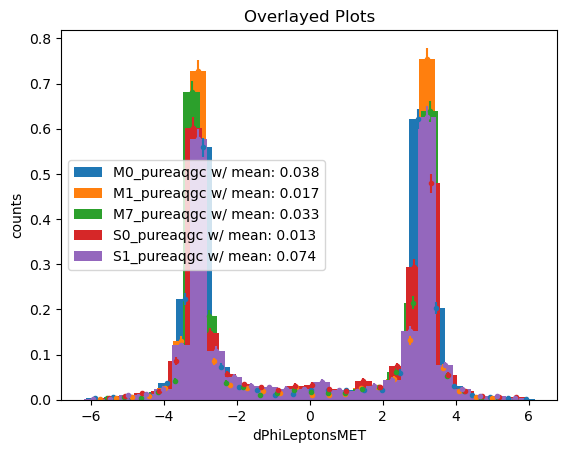

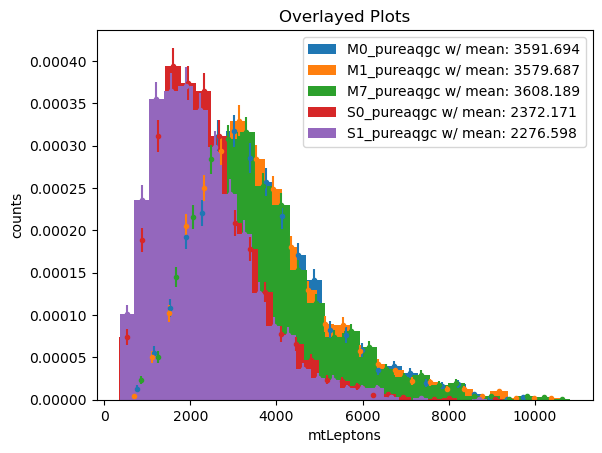

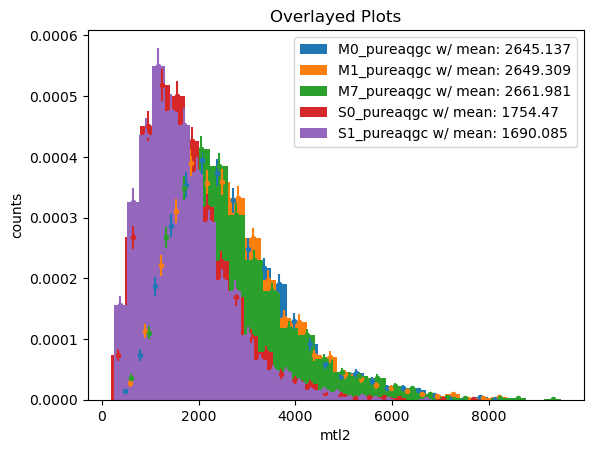

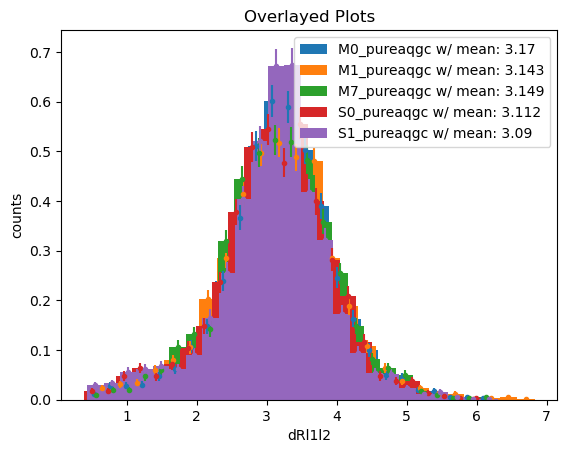

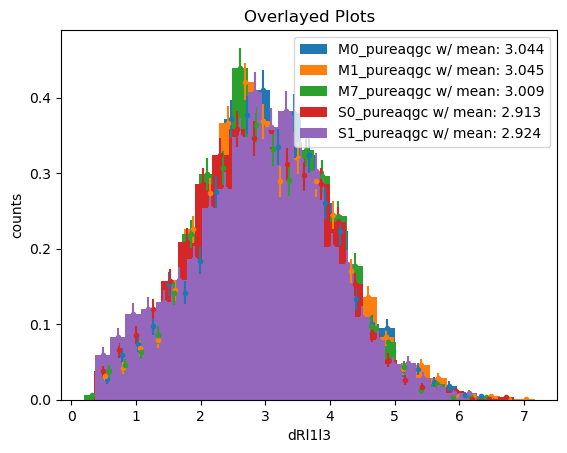

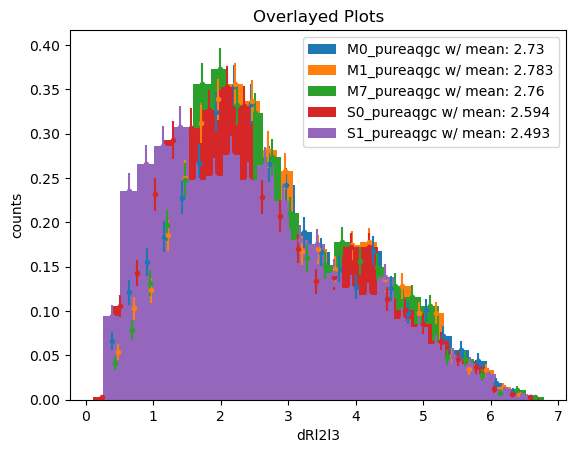

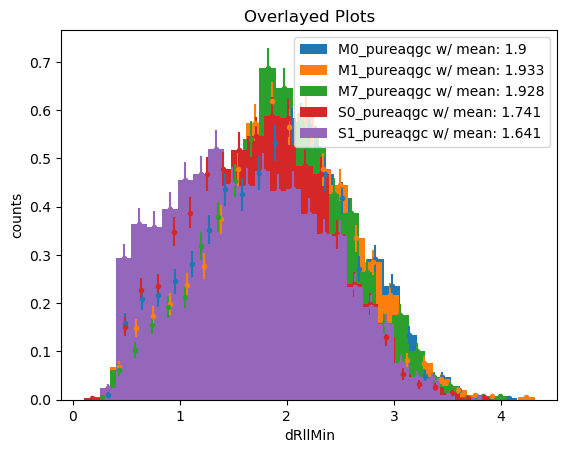

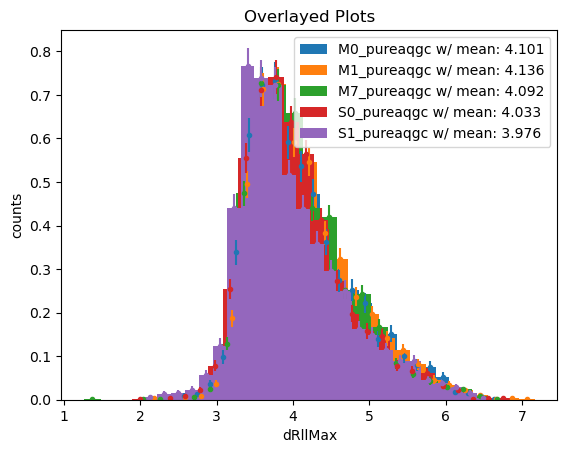

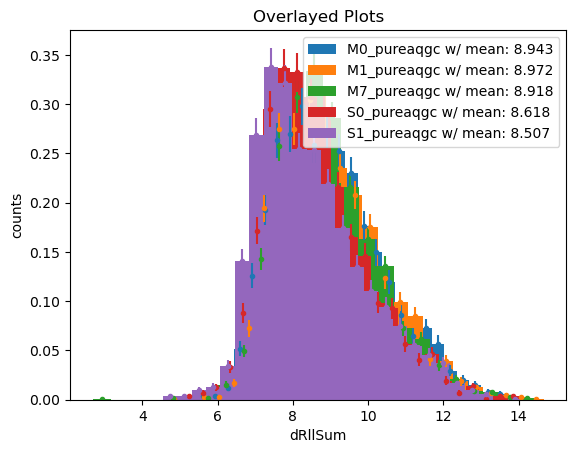

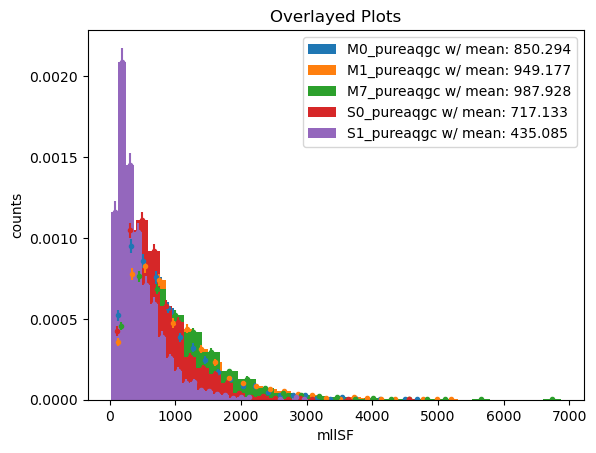

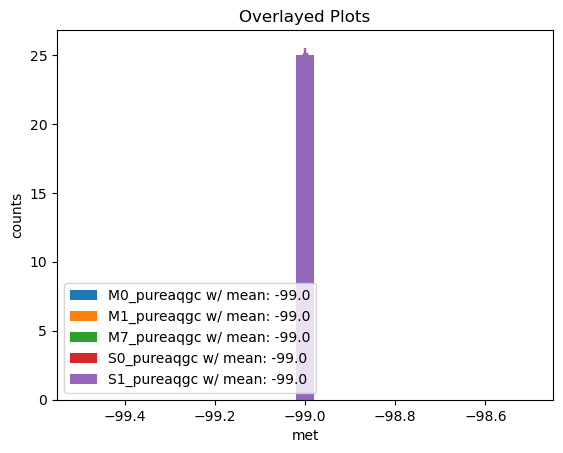

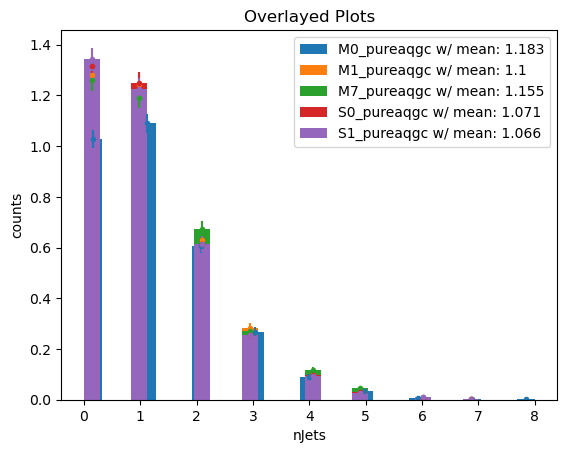

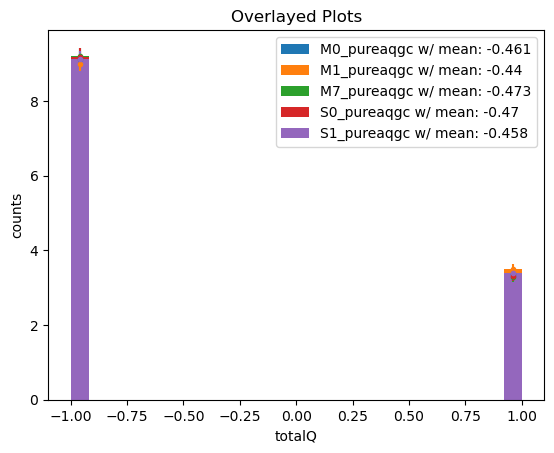

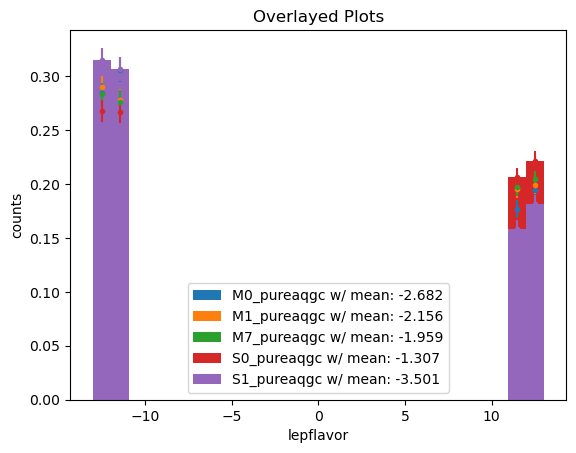

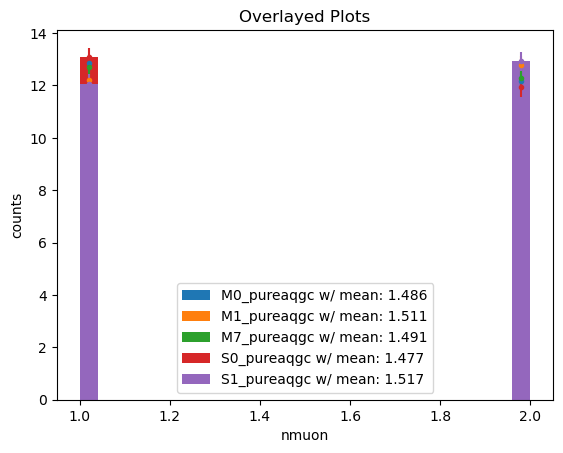

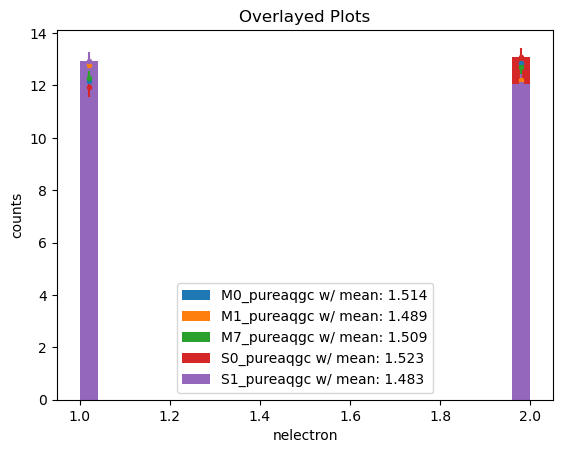

In [7]:
for col in cols:
    graph_files(files, col)